# "DeepFin" Machine Learning Tutorial Series

# Agenda
1. 機械学習のキーコンセプト概要
2. Microsoft Azure Platformのご紹介
3. ロバスト線型モデルを使った感度分析
4. トレンド、転換、季節性を使った時系列予測(SARIMAX)
5. LSTM RNNモデルを使った予測
6. Webスクレイピングのご紹介
7. データ準備、正規化、特徴量抽出に関する主なポイント
8. 結果の解釈と、統計的重要度
9. 可視化ツールによる結果の探索

## 1: Machine Learningとは？

<img src="https://github.com/amueller/scipy-2017-sklearn/blob/master/notebooks/figures/ml_taxonomy.png?raw=true" width="80%">

- Machine Learning（以下ML）は、統計学（もしくは数学）とコンピュータ・サイエンスの2つの分野を統合した概念
- もとより、MLは大まかに2つのカテゴリーに分類され、古典的なMLとDeep Learning(以下DL)のこと。古典的なMLは教師あり学習、教師なし学習に分けられ、統計学の自然な延長線上にあると考えられるが、金融業界における分析の多くは古典的なMLでは役不足であることが多かった。DLの方法論は、衛星写真の解析、自然言語処理や非構造データに対する分析において決定的な役割を果たしている。

MLはデータに内在する特徴を自動で抽出する一連の処理と考えられ、未知データに対し、予測を行うことが主な目的。
例）データを元にした金融商品のグルーピング（クラスタリング）によってどのような商品群が、リスクとリターンの組で「近い」かに関する理解を深める。

 - MLが目指す1点目は「データによる意思決定の自動化」であり、「明示的なルールで特定されたユーザによる決断から解放」することだ。

    - 例)サービスのプロファイリングに対し、ユーザはサービス特性のリストを与える代わりに、リスクの有無のラベルを付与

 - MLが目指す2点目は「汎化」が挙げられる。先にもある通り、MLのゴールは未知データに対する予測を行うことだ。現実問題として、既にラベル付け済データには興味がないはずで、汎化を通してサービスの分類を自動化することで業務の簡易化が期待できる。

<img src="data:image/svg+xml;base64,PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiIHN0YW5kYWxvbmU9Im5vIj8+Cjxz%0D%0AdmcKICAgeG1sbnM6b29vPSJodHRwOi8veG1sLm9wZW5vZmZpY2Uub3JnL3N2Zy9leHBvcnQiCiAg%0D%0AIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIKICAgeG1sbnM6Y2M9%0D%0AImh0dHA6Ly9jcmVhdGl2ZWNvbW1vbnMub3JnL25zIyIKICAgeG1sbnM6cmRmPSJodHRwOi8vd3d3%0D%0ALnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIgogICB4bWxuczpzdmc9Imh0dHA6Ly93%0D%0Ad3cudzMub3JnLzIwMDAvc3ZnIgogICB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmci%0D%0ACiAgIHN0eWxlPSJmaWxsLXJ1bGU6ZXZlbm9kZDtzdHJva2Utd2lkdGg6MjguMjIyMDAwMTI7c3Ry%0D%0Ab2tlLWxpbmVqb2luOnJvdW5kIgogICBpZD0ic3ZnMiIKICAgeG1sOnNwYWNlPSJwcmVzZXJ2ZSIK%0D%0AICAgY2xpcC1wYXRoPSJ1cmwoI3ByZXNlbnRhdGlvbl9jbGlwX3BhdGgpIgogICBwcmVzZXJ2ZUFz%0D%0AcGVjdFJhdGlvPSJ4TWlkWU1pZCIKICAgdmlld0JveD0iMCAwIDIzMTMxLjE4NiAxMzY3My45OTki%0D%0ACiAgIGhlaWdodD0iMTM2LjczOTk5bW0iCiAgIHdpZHRoPSIyMzEuMzExODZtbSIKICAgdmVyc2lv%0D%0Abj0iMS4yIj48bWV0YWRhdGEKICAgICBpZD0ibWV0YWRhdGEzNzIiPjxyZGY6UkRGPjxjYzpXb3Jr%0D%0ACiAgICAgICAgIHJkZjphYm91dD0iIj48ZGM6Zm9ybWF0PmltYWdlL3N2Zyt4bWw8L2RjOmZvcm1h%0D%0AdD48ZGM6dHlwZQogICAgICAgICAgIHJkZjpyZXNvdXJjZT0iaHR0cDovL3B1cmwub3JnL2RjL2Rj%0D%0AbWl0eXBlL1N0aWxsSW1hZ2UiIC8+PGRjOnRpdGxlPjwvZGM6dGl0bGU+PC9jYzpXb3JrPjwvcmRm%0D%0AOlJERj48L21ldGFkYXRhPjxkZWZzCiAgICAgaWQ9ImRlZnM0IgogICAgIGNsYXNzPSJDbGlwUGF0%0D%0AaEdyb3VwIj48Y2xpcFBhdGgKICAgICAgIGNsaXBQYXRoVW5pdHM9InVzZXJTcGFjZU9uVXNlIgog%0D%0AICAgICAgaWQ9InByZXNlbnRhdGlvbl9jbGlwX3BhdGgiPjxyZWN0CiAgICAgICAgIGlkPSJyZWN0%0D%0ANyIKICAgICAgICAgaGVpZ2h0PSIyMTAwMCIKICAgICAgICAgd2lkdGg9IjI4MDAwIgogICAgICAg%0D%0AICB5PSIwIgogICAgICAgICB4PSIwIiAvPjwvY2xpcFBhdGg+PC9kZWZzPjxkZWZzCiAgICAgaWQ9%0D%0AImRlZnM5Ij48Zm9udAogICAgICAgdmVydC1hZHYteT0iOTAiCiAgICAgICB2ZXJ0LW9yaWdpbi15%0D%0APSI5MCIKICAgICAgIHZlcnQtb3JpZ2luLXg9IjQ1IgogICAgICAgaG9yaXotb3JpZ2luLXk9IjAi%0D%0ACiAgICAgICBob3Jpei1vcmlnaW4teD0iMCIKICAgICAgIGhvcml6LWFkdi14PSIyMDQ4IgogICAg%0D%0AICAgaWQ9IkVtYmVkZGVkRm9udF8xIj48Zm9udC1mYWNlCiAgICAgICAgIGlkPSJmb250LWZhY2Ux%0D%0AMiIKICAgICAgICAgZGVzY2VudD0iNDUwIgogICAgICAgICBhc2NlbnQ9IjE4NTIiCiAgICAgICAg%0D%0AIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAg%0D%0AICAgdW5pdHMtcGVyLWVtPSIyMDQ4IgogICAgICAgICBmb250LWZhbWlseT0iTGliZXJhdGlvbiBT%0D%0AYW5zIGVtYmVkZGVkIiAvPjxtaXNzaW5nLWdseXBoCiAgICAgICAgIGlkPSJtaXNzaW5nLWdseXBo%0D%0AMTQiCiAgICAgICAgIGQ9Ik0gMCwwIEwgMjA0NywwIDIwNDcsMjA0NyAwLDIwNDcgMCwwIFoiCiAg%0D%0AICAgICAgIGhvcml6LWFkdi14PSIyMDQ4IiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGgxNiIK%0D%0AICAgICAgICAgZD0iTSA0OSwwIEwgNDksMTM3IDcxMCw5NDMgODksOTQzIDg5LDEwODIgOTEzLDEw%0D%0AODIgOTEzLDk0NSAyNTEsMTM5IDk1MCwxMzkgOTUwLDAgNDksMCBaIgogICAgICAgICBob3Jpei1h%0D%0AZHYteD0iOTI4IgogICAgICAgICB1bmljb2RlPSJ6IiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5%0D%0AcGgxOCIKICAgICAgICAgZD0iTSA4MDEsMCBMIDUxMCw0NDQgMjE3LDAgMjMsMCA0MDgsNTU2IDQx%0D%0ALDEwODIgMjQwLDEwODIgNTEwLDY2MSA3NzgsMTA4MiA5NzksMTA4MiA2MTIsNTU4IDEwMDIsMCA4%0D%0AMDEsMCBaIgogICAgICAgICBob3Jpei1hZHYteD0iMTAwNiIKICAgICAgICAgdW5pY29kZT0ieCIg%0D%0ALz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoMjAiCiAgICAgICAgIGQ9Ik0gNjEzLDAgTCA0MDAs%0D%0AMCA3LDEwODIgMTk5LDEwODIgNDM3LDM3OCBDIDQ0MiwzNjMgNDQ3LDM0NiA0NTQsMzI1IDQ2MCwz%0D%0AMDQgNDY2LDI4MiA0NzMsMjU5IDQ4MCwyMzYgNDg2LDIxNSA0OTIsMTk0IDQ5NywxNzMgNTAyLDE1%0D%0ANSA1MDYsMTQxIDUxMCwxNTUgNTE1LDE3MyA1MjIsMTk0IDUyOCwyMTUgNTM0LDIzNiA1NDEsMjU4%0D%0AIDU0OCwyODAgNTU1LDMwMiA1NjIsMzIzIDU2OSwzNDQgNTc1LDM2MSA1ODAsMzc2IEwgODI2LDEw%0D%0AODIgMTAxNywxMDgyIDYxMywwIFoiCiAgICAgICAgIGhvcml6LWFkdi14PSIxMDMzIgogICAgICAg%0D%0AICB1bmljb2RlPSJ2IiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGgyMiIKICAgICAgICAgZD0i%0D%0ATSAzMTQsMTA4MiBMIDMxNCwzOTYgQyAzMTQsMzQzIDMxOCwyOTkgMzI2LDI2NCAzMzMsMjI5IDM0%0D%0ANiwyMDAgMzYzLDE3OSAzODAsMTU3IDQwMywxNDIgNDMyLDEzMyA0NjAsMTI0IDQ5NSwxMTkgNTM3%0D%0ALDExOSA1ODAsMTE5IDYxOCwxMjcgNjUzLDE0MiA2ODcsMTU3IDcxNiwxNzggNzQxLDIwNyA3NjUs%0D%0AMjM1IDc4NCwyNzAgNzk3LDMxMiA4MTAsMzUzIDgxNyw0MDEgODE3LDQ1NSBMIDgxNywxMDgyIDk5%0D%0ANywxMDgyIDk5NywyMzEgQyA5OTcsMjA4IDk5NywxODUgOTk4LDE2MCA5OTgsMTM1IDk5OCwxMTEg%0D%0AOTk5LDg5IDEwMDAsNjYgMTAwMCw0NyAxMDAxLDMxIDEwMDIsMTUgMTAwMiw1IDEwMDMsMCBMIDgz%0D%0AMywwIEMgODMyLDMgODMyLDEyIDgzMSwyNyA4MzAsNDIgODMwLDU5IDgyOSw3OCA4MjgsOTcgODI3%0D%0ALDExNiA4MjYsMTM2IDgyNSwxNTUgODI1LDE3MiA4MjUsMTg1IEwgODIyLDE4NSBDIDgwNSwxNTQg%0D%0ANzg2LDEyNSA3NjUsMTAwIDc0NCw3NSA3MjAsNTMgNjkzLDM2IDY2NiwxOCA2MzQsNCA1OTksLTYg%0D%0ANTY0LC0xNSA1MjMsLTIwIDQ3NiwtMjAgNDE2LC0yMCAzNjQsLTEzIDMyMSwyIDI3OCwxNyAyNDIs%0D%0AMzkgMjE0LDcwIDE4NiwxMDEgMTY2LDE0MCAxNTMsMTg4IDE0MCwyMzYgMTMzLDI5NCAxMzMsMzYx%0D%0AIEwgMTMzLDEwODIgMzE0LDEwODIgWiIKICAgICAgICAgaG9yaXotYWR2LXg9Ijg3NCIKICAgICAg%0D%0AICAgdW5pY29kZT0idSIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoMjQiCiAgICAgICAgIGQ9%0D%0AIk0gNTU0LDggQyA1MjcsMSA0OTksLTUgNDcxLC0xMCA0NDIsLTE0IDQwOSwtMTYgMzcyLC0xNiAy%0D%0AMjgsLTE2IDE1Niw2NiAxNTYsMjI5IEwgMTU2LDk1MSAzMSw5NTEgMzEsMTA4MiAxNjMsMTA4MiAy%0D%0AMTYsMTMyNCAzMzYsMTMyNCAzMzYsMTA4MiA1MzYsMTA4MiA1MzYsOTUxIDMzNiw5NTEgMzM2LDI2%0D%0AOCBDIDMzNiwyMTYgMzQ1LDE4MCAzNjIsMTU5IDM3OSwxMzggNDA4LDEyNyA0NTAsMTI3IDQ2Nywx%0D%0AMjcgNDg0LDEyOCA1MDEsMTMxIDUxNywxMzQgNTM1LDEzNyA1NTQsMTQxIEwgNTU0LDggWiIKICAg%0D%0AICAgICAgaG9yaXotYWR2LXg9IjUzMSIKICAgICAgICAgdW5pY29kZT0idCIgLz48Z2x5cGgKICAg%0D%0AICAgICAgaWQ9ImdseXBoMjYiCiAgICAgICAgIGQ9Ik0gOTUwLDI5OSBDIDk1MCwyNDggOTQwLDIw%0D%0AMyA5MjEsMTY0IDkwMSwxMjQgODcyLDkxIDgzNSw2NCA3OTgsMzcgNzUyLDE2IDY5OCwyIDY0Mywt%0D%0AMTMgNTgxLC0yMCA1MTEsLTIwIDQ0OCwtMjAgMzkyLC0xNSAzNDIsLTYgMjkxLDQgMjQ3LDIwIDIw%0D%0AOSw0MSAxNzEsNjIgMTM5LDkxIDExNCwxMjYgODgsMTYxIDY5LDIwMyA1NywyNTQgTCAyMTYsMjg1%0D%0AIEMgMjMxLDIyNyAyNjMsMTg1IDMxMSwxNTggMzU5LDEzMSA0MjYsMTE3IDUxMSwxMTcgNTUwLDEx%0D%0ANyA1ODUsMTIwIDYxOCwxMjUgNjUwLDEzMCA2NzgsMTQwIDcwMSwxNTMgNzI0LDE2NiA3NDMsMTgz%0D%0AIDc1NiwyMDUgNzY5LDIyNiA3NzUsMjUzIDc3NSwyODUgNzc1LDMxOCA3NjcsMzQ1IDc1MiwzNjYg%0D%0ANzM3LDM4NyA3MTUsNDA0IDY4OCw0MTggNjYxLDQzMiA2MjgsNDQ0IDU4OSw0NTUgNTUwLDQ2NSA1%0D%0AMDcsNDc2IDQ2MCw0ODkgNDE3LDUwMCAzNzQsNTEzIDMzMSw1MjcgMjg4LDU0MSAyNTAsNTYwIDIx%0D%0ANiw1ODMgMTgxLDYwNiAxNTMsNjM0IDEzMiw2NjggMTExLDcwMiAxMDAsNzQ1IDEwMCw3OTYgMTAw%0D%0ALDg5NSAxMzUsOTcwIDIwNiwxMDIyIDI3NiwxMDczIDM3OCwxMDk5IDUxMywxMDk5IDYzMiwxMDk5%0D%0AIDcyNywxMDc4IDc5OCwxMDM2IDg2OCw5OTQgOTEyLDkyNyA5MzEsODM0IEwgNzY5LDgxNCBDIDc2%0D%0AMyw4NDIgNzUyLDg2NiA3MzYsODg1IDcyMCw5MDQgNzAxLDkxOSA2NzgsOTMxIDY1NSw5NDIgNjMw%0D%0ALDk1MSA2MDIsOTU2IDU3Myw5NjEgNTQ0LDk2MyA1MTMsOTYzIDQzMiw5NjMgMzcyLDk1MSAzMzMs%0D%0AOTI2IDI5NCw5MDEgMjc1LDg2NCAyNzUsODE0IDI3NSw3ODUgMjgyLDc2MSAyOTcsNzQyIDMxMSw3%0D%0AMjMgMzMxLDcwNyAzNTcsNjk0IDM4Miw2ODEgNDEzLDY2OSA0NDksNjYwIDQ4NSw2NTAgNTI1LDY0%0D%0AMCA1NjgsNjI5IDU5Nyw2MjIgNjI2LDYxNCA2NTYsNjA2IDY4Niw1OTcgNzE1LDU4NyA3NDQsNTc2%0D%0AIDc3Miw1NjQgNzk5LDU1MCA4MjQsNTM1IDg0OSw1MTkgODcwLDUwMCA4ODksNDc4IDkwOCw0NTYg%0D%0AOTIzLDQzMCA5MzQsNDAxIDk0NSwzNzIgOTUwLDMzOCA5NTAsMjk5IFoiCiAgICAgICAgIGhvcml6%0D%0ALWFkdi14PSI5MDEiCiAgICAgICAgIHVuaWNvZGU9InMiIC8+PGdseXBoCiAgICAgICAgIGlkPSJn%0D%0AbHlwaDI4IgogICAgICAgICBkPSJNIDE0MiwwIEwgMTQyLDgzMCBDIDE0Miw4NTMgMTQyLDg3NiAx%0D%0ANDIsOTAwIDE0MSw5MjMgMTQxLDk0NiAxNDAsOTY4IDEzOSw5OTAgMTM5LDEwMTEgMTM4LDEwMzAg%0D%0AMTM3LDEwNDkgMTM3LDEwNjcgMTM2LDEwODIgTCAzMDYsMTA4MiBDIDMwNywxMDY3IDMwOCwxMDQ5%0D%0AIDMwOSwxMDMwIDMxMCwxMDEwIDMxMSw5OTAgMzEyLDk2OSAzMTMsOTQ4IDMxMyw5MjkgMzE0LDkx%0D%0AMCAzMTQsODkxIDMxNCw4NzQgMzE0LDg2MSBMIDMxOCw4NjEgQyAzMzEsOTAyIDM0NCw5MzggMzU5%0D%0ALDk2OSAzNzMsOTk5IDM5MCwxMDI0IDQwOSwxMDQ0IDQyOCwxMDYzIDQ1MSwxMDc4IDQ3OCwxMDg4%0D%0AIDUwNSwxMDk3IDUzNywxMTAyIDU3NSwxMTAyIDU5MCwxMTAyIDYwNCwxMTAxIDYxNywxMDk5IDYz%0D%0AMCwxMDk2IDY0MSwxMDk0IDY0OCwxMDkyIEwgNjQ4LDkyNyBDIDYzNiw5MzAgNjIyLDkzMyA2MDYs%0D%0AOTM1IDU5MCw5MzYgNTcyLDkzNyA1NTIsOTM3IDUxMSw5MzcgNDc2LDkyOCA0NDcsOTA5IDQxOCw4%0D%0AOTAgMzk0LDg2NSAzNzYsODMyIDM1Nyw3OTkgMzQ0LDc1OSAzMzUsNzE0IDMyNiw2NjggMzIyLDYx%0D%0AOCAzMjIsNTY0IEwgMzIyLDAgMTQyLDAgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjUzMCIKICAg%0D%0AICAgICAgdW5pY29kZT0iciIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoMzAiCiAgICAgICAg%0D%0AIGQ9Ik0gMTA1Myw1NDYgQyAxMDUzLDQ2NCAxMDQ2LDM4OCAxMDMzLDMxOSAxMDIwLDI1MCA5OTgs%0D%0AMTkwIDk2NywxNDAgOTM2LDkwIDg5NSw1MSA4NDQsMjMgNzkzLC02IDczMCwtMjAgNjU1LC0yMCA1%0D%0ANzgsLTIwIDUxMCwtNSA0NTIsMjQgMzk0LDUzIDM1MCwxMDEgMzE5LDE2OCBMIDMxNCwxNjggQyAz%0D%0AMTUsMTY3IDMxNSwxNjEgMzE2LDE1MCAzMTYsMTM5IDMxNiwxMjYgMzE3LDExMCAzMTcsOTQgMzE3%0D%0ALDc2IDMxOCw1NyAzMTgsMzcgMzE4LDE3IDMxOCwtMiBMIDMxOCwtNDI1IDEzOCwtNDI1IDEzOCw4%0D%0ANjEgQyAxMzgsODg3IDEzOCw5MTIgMTM4LDkzNiAxMzcsOTYwIDEzNyw5ODIgMTM2LDEwMDIgMTM1%0D%0ALDEwMjEgMTM1LDEwMzggMTM0LDEwNTIgMTMzLDEwNjYgMTMzLDEwNzYgMTMyLDEwODIgTCAzMDYs%0D%0AMTA4MiBDIDMwNywxMDgwIDMwOCwxMDczIDMwOSwxMDYxIDMxMCwxMDQ5IDMxMSwxMDM1IDMxMiwx%0D%0AMDE4IDMxMywxMDAxIDMxNCw5ODIgMzE1LDk2MyAzMTYsOTQ0IDMxNiw5MjUgMzE2LDkwOCBMIDMy%0D%0AMCw5MDggQyAzMzcsOTQzIDM1Niw5NzIgMzc3LDk5NyAzOTgsMTAyMSA0MjMsMTA0MSA0NTAsMTA1%0D%0ANyA0NzcsMTA3MiA1MDgsMTA4NCA1NDIsMTA5MSA1NzUsMTA5OCA2MTMsMTEwMSA2NTUsMTEwMSA3%0D%0AMzAsMTEwMSA3OTMsMTA4OCA4NDQsMTA2MSA4OTUsMTAzNCA5MzYsOTk3IDk2Nyw5NDkgOTk4LDkw%0D%0AMCAxMDIwLDg0MiAxMDMzLDc3NCAxMDQ2LDcwNSAxMDUzLDYyOSAxMDUzLDU0NiBaIE0gODY0LDU0%0D%0AMiBDIDg2NCw2MDkgODYwLDY2OCA4NTIsNzIwIDg0NCw3NzIgODMwLDgxNiA4MTEsODUyIDc5MSw4%0D%0AODggNzY1LDkxNSA3MzIsOTM0IDY5OSw5NTMgNjU4LDk2MiA2MDksOTYyIDU2OSw5NjIgNTMxLDk1%0D%0ANiA0OTYsOTQ1IDQ2MSw5MzQgNDMwLDkxMiA0MDQsODgwIDM3Nyw4NDggMzU2LDgwNCAzNDEsNzQ4%0D%0AIDMyNiw2OTEgMzE4LDYxOCAzMTgsNTI4IDMxOCw0NTEgMzI0LDM4NyAzMzcsMzM0IDM1MCwyODEg%0D%0AMzY4LDIzOCAzOTMsMjA1IDQxNywxNzIgNDQ3LDE0OSA0ODMsMTM1IDUxOSwxMjAgNTYwLDExMyA2%0D%0AMDcsMTEzIDY1NywxMTMgNjk5LDEyMyA3MzIsMTQyIDc2NSwxNjEgNzkxLDE4OSA4MTEsMjI2IDgz%0D%0AMCwyNjMgODQ0LDMwOCA4NTIsMzYxIDg2MCw0MTQgODY0LDQ3NCA4NjQsNTQyIFoiCiAgICAgICAg%0D%0AIGhvcml6LWFkdi14PSI5NTMiCiAgICAgICAgIHVuaWNvZGU9InAiIC8+PGdseXBoCiAgICAgICAg%0D%0AIGlkPSJnbHlwaDMyIgogICAgICAgICBkPSJNIDEwNTMsNTQyIEMgMTA1MywzNTMgMTAxMSwyMTIg%0D%0AOTI4LDExOSA4NDUsMjYgNzI0LC0yMCA1NjUsLTIwIDQ5MCwtMjAgNDIyLC05IDM2MywxNCAzMDQs%0D%0AMzcgMjU0LDcxIDIxMywxMTggMTcyLDE2NSAxNDAsMjIzIDExOSwyOTQgOTcsMzY0IDg2LDQ0NyA4%0D%0ANiw1NDIgODYsOTE1IDI0OCwxMTAyIDU3MSwxMTAyIDY1NSwxMTAyIDcyOCwxMDkwIDc4OSwxMDY3%0D%0AIDg1MCwxMDQ0IDkwMCwxMDA5IDkzOSw5NjIgOTc4LDkxNSAxMDA2LDg1NyAxMDI1LDc4NyAxMDQ0%0D%0ALDcxNyAxMDUzLDYzNSAxMDUzLDU0MiBaIE0gODY0LDU0MiBDIDg2NCw2MjYgODU4LDY5NSA4NDUs%0D%0ANzUwIDgzMiw4MDUgODEzLDg0OCA3ODgsODgxIDc2Myw5MTQgNzMyLDkzNyA2OTYsOTUwIDY2MCw5%0D%0ANjMgNjE5LDk2OSA1NzQsOTY5IDUyOCw5NjkgNDg3LDk2MiA0NTAsOTQ5IDQxMyw5MzUgMzgxLDkx%0D%0AMiAzNTUsODc5IDMyOSw4NDYgMzA5LDgwMiAyOTYsNzQ3IDI4Miw2OTIgMjc1LDYyNCAyNzUsNTQy%0D%0AIDI3NSw0NTggMjgyLDM4OSAyOTcsMzM0IDMxMiwyNzkgMzMyLDIzNSAzNTgsMjAyIDM4MywxNjkg%0D%0ANDE0LDE0NiA0NDksMTMzIDQ4NCwxMjAgNTIyLDExMyA1NjMsMTEzIDYwOSwxMTMgNjUxLDEyMCA2%0D%0AODgsMTMzIDcyNSwxNDYgNzU3LDE2OCA3ODMsMjAxIDgwOSwyMzQgODI5LDI3OCA4NDMsMzMzIDg1%0D%0ANywzODggODY0LDQ1OCA4NjQsNTQyIFoiCiAgICAgICAgIGhvcml6LWFkdi14PSI5ODAiCiAgICAg%0D%0AICAgIHVuaWNvZGU9Im8iIC8+PGdseXBoCiAgICAgICAgIGlkPSJnbHlwaDM0IgogICAgICAgICBk%0D%0APSJNIDgyNSwwIEwgODI1LDY4NiBDIDgyNSw3MzkgODIxLDc4MyA4MTQsODE4IDgwNiw4NTMgNzkz%0D%0ALDg4MiA3NzYsOTA0IDc1OSw5MjUgNzM2LDk0MSA3MDgsOTUwIDY3OSw5NTkgNjQ0LDk2MyA2MDIs%0D%0AOTYzIDU1OSw5NjMgNTIxLDk1NiA0ODcsOTQxIDQ1Miw5MjYgNDIzLDkwNCAzOTksODc2IDM3NCw4%0D%0ANDcgMzU1LDgxMiAzNDIsNzcxIDMyOSw3MjkgMzIyLDY4MSAzMjIsNjI3IEwgMzIyLDAgMTQyLDAg%0D%0AMTQyLDg1MSBDIDE0Miw4NzQgMTQyLDg5OCAxNDIsOTIzIDE0MSw5NDggMTQxLDk3MSAxNDAsOTk0%0D%0AIDEzOSwxMDE2IDEzOSwxMDM1IDEzOCwxMDUxIDEzNywxMDY3IDEzNywxMDc3IDEzNiwxMDgyIEwg%0D%0AMzA2LDEwODIgQyAzMDcsMTA3OSAzMDcsMTA3MCAzMDgsMTA1NSAzMDksMTA0MCAzMTAsMTAyNCAz%0D%0AMTEsMTAwNSAzMTIsOTg2IDMxMiw5NjYgMzEzLDk0NyAzMTQsOTI3IDMxNCw5MTAgMzE0LDg5NyBM%0D%0AIDMxNyw4OTcgQyAzMzQsOTI4IDM1Myw5NTcgMzc0LDk4MiAzOTUsMTAwNyA0MTksMTAyOSA0NDYs%0D%0AMTA0NyA0NzMsMTA2NCA1MDUsMTA3OCA1NDAsMTA4OCA1NzUsMTA5NyA2MTYsMTEwMiA2NjMsMTEw%0D%0AMiA3MjMsMTEwMiA3NzUsMTA5NSA4MTgsMTA4MCA4NjEsMTA2NSA4OTcsMTA0MyA5MjUsMTAxMiA5%0D%0ANTMsOTgxIDk3NCw5NDIgOTg3LDg5NCAxMDAwLDg0NSAxMDA2LDc4OCAxMDA2LDcyMSBMIDEwMDYs%0D%0AMCA4MjUsMCBaIgogICAgICAgICBob3Jpei1hZHYteD0iODc0IgogICAgICAgICB1bmljb2RlPSJu%0D%0AIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGgzNiIKICAgICAgICAgZD0iTSA3NjgsMCBMIDc2%0D%0AOCw2ODYgQyA3NjgsNzM5IDc2NSw3ODMgNzU4LDgxOCA3NTEsODUzIDc0MCw4ODIgNzI1LDkwNCA3%0D%0AMDksOTI1IDY4OCw5NDEgNjYzLDk1MCA2MzgsOTU5IDYwNyw5NjMgNTcwLDk2MyA1MzIsOTYzIDQ5%0D%0AOCw5NTYgNDY3LDk0MSA0MzYsOTI2IDQxMCw5MDQgMzg5LDg3NiAzNjcsODQ3IDM1MCw4MTIgMzM5%0D%0ALDc3MSAzMjcsNzI5IDMyMSw2ODEgMzIxLDYyNyBMIDMyMSwwIDE0MiwwIDE0Miw4NTEgQyAxNDIs%0D%0AODc0IDE0Miw4OTggMTQyLDkyMyAxNDEsOTQ4IDE0MSw5NzEgMTQwLDk5NCAxMzksMTAxNiAxMzks%0D%0AMTAzNSAxMzgsMTA1MSAxMzcsMTA2NyAxMzcsMTA3NyAxMzYsMTA4MiBMIDMwNiwxMDgyIEMgMzA3%0D%0ALDEwNzkgMzA3LDEwNzAgMzA4LDEwNTUgMzA5LDEwNDAgMzEwLDEwMjQgMzExLDEwMDUgMzEyLDk4%0D%0ANiAzMTIsOTY2IDMxMyw5NDcgMzE0LDkyNyAzMTQsOTEwIDMxNCw4OTcgTCAzMTcsODk3IEMgMzMz%0D%0ALDkyOCAzNTAsOTU3IDM2OSw5ODIgMzg4LDEwMDcgNDEwLDEwMjkgNDM1LDEwNDcgNDYwLDEwNjQg%0D%0ANDg4LDEwNzggNTIxLDEwODggNTUzLDEwOTcgNTkwLDExMDIgNjMzLDExMDIgNzE1LDExMDIgNzgw%0D%0ALDEwODYgODI4LDEwNTMgODc1LDEwMjAgOTA4LDk2OCA5MjcsODk3IEwgOTMwLDg5NyBDIDk0Niw5%0D%0AMjggOTY0LDk1NyA5ODQsOTgyIDEwMDQsMTAwNyAxMDI3LDEwMjkgMTA1NCwxMDQ3IDEwODEsMTA2%0D%0ANCAxMTExLDEwNzggMTE0NCwxMDg4IDExNzcsMTA5NyAxMjE1LDExMDIgMTI1OCwxMTAyIDEzMTMs%0D%0AMTEwMiAxMzYwLDEwOTUgMTQwMCwxMDgwIDE0MzksMTA2NSAxNDcyLDEwNDMgMTQ5NywxMDEyIDE1%0D%0AMjIsOTgxIDE1NDEsOTQyIDE1NTMsODk0IDE1NjUsODQ1IDE1NzEsNzg4IDE1NzEsNzIxIEwgMTU3%0D%0AMSwwIDEzOTMsMCAxMzkzLDY4NiBDIDEzOTMsNzM5IDEzOTAsNzgzIDEzODMsODE4IDEzNzYsODUz%0D%0AIDEzNjUsODgyIDEzNTAsOTA0IDEzMzQsOTI1IDEzMTMsOTQxIDEyODgsOTUwIDEyNjMsOTU5IDEy%0D%0AMzIsOTYzIDExOTUsOTYzIDExNTcsOTYzIDExMjMsOTU2IDEwOTIsOTQyIDEwNjEsOTI3IDEwMzUs%0D%0AOTA2IDEwMTQsODc4IDk5Miw4NTAgOTc1LDgxNSA5NjQsNzczIDk1Miw3MzEgOTQ2LDY4MiA5NDYs%0D%0ANjI3IEwgOTQ2LDAgNzY4LDAgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjE0NTciCiAgICAgICAg%0D%0AIHVuaWNvZGU9Im0iIC8+PGdseXBoCiAgICAgICAgIGlkPSJnbHlwaDM4IgogICAgICAgICBkPSJN%0D%0AIDEzOCwwIEwgMTM4LDE0ODQgMzE4LDE0ODQgMzE4LDAgMTM4LDAgWiIKICAgICAgICAgaG9yaXot%0D%0AYWR2LXg9IjE4NyIKICAgICAgICAgdW5pY29kZT0ibCIgLz48Z2x5cGgKICAgICAgICAgaWQ9Imds%0D%0AeXBoNDAiCiAgICAgICAgIGQ9Ik0gODE2LDAgTCA0NTAsNDk0IDMxOCwzODUgMzE4LDAgMTM4LDAg%0D%0AMTM4LDE0ODQgMzE4LDE0ODQgMzE4LDU1NyA3OTMsMTA4MiAxMDA0LDEwODIgNTY1LDYxNyAxMDI3%0D%0ALDAgODE2LDAgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjkwMSIKICAgICAgICAgdW5pY29kZT0i%0D%0AayIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoNDIiCiAgICAgICAgIGQ9Ik0gMTM3LDEzMTIg%0D%0ATCAxMzcsMTQ4NCAzMTcsMTQ4NCAzMTcsMTMxMiAxMzcsMTMxMiBaIE0gMTM3LDAgTCAxMzcsMTA4%0D%0AMiAzMTcsMTA4MiAzMTcsMCAxMzcsMCBaIgogICAgICAgICBob3Jpei1hZHYteD0iMTg3IgogICAg%0D%0AICAgICB1bmljb2RlPSJpIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGg0NCIKICAgICAgICAg%0D%0AZD0iTSAzMTcsODk3IEMgMzM3LDkzNCAzNTksOTY1IDM4Miw5OTEgNDA1LDEwMTYgNDMxLDEwMzcg%0D%0ANDU5LDEwNTQgNDg3LDEwNzEgNTE4LDEwODMgNTUxLDEwOTEgNTg0LDEwOTggNjIyLDExMDIgNjYz%0D%0ALDExMDIgNzMyLDExMDIgNzg5LDEwOTMgODM0LDEwNzQgODc4LDEwNTUgOTEzLDEwMjkgOTM5LDk5%0D%0ANiA5NjQsOTYyIDk4Miw5MjIgOTkyLDg3NSAxMDAxLDgyOCAxMDA2LDc3NyAxMDA2LDcyMSBMIDEw%0D%0AMDYsMCA4MjUsMCA4MjUsNjg2IEMgODI1LDczMiA4MjIsNzcyIDgxNyw4MDcgODExLDg0MiA4MDAs%0D%0AODcxIDc4NCw4OTQgNzY4LDkxNyA3NDUsOTM0IDcxNiw5NDYgNjg3LDk1NyA2NDksOTYzIDYwMiw5%0D%0ANjMgNTU5LDk2MyA1MjEsOTU1IDQ4Nyw5NDAgNDUyLDkyNSA0MjMsOTAzIDM5OSw4NzUgMzc0LDg0%0D%0ANyAzNTUsODEzIDM0Miw3NzMgMzI5LDczMyAzMjIsNjg4IDMyMiw2MzggTCAzMjIsMCAxNDIsMCAx%0D%0ANDIsMTQ4NCAzMjIsMTQ4NCAzMjIsMTA5OCBDIDMyMiwxMDc2IDMyMiwxMDU0IDMyMSwxMDMyIDMy%0D%0AMCwxMDEwIDMyMCw5OTAgMzE5LDk3MSAzMTgsOTUyIDMxNyw5MzcgMzE2LDkyNCAzMTUsOTExIDMx%0D%0ANSw5MDIgMzE0LDg5NyBMIDMxNyw4OTcgWiIKICAgICAgICAgaG9yaXotYWR2LXg9Ijg3NCIKICAg%0D%0AICAgICAgdW5pY29kZT0iaCIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoNDYiCiAgICAgICAg%0D%0AIGQ9Ik0gNTQ4LC00MjUgQyA0ODYsLTQyNSA0MzEsLTQxOSAzODMsLTQwNiAzMzUsLTM5MyAyOTQs%0D%0ALTM3NSAyNjAsLTM1MiAyMjYsLTMyOCAxOTgsLTMwMCAxNzcsLTI2NyAxNTYsLTIzNCAxNDAsLTE5%0D%0AOCAxMzEsLTE1OCBMIDMxMiwtMTMyIEMgMzI0LC0xODIgMzUxLC0yMjAgMzkyLC0yNDggNDMzLC0y%0D%0ANzQgNDg2LC0yODggNTUzLC0yODggNTk0LC0yODggNjMxLC0yODIgNjY0LC0yNzEgNjk3LC0yNjAg%0D%0ANzI2LC0yNDEgNzQ5LC0yMTcgNzcyLC0xOTEgNzkwLC0xNTkgODAzLC0xMTkgODE2LC03OSA4MjIs%0D%0ALTMwIDgyMiwyNyBMIDgyMiwyMDEgODIwLDIwMSBDIDgwNywxNzQgNzkwLDE0OCA3NzEsMTIzIDc1%0D%0AMSw5OCA3MjcsNzUgNjk5LDU2IDY3MCwzNyA2MzcsMjEgNjAwLDEwIDU2MywtMiA1MjAsLTggNDcy%0D%0ALC04IDQwMywtOCAzNDUsNCAyOTYsMjcgMjQ3LDUwIDIwNyw4NCAxNzYsMTMwIDE0NSwxNzYgMTIy%0D%0ALDIzMyAxMDgsMzAyIDkzLDM3MCA4Niw0NDkgODYsNTM5IDg2LDYyNiA5Myw3MDQgMTA4LDc3MyAx%0D%0AMjIsODQyIDE0NSw5MDEgMTc4LDk1MCAyMTAsOTk4IDI1MiwxMDM1IDMwNCwxMDYxIDM1NSwxMDg2%0D%0AIDQxOCwxMDk5IDQ5MiwxMDk5IDU2OSwxMDk5IDYzNSwxMDgyIDY5MiwxMDQ3IDc0OCwxMDEyIDc5%0D%0AMSw5NjIgODIyLDg5NyBMIDgyNCw4OTcgQyA4MjQsOTE0IDgyNSw5MzIgODI2LDk1MyA4MjcsOTc0%0D%0AIDgyOCw5OTMgODI5LDEwMTIgODMwLDEwMzAgODMxLDEwNDYgODMyLDEwNTkgODMzLDEwNzIgODM1%0D%0ALDEwODAgODM2LDEwODIgTCAxMDA3LDEwODIgQyAxMDA2LDEwNzYgMTAwNiwxMDY2IDEwMDUsMTA1%0D%0AMiAxMDA0LDEwMzcgMTAwNCwxMDIwIDEwMDMsMTAwMCAxMDAyLDk4MCAxMDAyLDk1OCAxMDAyLDkz%0D%0ANCAxMDAxLDkwOSAxMDAxLDg4NCAxMDAxLDg1OCBMIDEwMDEsMzEgQyAxMDAxLC0xMjAgOTY0LC0y%0D%0AMzQgODkwLC0zMTEgODE1LC0zODcgNzAxLC00MjUgNTQ4LC00MjUgWiBNIDgyMiw1NDEgQyA4MjIs%0D%0ANjE2IDgxNCw2ODEgNzk4LDczNSA3ODEsNzg4IDc2MCw4MzIgNzMzLDg2NiA3MDYsOTAwIDY3Niw5%0D%0AMjUgNjQyLDk0MSA2MDcsOTU3IDU3Miw5NjUgNTM2LDk2NSA0OTAsOTY1IDQ1MSw5NTcgNDE4LDk0%0D%0AMSAzODUsOTI1IDM1Nyw5MDAgMzM2LDg2NiAzMTQsODMxIDI5OCw3ODcgMjg4LDczNCAyNzcsNjgw%0D%0AIDI3Miw2MTYgMjcyLDU0MSAyNzIsNDYzIDI3NywzOTggMjg4LDM0NSAyOTgsMjkyIDMxNCwyNDkg%0D%0AMzM1LDIxNiAzNTYsMTgzIDM4MywxNjAgNDE2LDE0NiA0NDksMTMyIDQ4OCwxMjUgNTMzLDEyNSA1%0D%0ANjksMTI1IDYwNCwxMzMgNjM5LDE0OCA2NzMsMTYzIDcwNCwxODggNzMxLDIyMSA3NTgsMjU0IDc4%0D%0AMCwyOTcgNzk3LDM1MCA4MTQsNDAzIDgyMiw0NjYgODIyLDU0MSBaIgogICAgICAgICBob3Jpei1h%0D%0AZHYteD0iOTI3IgogICAgICAgICB1bmljb2RlPSJnIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5%0D%0AcGg0OCIKICAgICAgICAgZD0iTSAzNjEsOTUxIEwgMzYxLDAgMTgxLDAgMTgxLDk1MSAyOSw5NTEg%0D%0AMjksMTA4MiAxODEsMTA4MiAxODEsMTIwNCBDIDE4MSwxMjQzIDE4NSwxMjgwIDE5MiwxMzE0IDE5%0D%0AOSwxMzQ3IDIxMywxMzc3IDIzMywxNDAyIDI1MiwxNDI3IDI3OSwxNDQ2IDMxMywxNDYxIDM0Nywx%0D%0ANDc1IDM5MSwxNDgyIDQ0NSwxNDgyIDQ2NiwxNDgyIDQ4OSwxNDgxIDUxMiwxNDc5IDUzNSwxNDc3%0D%0AIDU1NSwxNDc0IDU3MiwxNDcwIEwgNTcyLDEzMzMgQyA1NjEsMTMzNSA1NDgsMTMzNyA1MzMsMTMz%0D%0AOSA1MTgsMTM0MCA1MDQsMTM0MSA0OTIsMTM0MSA0NjUsMTM0MSA0NDQsMTMzNyA0MjcsMTMzMCA0%0D%0AMTAsMTMyMyAzOTYsMTMxMiAzODcsMTI5OSAzNzcsMTI4NSAzNzAsMTI2OCAzNjcsMTI0OCAzNjMs%0D%0AMTIyOCAzNjEsMTIwNSAzNjEsMTE3OSBMIDM2MSwxMDgyIDU3MiwxMDgyIDU3Miw5NTEgMzYxLDk1%0D%0AMSBaIgogICAgICAgICBob3Jpei1hZHYteD0iNTU3IgogICAgICAgICB1bmljb2RlPSJmIiAvPjxn%0D%0AbHlwaAogICAgICAgICBpZD0iZ2x5cGg1MCIKICAgICAgICAgZD0iTSAyNzYsNTAzIEMgMjc2LDQ0%0D%0ANiAyODIsMzk0IDI5NCwzNDcgMzA1LDI5OSAzMjMsMjU4IDM0OCwyMjQgMzcyLDE4OSA0MDMsMTYz%0D%0AIDQ0MSwxNDQgNDc5LDEyNSA1MjUsMTE1IDU3OCwxMTUgNjU2LDExNSA3MTksMTMxIDc2NiwxNjIg%0D%0AODEzLDE5MyA4NDQsMjMzIDg2MSwyODEgTCAxMDE5LDIzNiBDIDEwMDgsMjA2IDk5MiwxNzYgOTcy%0D%0ALDE0NiA5NTEsMTE1IDkyNCw4OCA4OTAsNjQgODU2LDM5IDgxNCwxOSA3NjMsNCA3MTIsLTEyIDY1%0D%0AMCwtMjAgNTc4LC0yMCA0MTgsLTIwIDI5NiwyOCAyMTMsMTIzIDEyOSwyMTggODcsMzYwIDg3LDU0%0D%0AOCA4Nyw2NDkgMTAwLDczNSAxMjUsODA2IDE1MCw4NzYgMTg1LDkzMyAyMjksOTc3IDI3MywxMDIx%0D%0AIDMyNCwxMDUzIDM4MywxMDczIDQ0MiwxMDkyIDUwNCwxMTAyIDU3MSwxMTAyIDY2MiwxMTAyIDcz%0D%0AOCwxMDg3IDc5OSwxMDU4IDg2MCwxMDI5IDkwOSw5ODggOTQ2LDkzNyA5ODMsODg1IDEwMDksODI0%0D%0AIDEwMjUsNzU0IDEwNDAsNjg0IDEwNDgsNjA4IDEwNDgsNTI3IEwgMTA0OCw1MDMgMjc2LDUwMyBa%0D%0AIE0gODYyLDY0MSBDIDg1Miw3NTUgODIzLDgzOCA3NzUsODkxIDcyNyw5NDMgNjU4LDk2OSA1Njgs%0D%0AOTY5IDUzOCw5NjkgNTA3LDk2NCA0NzQsOTU1IDQ0MSw5NDUgNDEwLDkyOCAzODIsOTAzIDM1NCw4%0D%0ANzggMzMwLDg0NSAzMTEsODAzIDI5Miw3NjAgMjgxLDcwNiAyNzgsNjQxIEwgODYyLDY0MSBaIgog%0D%0AICAgICAgICBob3Jpei1hZHYteD0iOTgwIgogICAgICAgICB1bmljb2RlPSJlIiAvPjxnbHlwaAog%0D%0AICAgICAgICBpZD0iZ2x5cGg1MiIKICAgICAgICAgZD0iTSA4MjEsMTc0IEMgNzg4LDEwNSA3NDQs%0D%0ANTUgNjg5LDI1IDYzNCwtNSA1NjUsLTIwIDQ4NCwtMjAgMzQ3LC0yMCAyNDcsMjYgMTgzLDExOCAx%0D%0AMTgsMjEwIDg2LDM0OSA4Niw1MzYgODYsOTEzIDIxOSwxMTAyIDQ4NCwxMTAyIDU2NiwxMTAyIDYz%0D%0ANCwxMDg3IDY4OSwxMDU3IDc0NCwxMDI3IDc4OCw5NzkgODIxLDkxNCBMIDgyMyw5MTQgQyA4MjMs%0D%0AOTIxIDgyMyw5MzEgODIzLDk0NiA4MjIsOTYwIDgyMiw5NzUgODIyLDk5MSA4MjEsMTAwNiA4MjEs%0D%0AMTAyMSA4MjEsMTAzNSA4MjEsMTA0OSA4MjEsMTA1OSA4MjEsMTA2NSBMIDgyMSwxNDg0IDEwMDEs%0D%0AMTQ4NCAxMDAxLDIyMyBDIDEwMDEsMTk3IDEwMDEsMTcyIDEwMDIsMTQ4IDEwMDIsMTI0IDEwMDIs%0D%0AMTAyIDEwMDMsODIgMTAwNCw2MiAxMDA0LDQ1IDEwMDUsMzEgMTAwNiwxNiAxMDA2LDYgMTAwNyww%0D%0AIEwgODM1LDAgQyA4MzQsNyA4MzMsMTYgODMyLDI5IDgzMSw0MSA4MzAsNTUgODI5LDcxIDgyOCw4%0D%0ANyA4MjcsMTA0IDgyNiwxMjIgODI1LDEzOSA4MjUsMTU3IDgyNSwxNzQgTCA4MjEsMTc0IFogTSAy%0D%0ANzUsNTQyIEMgMjc1LDQ2NyAyODAsNDAzIDI4OSwzNTAgMjk4LDI5NyAzMTMsMjUzIDMzNCwyMTkg%0D%0AMzU1LDE4NCAzODEsMTU5IDQxMywxNDMgNDQ1LDEyNyA0ODQsMTE5IDUzMCwxMTkgNTc3LDExOSA2%0D%0AMTksMTI3IDY1NiwxNDIgNjkyLDE1NyA3MjIsMTgyIDc0NywyMTcgNzcxLDI1MSA3ODksMjk2IDgw%0D%0AMiwzNTEgODE1LDQwNiA4MjEsNDc0IDgyMSw1NTQgODIxLDYzMSA4MTUsNjk2IDgwMiw3NDkgNzg5%0D%0ALDgwMiA3NzEsODQ0IDc0Niw4NzcgNzIxLDkxMCA2OTEsOTMzIDY1Niw5NDggNjIwLDk2MiA1Nzks%0D%0AOTY5IDUzMiw5NjkgNDg4LDk2OSA0NTAsOTYxIDQxOCw5NDYgMzg2LDkzMSAzNTksOTA2IDMzOCw4%0D%0ANzIgMzE3LDgzOCAzMDEsNzk0IDI5MSw3NDAgMjgwLDY4NSAyNzUsNjE5IDI3NSw1NDIgWiIKICAg%0D%0AICAgICAgaG9yaXotYWR2LXg9IjkyNyIKICAgICAgICAgdW5pY29kZT0iZCIgLz48Z2x5cGgKICAg%0D%0AICAgICAgaWQ9ImdseXBoNTQiCiAgICAgICAgIGQ9Ik0gMjc1LDU0NiBDIDI3NSw0ODQgMjgwLDQy%0D%0ANyAyODksMzc1IDI5OCwzMjMgMzEzLDI3OCAzMzQsMjQxIDM1NSwyMDMgMzg0LDE3NCA0MTksMTUz%0D%0AIDQ1NCwxMzIgNDk3LDEyMiA1NDgsMTIyIDYxMiwxMjIgNjY2LDEzOSA3MDksMTczIDc1MiwyMDYg%0D%0ANzc4LDI1OCA3ODgsMzI4IEwgOTcwLDMyOCBDIDk2NCwyODMgOTUxLDIzOSA5MzEsMTk3IDkxMSwx%0D%0ANTUgODg0LDExOCA4NTAsODYgODE1LDU0IDc3MywyOCA3MjQsOSA2NzUsLTEwIDYxOCwtMjAgNTUz%0D%0ALC0yMCA0NjgsLTIwIDM5NiwtNiAzMzcsMjMgMjc4LDUyIDIzMCw5MSAxOTMsMTQyIDE1NiwxOTIg%0D%0AMTI5LDI1MSAxMTIsMzIwIDk1LDM4OCA4Nyw0NjIgODcsNTQyIDg3LDYxNSA5Myw2NzkgMTA1LDcz%0D%0ANSAxMTcsNzkwIDEzNCw4MzkgMTU2LDg4MSAxNzcsOTIyIDIwMyw5NTcgMjMyLDk4NiAyNjEsMTAx%0D%0ANCAyOTMsMTAzNyAzMjgsMTA1NCAzNjIsMTA3MSAzOTgsMTA4MyA0MzYsMTA5MSA0NzQsMTA5OCA1%0D%0AMTIsMTEwMiA1NTEsMTEwMiA2MTIsMTEwMiA2NjYsMTA5NCA3MTMsMTA3NyA3NjAsMTA2MCA4MDEs%0D%0AMTAzOCA4MzYsMTAwOSA4NzAsOTgwIDg5OCw5NDUgOTE5LDkwNiA5NDAsODY3IDk1NSw4MjQgOTY0%0D%0ALDc3OSBMIDc3OSw3NjUgQyA3NzAsODI1IDc0Niw4NzMgNzA4LDkwOCA2NzAsOTQzIDYxNiw5NjEg%0D%0ANTQ2LDk2MSA0OTUsOTYxIDQ1Miw5NTMgNDE4LDkzNiAzODMsOTE5IDM1NSw4OTMgMzM0LDg1OSAz%0D%0AMTMsODI0IDI5OCw3ODEgMjg5LDcyOSAyODAsNjc3IDI3NSw2MTYgMjc1LDU0NiBaIgogICAgICAg%0D%0AICBob3Jpei1hZHYteD0iOTAxIgogICAgICAgICB1bmljb2RlPSJjIiAvPjxnbHlwaAogICAgICAg%0D%0AICBpZD0iZ2x5cGg1NiIKICAgICAgICAgZD0iTSAxMDUzLDU0NiBDIDEwNTMsMTY5IDkyMCwtMjAg%0D%0ANjU1LC0yMCA1NzMsLTIwIDUwNSwtNSA0NTEsMjUgMzk2LDU0IDM1MiwxMDIgMzE4LDE2OCBMIDMx%0D%0ANiwxNjggQyAzMTYsMTUxIDMxNiwxMzMgMzE1LDExNCAzMTQsOTUgMzEzLDc4IDMxMiw2MiAzMTEs%0D%0ANDYgMzEwLDMyIDMwOSwyMSAzMDgsMTAgMzA3LDMgMzA2LDAgTCAxMzIsMCBDIDEzMyw2IDEzMywx%0D%0ANiAxMzQsMzEgMTM1LDQ1IDEzNSw2MiAxMzYsODIgMTM3LDEwMiAxMzcsMTI0IDEzOCwxNDggMTM4%0D%0ALDE3MiAxMzgsMTk3IDEzOCwyMjMgTCAxMzgsMTQ4NCAzMTgsMTQ4NCAzMTgsMTA2MSBDIDMxOCwx%0D%0AMDQxIDMxOCwxMDIyIDMxOCwxMDA0IDMxNyw5ODUgMzE3LDk2OSAzMTYsOTU1IDMxNSw5MzggMzE1%0D%0ALDkyMyAzMTQsOTA4IEwgMzE4LDkwOCBDIDM1MSw5NzcgMzk2LDEwMjcgNDUxLDEwNTcgNTA2LDEw%0D%0AODcgNTc0LDExMDIgNjU1LDExMDIgNzkyLDExMDIgODkyLDEwNTYgOTU3LDk2NCAxMDIxLDg3MiAx%0D%0AMDUzLDczMyAxMDUzLDU0NiBaIE0gODY0LDU0MCBDIDg2NCw2MTUgODU5LDY3OSA4NTAsNzMyIDg0%0D%0AMSw3ODUgODI2LDgyOSA4MDUsODY0IDc4NCw4OTggNzU4LDkyMyA3MjYsOTM5IDY5NCw5NTUgNjU1%0D%0ALDk2MyA2MDksOTYzIDU2Miw5NjMgNTIwLDk1NSA0ODQsOTQwIDQ0Nyw5MjUgNDE3LDkwMCAzOTMs%0D%0AODY2IDM2OCw4MzIgMzUwLDc4NyAzMzcsNzMyIDMyNCw2NzcgMzE4LDYwOSAzMTgsNTI5IDMxOCw0%0D%0ANTIgMzI0LDM4NyAzMzcsMzM0IDM1MCwyODEgMzY4LDIzOSAzOTMsMjA2IDQxNywxNzMgNDQ3LDE0%0D%0AOSA0ODMsMTM1IDUxOSwxMjAgNTYwLDExMyA2MDcsMTEzIDY1MSwxMTMgNjg5LDEyMSA3MjEsMTM2%0D%0AIDc1MywxNTEgNzgwLDE3NiA4MDEsMjEwIDgyMiwyNDQgODM4LDI4OCA4NDksMzQzIDg1OSwzOTcg%0D%0AODY0LDQ2MyA4NjQsNTQwIFoiCiAgICAgICAgIGhvcml6LWFkdi14PSI5NTMiCiAgICAgICAgIHVu%0D%0AaWNvZGU9ImIiIC8+PGdseXBoCiAgICAgICAgIGlkPSJnbHlwaDU4IgogICAgICAgICBkPSJNIDQx%0D%0ANCwtMjAgQyAzMDUsLTIwIDIyNCw5IDE2OSw2NiAxMTQsMTI0IDg3LDIwMyA4NywzMDMgODcsMzc1%0D%0AIDEwMSw0MzQgMTI4LDQ4MCAxNTUsNTI2IDE5MCw1NjIgMjM0LDU4OCAyNzcsNjE0IDMyNyw2MzIg%0D%0AMzgzLDY0MiA0MzksNjUyIDQ5Niw2NTcgNTU0LDY1NyBMIDc5Nyw2NTcgNzk3LDcxNyBDIDc5Nyw3%0D%0ANjIgNzkyLDgwMCA3ODMsODMyIDc3NCw4NjMgNzU5LDg4OSA3NDAsOTA4IDcyMSw5MjggNjk3LDk0%0D%0AMiA2NjgsOTUxIDYzOSw5NjAgNjA0LDk2NSA1NjUsOTY1IDUzMCw5NjUgNDk5LDk2MyA0NzEsOTU4%0D%0AIDQ0Myw5NTMgNDE5LDk0NCAzOTgsOTMxIDM3Nyw5MTggMzYxLDkwMCAzNDgsODc4IDMzNSw4NTUg%0D%0AMzI3LDgyNyAzMjMsNzkzIEwgMTM1LDgxMCBDIDE0Miw4NTMgMTU0LDg5MiAxNzMsOTI4IDE5Miw5%0D%0ANjMgMjE4LDk5NCAyNTMsMTAyMCAyODcsMTA0NiAzMzAsMTA2NiAzODIsMTA4MSA0MzMsMTA5NSA0%0D%0AOTYsMTEwMiA1NjksMTEwMiA3MDUsMTEwMiA4MDcsMTA3MSA4NzYsMTAwOSA5NDUsOTQ2IDk3OSw4%0D%0ANTYgOTc5LDczOCBMIDk3OSwyNzIgQyA5NzksMjE5IDk4NiwxNzkgMTAwMCwxNTIgMTAxNCwxMjUg%0D%0AMTA0MSwxMTEgMTA4MCwxMTEgMTA5MCwxMTEgMTEwMCwxMTIgMTExMCwxMTMgMTEyMCwxMTQgMTEz%0D%0AMCwxMTYgMTEzOSwxMTggTCAxMTM5LDYgQyAxMTE2LDEgMTA5NCwtMyAxMDcyLC02IDEwNDksLTkg%0D%0AMTAyNSwtMTAgMTAwMCwtMTAgOTY2LC0xMCA5MzcsLTUgOTEzLDQgODg4LDEzIDg2OCwyNiA4NTMs%0D%0ANDUgODM4LDYzIDgyNiw4NiA4MTgsMTEzIDgxMCwxNDAgODA1LDE3MSA4MDMsMjA3IEwgNzk3LDIw%0D%0ANyBDIDc3OCwxNzIgNzU3LDE0MSA3MzQsMTEzIDcxMSw4NSA2ODQsNjEgNjUzLDQyIDYyMiwyMiA1%0D%0AODgsNyA1NDksLTQgNTEwLC0xNSA0NjUsLTIwIDQxNCwtMjAgWiBNIDQ1NSwxMTUgQyA1MTIsMTE1%0D%0AIDU2MywxMjUgNjA2LDE0NiA2NDksMTY3IDY4NCwxOTQgNzEzLDIyNiA3NDEsMjU5IDc2MiwyOTQg%0D%0ANzc2LDMzMiA3OTAsMzcxIDc5Nyw0MDggNzk3LDQ0MyBMIDc5Nyw1MzEgNjAwLDUzMSBDIDU1Niw1%0D%0AMzEgNTE0LDUyOCA0NzUsNTIyIDQzNSw1MTcgNDAwLDUwNiAzNzAsNDg5IDM0MCw0NzIgMzE2LDQ0%0D%0AOSAyOTksNDE4IDI4MSwzODggMjcyLDM0OSAyNzIsMzAwIDI3MiwyNDEgMjg4LDE5NSAzMjAsMTYz%0D%0AIDM1MSwxMzEgMzk2LDExNSA0NTUsMTE1IFoiCiAgICAgICAgIGhvcml6LWFkdi14PSIxMDYwIgog%0D%0AICAgICAgICB1bmljb2RlPSJhIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGg2MCIKICAgICAg%0D%0AICAgZD0iTSA3MjAsMTI1MyBMIDcyMCwwIDUzMCwwIDUzMCwxMjUzIDQ2LDEyNTMgNDYsMTQwOSAx%0D%0AMjA0LDE0MDkgMTIwNCwxMjUzIDcyMCwxMjUzIFoiCiAgICAgICAgIGhvcml6LWFkdi14PSIxMTky%0D%0AIgogICAgICAgICB1bmljb2RlPSJUIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGg2MiIKICAg%0D%0AICAgICAgZD0iTSAxMjcyLDM4OSBDIDEyNzIsMzMwIDEyNjEsMjc1IDEyMzgsMjI1IDEyMTUsMTc1%0D%0AIDExNzksMTMyIDExMzEsOTYgMTA4Myw1OSAxMDIzLDMxIDk1MCwxMSA4NzcsLTEwIDc5MCwtMjAg%0D%0ANjkwLC0yMCA1MTUsLTIwIDM3OCwxMSAyODAsNzIgMTgyLDEzMyAxMjAsMjIyIDkzLDMzOCBMIDI3%0D%0AOCwzNzUgQyAyODcsMzM4IDMwMiwzMDUgMzIxLDI3NSAzNDAsMjQ1IDM2NywyMTkgNDAwLDE5OCA0%0D%0AMzMsMTc2IDQ3MywxNTkgNTIyLDE0NyA1NzEsMTM1IDYyOSwxMjkgNjk3LDEyOSA3NTQsMTI5IDgw%0D%0ANiwxMzQgODUzLDE0NCA5MDAsMTUzIDk0MSwxNjggOTc1LDE4OCAxMDA5LDIwOCAxMDM2LDIzNCAx%0D%0AMDU1LDI2NiAxMDc0LDI5NyAxMDgzLDMzNSAxMDgzLDM3OSAxMDgzLDQyNSAxMDczLDQ2MiAxMDUy%0D%0ALDQ5MSAxMDMxLDUyMCAxMDAxLDU0MyA5NjMsNTYyIDkyNSw1ODEgODgwLDU5NiA4MjcsNjA5IDc3%0D%0ANCw2MjIgNzE2LDYzNSA2NTIsNjUwIDYxMyw2NTkgNTczLDY2OCA1MzQsNjc5IDQ5NCw2ODkgNDU2%0D%0ALDcwMSA0MjAsNzE2IDM4Myw3MzAgMzQ5LDc0NyAzMTcsNzY2IDI4NSw3ODUgMjU3LDgwOSAyMzQs%0D%0AODM2IDIxMSw4NjMgMTkyLDg5NCAxNzksOTMwIDE2Niw5NjUgMTU5LDEwMDYgMTU5LDEwNTMgMTU5%0D%0ALDExMjAgMTczLDExNzcgMjAwLDEyMjUgMjI3LDEyNzIgMjY0LDEzMTEgMzEyLDEzNDIgMzYwLDEz%0D%0ANzMgNDE3LDEzOTUgNDgyLDE0MDkgNTQ3LDE0MjMgNjE4LDE0MzAgNjk0LDE0MzAgNzgxLDE0MzAg%0D%0AODU2LDE0MjMgOTE4LDE0MTAgOTgwLDEzOTYgMTAzMiwxMzc1IDEwNzUsMTM0OCAxMTE4LDEzMjEg%0D%0AMTE1MiwxMjg3IDExNzgsMTI0NyAxMjAzLDEyMDYgMTIyNCwxMTU5IDEyMzksMTEwNiBMIDEwNTEs%0D%0AMTA3MyBDIDEwNDIsMTEwNyAxMDI4LDExMzcgMTAxMSwxMTY0IDk5MywxMTkxIDk3MCwxMjEzIDk0%0D%0AMSwxMjMxIDkxMiwxMjQ5IDg3OCwxMjYzIDgzNywxMjcyIDc5NiwxMjgxIDc0NywxMjg2IDY5Miwx%0D%0AMjg2IDYyNywxMjg2IDU3MiwxMjgwIDUyOCwxMjY5IDQ4MywxMjU3IDQ0OCwxMjQxIDQyMSwxMjIx%0D%0AIDM5NCwxMjAxIDM3NCwxMTc4IDM2MywxMTUxIDM1MSwxMTI0IDM0NSwxMDk0IDM0NSwxMDYzIDM0%0D%0ANSwxMDIxIDM1Niw5ODcgMzc3LDk2MCAzOTgsOTMzIDQyNiw5MTAgNDYyLDg5MiA0OTgsODc0IDU0%0D%0AMCw4NTkgNTg3LDg0NyA2MzQsODM1IDY4NSw4MjMgNzM4LDgxMSA3ODEsODAxIDgyNSw3OTEgODY4%0D%0ALDc4MSA5MTEsNzcwIDk1Miw3NTggOTkxLDc0NCAxMDMwLDcyOSAxMDY3LDcxMiAxMTAyLDY5MyAx%0D%0AMTM2LDY3NCAxMTY2LDY1MCAxMTkxLDYyMiAxMjE2LDU5NCAxMjM2LDU2MSAxMjUxLDUyMyAxMjY1%0D%0ALDQ4NSAxMjcyLDQ0MCAxMjcyLDM4OSBaIgogICAgICAgICBob3Jpei1hZHYteD0iMTE5MiIKICAg%0D%0AICAgICAgdW5pY29kZT0iUyIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoNjQiCiAgICAgICAg%0D%0AIGQ9Ik0gMTI1OCw5ODUgQyAxMjU4LDkyNCAxMjQ4LDg2NyAxMjI4LDgxNCAxMjA3LDc2MSAxMTc3%0D%0ALDcxNSAxMTM3LDY3NiAxMDk2LDYzNyAxMDQ2LDYwNiA5ODUsNTgzIDkyNCw1NjAgODU0LDU0OSA3%0D%0ANzMsNTQ5IEwgMzU5LDU0OSAzNTksMCAxNjgsMCAxNjgsMTQwOSA3NjEsMTQwOSBDIDg0NCwxNDA5%0D%0AIDkxNywxMzk5IDk3OSwxMzc5IDEwNDEsMTM1OCAxMDkzLDEzMzAgMTEzNCwxMjkzIDExNzUsMTI1%0D%0ANiAxMjA2LDEyMTEgMTIyNywxMTU5IDEyNDgsMTEwNiAxMjU4LDEwNDggMTI1OCw5ODUgWiBNIDEw%0D%0ANjYsOTgzIEMgMTA2NiwxMDcyIDEwMzksMTE0MCA5ODQsMTE4NyA5MjksMTIzMyA4NDcsMTI1NiA3%0D%0AMzgsMTI1NiBMIDM1OSwxMjU2IDM1OSw3MDAgNzQ2LDcwMCBDIDg1Niw3MDAgOTM3LDcyNCA5ODks%0D%0ANzczIDEwNDAsODIyIDEwNjYsODkyIDEwNjYsOTgzIFoiCiAgICAgICAgIGhvcml6LWFkdi14PSIx%0D%0AMTEyIgogICAgICAgICB1bmljb2RlPSJQIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5cGg2NiIK%0D%0AICAgICAgICAgZD0iTSAxNDk1LDcxMSBDIDE0OTUsNjAxIDE0NzksNTAxIDE0NDgsNDExIDE0MTYs%0D%0AMzIxIDEzNzAsMjQ0IDEzMTAsMTgwIDEyNTAsMTE2IDExNzcsNjcgMTA5MCwzMiAxMDAzLC0zIDkw%0D%0ANSwtMjAgNzk1LC0yMCA2NzksLTIwIDU3NywtMiA0OTAsMzUgNDAzLDcxIDMzMCwxMjIgMjcyLDE4%0D%0ANyAyMTQsMjUyIDE3MCwzMjkgMTQxLDQxOCAxMTIsNTA3IDk3LDYwNSA5Nyw3MTEgOTcsODIxIDEx%0D%0AMiw5MjAgMTQzLDEwMDkgMTc0LDEwOTggMjE5LDExNzMgMjc4LDEyMzYgMzM3LDEyOTggNDExLDEz%0D%0ANDYgNDk4LDEzODAgNTg1LDE0MTMgNjg0LDE0MzAgNzk3LDE0MzAgOTA5LDE0MzAgMTAwOSwxNDEz%0D%0AIDEwOTYsMTM3OSAxMTgzLDEzNDUgMTI1NiwxMjk3IDEzMTUsMTIzNCAxMzc0LDExNzEgMTQxOCwx%0D%0AMDk2IDE0NDksMTAwNyAxNDgwLDkxOCAxNDk1LDgyMCAxNDk1LDcxMSBaIE0gMTMwMCw3MTEgQyAx%0D%0AMzAwLDc5NiAxMjg5LDg3MyAxMjY4LDk0MiAxMjQ2LDEwMTEgMTIxNCwxMDcxIDExNzIsMTEyMCAx%0D%0AMTI5LDExNjkgMTA3NywxMjA3IDEwMTQsMTIzNCA5NTEsMTI2MSA4NzksMTI3NCA3OTcsMTI3NCA3%0D%0AMTMsMTI3NCA2MzksMTI2MSA1NzYsMTIzNCA1MTMsMTIwNyA0NjAsMTE2OSA0MTgsMTEyMCAzNzUs%0D%0AMTA3MSAzNDQsMTAxMSAzMjMsOTQyIDMwMiw4NzMgMjkxLDc5NiAyOTEsNzExIDI5MSw2MjYgMzAy%0D%0ALDU0OSAzMjQsNDc5IDM0NSw0MDggMzc3LDM0OCA0MjAsMjk3IDQ2MiwyNDYgNTE1LDIwNiA1Nzgs%0D%0AMTc4IDY0MSwxNDkgNzEzLDEzNSA3OTUsMTM1IDg4MywxMzUgOTU5LDE0OSAxMDIzLDE3OCAxMDg2%0D%0ALDIwNyAxMTM5LDI0NyAxMTgwLDI5OCAxMjIxLDM0OSAxMjUxLDQwOSAxMjcxLDQ4MCAxMjkwLDU1%0D%0AMSAxMzAwLDYyOCAxMzAwLDcxMSBaIgogICAgICAgICBob3Jpei1hZHYteD0iMTQzMCIKICAgICAg%0D%0AICAgdW5pY29kZT0iTyIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoNjgiCiAgICAgICAgIGQ9%0D%0AIk0gMTM2NiwwIEwgMTM2Niw5NDAgQyAxMzY2LDk3NCAxMzY2LDEwMDkgMTM2NywxMDQ0IDEzNjgs%0D%0AMTA3OSAxMzY5LDExMTIgMTM3MCwxMTQxIDEzNzEsMTE3NSAxMzczLDEyMDggMTM3NSwxMjQwIDEz%0D%0ANjYsMTIwNiAxMzU2LDExNzIgMTM0NiwxMTM5IDEzMzcsMTExMCAxMzI4LDEwODAgMTMxOCwxMDQ4%0D%0AIDEzMDcsMTAxNSAxMjk3LDk4NiAxMjg3LDk2MCBMIDkyMywwIDc4OSwwIDQyMCw5NjAgQyA0MTYs%0D%0AOTcwIDQxMiw5ODIgNDA4LDk5NSA0MDMsMTAwOCAzOTksMTAyMyAzOTQsMTAzOCAzODksMTA1MyAz%0D%0AODQsMTA2OCAzNzksMTA4NCAzNzQsMTA5OSAzNjksMTExNSAzNjQsMTEzMCAzNTMsMTE2NSAzNDIs%0D%0AMTIwMiAzMzEsMTI0MCAzMzIsMTIwMyAzMzMsMTE2NiAzMzQsMTEyOSAzMzUsMTA5OCAzMzYsMTA2%0D%0ANSAzMzcsMTAzMSAzMzgsOTk2IDMzOCw5NjYgMzM4LDk0MCBMIDMzOCwwIDE2OCwwIDE2OCwxNDA5%0D%0AIDQxOSwxNDA5IDc5NCw0MzIgQyA3OTksNDE5IDgwNCw0MDIgODExLDM4MSA4MTgsMzYwIDgyNCwz%0D%0AMzggODMwLDMxNiA4MzYsMjk0IDg0MiwyNzMgODQ3LDI1NCA4NTIsMjM0IDg1NSwyMTkgODU3LDIw%0D%0AOCA4NTksMjE5IDg2MywyMzQgODY4LDI1NCA4NzMsMjc0IDg4MCwyOTUgODg3LDMxNyA4OTQsMzM5%0D%0AIDkwMCwzNjAgOTA3LDM4MSA5MTQsNDAyIDkyMCw0MTkgOTI1LDQzMiBMIDEyOTMsMTQwOSAxNTM4%0D%0ALDE0MDkgMTUzOCwwIDEzNjYsMCBaIgogICAgICAgICBob3Jpei1hZHYteD0iMTM3NyIKICAgICAg%0D%0AICAgdW5pY29kZT0iTSIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoNzAiCiAgICAgICAgIGQ9%0D%0AIk0gMTY4LDAgTCAxNjgsMTQwOSAzNTksMTQwOSAzNTksMTU2IDEwNzEsMTU2IDEwNzEsMCAxNjgs%0D%0AMCBaIgogICAgICAgICBob3Jpei1hZHYteD0iOTI3IgogICAgICAgICB1bmljb2RlPSJMIiAvPjxn%0D%0AbHlwaAogICAgICAgICBpZD0iZ2x5cGg3MiIKICAgICAgICAgZD0iTSAxMDMsNzExIEMgMTAzLDgy%0D%0AMSAxMTgsOTIwIDE0OCwxMDA5IDE3NywxMDk4IDIyMiwxMTczIDI4MSwxMjM2IDM0MCwxMjk4IDQx%0D%0AMywxMzQ2IDUwMCwxMzgwIDU4NywxNDEzIDY4OSwxNDMwIDgwNCwxNDMwIDg5MSwxNDMwIDk2Nywx%0D%0ANDIyIDEwMzIsMTQwNyAxMDk3LDEzOTIgMTE1NCwxMzcwIDEyMDIsMTM0MSAxMjUwLDEzMTIgMTI5%0D%0AMSwxMjc4IDEzMjQsMTIzNyAxMzU3LDExOTYgMTM4NiwxMTQ5IDE0MDksMTA5OCBMIDEyMjcsMTA0%0D%0ANCBDIDEyMTAsMTA3OSAxMTg5LDExMTAgMTE2NSwxMTM5IDExNDAsMTE2NyAxMTExLDExOTEgMTA3%0D%0ANiwxMjExIDEwNDEsMTIzMSAxMDAxLDEyNDcgOTU2LDEyNTggOTEwLDEyNjkgODU4LDEyNzQgNzk5%0D%0ALDEyNzQgNzE0LDEyNzQgNjQwLDEyNjEgNTc3LDEyMzQgNTE0LDEyMDcgNDYxLDExNjkgNDIwLDEx%0D%0AMjAgMzc5LDEwNzEgMzQ4LDEwMTEgMzI4LDk0MiAzMDcsODczIDI5Nyw3OTYgMjk3LDcxMSAyOTcs%0D%0ANjI2IDMwOCw1NDkgMzMwLDQ3OSAzNTIsNDA4IDM4NSwzNDggNDI4LDI5NyA0NzEsMjQ2IDUyNSwy%0D%0AMDYgNTkwLDE3OCA2NTQsMTQ5IDcyOCwxMzUgODEzLDEzNSA4NjgsMTM1IDkxOSwxNDAgOTY2LDE0%0D%0AOSAxMDEzLDE1OCAxMDU1LDE3MSAxMDkzLDE4NiAxMTMwLDIwMSAxMTYzLDIxNyAxMTkyLDIzNiAx%0D%0AMjIxLDI1NCAxMjQ1LDI3MiAxMjY0LDI5MSBMIDEyNjQsNTQ1IDg0Myw1NDUgODQzLDcwNSAxNDQw%0D%0ALDcwNSAxNDQwLDIxOSBDIDE0MDksMTg3IDEzNzIsMTU3IDEzMzAsMTI4IDEyODcsOTkgMTI0MCw3%0D%0AMyAxMTg3LDUxIDExMzQsMjkgMTA3NywxMiAxMDE0LC0xIDk1MSwtMTQgODg0LC0yMCA4MTMsLTIw%0D%0AIDY5NCwtMjAgNTkxLC0yIDUwMiwzNSA0MTMsNzEgMzQwLDEyMiAyODEsMTg3IDIyMiwyNTIgMTc3%0D%0ALDMyOSAxNDgsNDE4IDExOCw1MDcgMTAzLDYwNSAxMDMsNzExIFoiCiAgICAgICAgIGhvcml6LWFk%0D%0Adi14PSIxMzc3IgogICAgICAgICB1bmljb2RlPSJHIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5%0D%0AcGg3NCIKICAgICAgICAgZD0iTSAzNTksMTI1MyBMIDM1OSw3MjkgMTE0NSw3MjkgMTE0NSw1NzEg%0D%0AMzU5LDU3MSAzNTksMCAxNjgsMCAxNjgsMTQwOSAxMTY5LDE0MDkgMTE2OSwxMjUzIDM1OSwxMjUz%0D%0AIFoiCiAgICAgICAgIGhvcml6LWFkdi14PSIxMDA2IgogICAgICAgICB1bmljb2RlPSJGIiAvPjxn%0D%0AbHlwaAogICAgICAgICBpZD0iZ2x5cGg3NiIKICAgICAgICAgZD0iTSAxNjgsMCBMIDE2OCwxNDA5%0D%0AIDEyMzcsMTQwOSAxMjM3LDEyNTMgMzU5LDEyNTMgMzU5LDgwMSAxMTc3LDgwMSAxMTc3LDY0NyAz%0D%0ANTksNjQ3IDM1OSwxNTYgMTI3OCwxNTYgMTI3OCwwIDE2OCwwIFoiCiAgICAgICAgIGhvcml6LWFk%0D%0Adi14PSIxMTM4IgogICAgICAgICB1bmljb2RlPSJFIiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5%0D%0AcGg3OCIKICAgICAgICAgZD0iTSAxMzgxLDcxOSBDIDEzODEsNjAyIDEzNjMsNDk4IDEzMjgsNDA5%0D%0AIDEyOTMsMzE5IDEyNDQsMjQ0IDExODMsMTg0IDExMjIsMTIzIDEwNDksNzggOTY2LDQ3IDg4Miwx%0D%0ANiA3OTIsMCA2OTUsMCBMIDE2OCwwIDE2OCwxNDA5IDYzNCwxNDA5IEMgNzQzLDE0MDkgODQzLDEz%0D%0AOTYgOTM1LDEzNjkgMTAyNiwxMzQyIDExMDUsMTMwMCAxMTcxLDEyNDQgMTIzNywxMTg3IDEyODks%0D%0AMTExNiAxMzI2LDEwMjkgMTM2Myw5NDIgMTM4MSw4MzkgMTM4MSw3MTkgWiBNIDExODksNzE5IEMg%0D%0AMTE4OSw4MTQgMTE3NSw4OTYgMTE0OCw5NjQgMTEyMSwxMDMxIDEwODIsMTA4NyAxMDMzLDExMzAg%0D%0AOTg0LDExNzMgOTI1LDEyMDUgODU2LDEyMjYgNzg3LDEyNDYgNzEyLDEyNTYgNjMwLDEyNTYgTCAz%0D%0ANTksMTI1NiAzNTksMTUzIDY3MywxNTMgQyA3NDcsMTUzIDgxNiwxNjUgODc5LDE4OSA5NDIsMjEz%0D%0AIDk5NiwyNDkgMTA0MiwyOTYgMTA4OCwzNDMgMTEyNCw0MDIgMTE1MCw0NzMgMTE3Niw1NDQgMTE4%0D%0AOSw2MjYgMTE4OSw3MTkgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjEyMTgiCiAgICAgICAgIHVu%0D%0AaWNvZGU9IkQiIC8+PGdseXBoCiAgICAgICAgIGlkPSJnbHlwaDgwIgogICAgICAgICBkPSJNIDc5%0D%0AMiwxMjc0IEMgNzEyLDEyNzQgNjQxLDEyNjEgNTgwLDEyMzQgNTE4LDEyMDcgNDY2LDExNjkgNDI1%0D%0ALDExMjAgMzgzLDEwNzEgMzUxLDEwMTEgMzMwLDk0MiAzMDksODczIDI5OCw3OTYgMjk4LDcxMSAy%0D%0AOTgsNjI2IDMxMCw1NDkgMzMzLDQ3OSAzNTYsNDA4IDM4OSwzNDggNDMyLDI5NyA0NzUsMjQ2IDUy%0D%0ANywyMDcgNTkwLDE3OSA2NTIsMTUxIDcyMiwxMzcgODAwLDEzNyA4NTUsMTM3IDkwNSwxNDQgOTUw%0D%0ALDE1OSA5OTUsMTczIDEwMzUsMTkzIDEwNzIsMjE5IDExMDgsMjQ1IDExNDAsMjc2IDExNjksMzEy%0D%0AIDExOTgsMzQ3IDEyMjMsMzg3IDEyNDUsNDMwIEwgMTQwMSwzNTIgQyAxMzc2LDI5OSAxMzQ0LDI1%0D%0AMCAxMzA3LDIwNSAxMjcwLDE2MCAxMjI2LDEyMCAxMTc2LDg3IDExMjUsNTQgMTA2OCwyOCAxMDA1%0D%0ALDkgOTQxLC0xMCA4NzAsLTIwIDc5MSwtMjAgNjc3LC0yMCA1NzcsLTIgNDkyLDM1IDQwNiw3MSAz%0D%0AMzQsMTIyIDI3NywxODcgMjE5LDI1MiAxNzYsMzI5IDE0Nyw0MTggMTE4LDUwNyAxMDQsNjA1IDEw%0D%0ANCw3MTEgMTA0LDgyMSAxMTksOTIwIDE1MCwxMDA5IDE4MCwxMDk4IDIyNCwxMTczIDI4MywxMjM2%0D%0AIDM0MSwxMjk4IDQxMywxMzQ2IDQ5OCwxMzgwIDU4MywxNDEzIDY4MSwxNDMwIDc5MCwxNDMwIDk0%0D%0AMCwxNDMwIDEwNjUsMTQwMSAxMTY2LDEzNDIgMTI2NywxMjgzIDEzNDEsMTE5NiAxMzg4LDEwODEg%0D%0ATCAxMjA3LDEwMjEgQyAxMTk0LDEwNTQgMTE3NiwxMDg2IDExNTMsMTExNyAxMTMwLDExNDcgMTEw%0D%0AMiwxMTc0IDEwNjgsMTE5NyAxMDM0LDEyMjAgOTk0LDEyMzkgOTQ5LDEyNTMgOTAzLDEyNjcgODUx%0D%0ALDEyNzQgNzkyLDEyNzQgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjEzMjQiCiAgICAgICAgIHVu%0D%0AaWNvZGU9IkMiIC8+PGdseXBoCiAgICAgICAgIGlkPSJnbHlwaDgyIgogICAgICAgICBob3Jpei1h%0D%0AZHYteD0iNTU2IgogICAgICAgICB1bmljb2RlPSIgIiAvPjwvZm9udD48L2RlZnM+PGRlZnMKICAg%0D%0AICBpZD0iZGVmczg0Ij48Zm9udAogICAgICAgdmVydC1hZHYteT0iOTAiCiAgICAgICB2ZXJ0LW9y%0D%0AaWdpbi15PSI5MCIKICAgICAgIHZlcnQtb3JpZ2luLXg9IjQ1IgogICAgICAgaG9yaXotb3JpZ2lu%0D%0ALXk9IjAiCiAgICAgICBob3Jpei1vcmlnaW4teD0iMCIKICAgICAgIGhvcml6LWFkdi14PSIyMDQ4%0D%0AIgogICAgICAgaWQ9IkVtYmVkZGVkRm9udF8yIj48Zm9udC1mYWNlCiAgICAgICAgIGlkPSJmb250%0D%0ALWZhY2U4NyIKICAgICAgICAgZGVzY2VudD0iNDUwIgogICAgICAgICBhc2NlbnQ9IjE4MjYiCiAg%0D%0AICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAgZm9udC13ZWlnaHQ9Im5vcm1hbCIK%0D%0AICAgICAgICAgdW5pdHMtcGVyLWVtPSIyMDQ4IgogICAgICAgICBmb250LWZhbWlseT0iTGliZXJh%0D%0AdGlvbiBTZXJpZiBlbWJlZGRlZCIgLz48bWlzc2luZy1nbHlwaAogICAgICAgICBpZD0ibWlzc2lu%0D%0AZy1nbHlwaDg5IgogICAgICAgICBkPSJNIDAsMCBMIDIwNDcsMCAyMDQ3LDIwNDcgMCwyMDQ3IDAs%0D%0AMCBaIgogICAgICAgICBob3Jpei1hZHYteD0iMjA0OCIgLz48Z2x5cGgKICAgICAgICAgaWQ9Imds%0D%0AeXBoOTEiCiAgICAgICAgIGQ9Ik0gMzM0LC0yMCBDIDI3MCwtMjAgMjIyLC0xIDE5MSwzNyAxNTks%0D%0ANzUgMTQzLDEyOCAxNDMsMTk3IEwgMTQzLDg1NiAyMCw4NTYgMjAsOTAxIDE0NSw5NDAgMjQ2LDEx%0D%0ANTMgMzA5LDExNTMgMzA5LDk0MCA1MjQsOTQwIDUyNCw4NTYgMzA5LDg1NiAzMDksMjE1IEMgMzA5%0D%0ALDE3MiAzMTksMTM5IDMzOSwxMTcgMzU4LDk1IDM4NCw4NCA0MTYsODQgNDQxLDg0IDQ2NSw4NiA0%0D%0AOTAsODkgNTE0LDkyIDUzNiw5NiA1NTcsMTAwIEwgNTU3LDM1IEMgNTQ3LDI4IDUzNCwyMiA1MTgs%0D%0AMTUgNTAxLDggNDgzLDMgNDY0LC0zIDQ0NCwtNyA0MjMsLTEyIDQwMSwtMTUgMzc5LC0xOCAzNTcs%0D%0ALTIwIDMzNCwtMjAgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjU1NyIKICAgICAgICAgdW5pY29k%0D%0AZT0idCIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoOTMiCiAgICAgICAgIGQ9Ik0gNjY0LDk2%0D%0ANSBMIDY2NCw3MTEgNjIxLDcxMSA1NjMsODIxIEMgNTQ0LDgyMSA1MjQsODIwIDUwMyw4MTcgNDgy%0D%0ALDgxNCA0NjAsODExIDQzOSw4MDcgNDE4LDgwMiAzOTcsNzk3IDM3OCw3OTEgMzU4LDc4NSAzNDEs%0D%0ANzc5IDMyNiw3NzIgTCAzMjYsNzAgNDg3LDQ1IDQ4NywwIDQxLDAgNDEsNDUgMTYwLDcwIDE2MCw4%0D%0ANzAgNDEsODk1IDQxLDk0MCAzMTUsOTQwIDMyNCw4MjMgQyAzMzksODM2IDM2MCw4NTAgMzg3LDg2%0D%0ANyA0MTQsODgzIDQ0Myw4OTggNDc0LDkxMyA1MDUsOTI4IDUzNiw5NDAgNTY3LDk1MCA1OTgsOTYw%0D%0AIDYyNSw5NjUgNjQ5LDk2NSBMIDY2NCw5NjUgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjYzNiIK%0D%0AICAgICAgICAgdW5pY29kZT0iciIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoOTUiCiAgICAg%0D%0AICAgIGQ9Ik0gOTQ2LDQ3NSBDIDk0NiwzMTYgOTEwLDE5MyA4MzksMTA4IDc2OCwyMyA2NTcsLTIw%0D%0AIDUwNiwtMjAgMzY1LC0yMCAyNTgsMjIgMTg2LDEwNyAxMTQsMTkyIDc4LDMxNCA3OCw0NzUgNzgs%0D%0ANjM0IDExNCw3NTUgMTg2LDgzOSAyNTgsOTIzIDM2Nyw5NjUgNTE0LDk2NSA2NTcsOTY1IDc2NCw5%0D%0AMjQgODM3LDg0MiA5MTAsNzU5IDk0Niw2MzcgOTQ2LDQ3NSBaIE0gNzY2LDQ3NSBDIDc2Niw1NDAg%0D%0ANzYyLDU5OCA3NTMsNjQ5IDc0NCw3MDAgNzMwLDc0MyA3MTAsNzc4IDY4OSw4MTMgNjYyLDgzOSA2%0D%0AMjksODU4IDU5Niw4NzYgNTU1LDg4NSA1MDYsODg1IDQ1Nyw4ODUgNDE2LDg3NiAzODQsODU4IDM1%0D%0AMiw4MzkgMzI3LDgxMyAzMDgsNzc4IDI4OSw3NDMgMjc2LDcwMCAyNjksNjQ5IDI2Miw1OTggMjU4%0D%0ALDU0MCAyNTgsNDc1IDI1OCw0MTAgMjYyLDM1MSAyNjksMzAwIDI3NiwyNDkgMjg5LDIwNSAzMDgs%0D%0AMTcwIDMyNywxMzQgMzUyLDEwNyAzODQsODggNDE2LDY5IDQ1Nyw1OSA1MDYsNTkgNTU1LDU5IDU5%0D%0ANiw2OSA2MjksODggNjYyLDEwNyA2ODksMTM0IDcxMCwxNzAgNzMwLDIwNSA3NDQsMjQ5IDc1Mywz%0D%0AMDAgNzYyLDM1MSA3NjYsNDEwIDc2Niw0NzUgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjkwMSIK%0D%0AICAgICAgICAgdW5pY29kZT0ibyIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoOTciCiAgICAg%0D%0AICAgIGQ9Ik0gMjI1LDg1NiBMIDYzLDg1NiA2Myw5MDUgMjI1LDk0NCAyMjUsMTAxMCBDIDIyNSwx%0D%0AMDgxIDIzMiwxMTQzIDI0NywxMTk3IDI2MSwxMjUwIDI4MiwxMjk1IDMwOSwxMzMyIDMzNiwxMzY4%0D%0AIDM2OSwxMzk1IDQwOCwxNDE0IDQ0NywxNDMzIDQ5MCwxNDQyIDUzOSwxNDQyIDU2OSwxNDQyIDU5%0D%0ANiwxNDQwIDYxOSwxNDM3IDY0MiwxNDMzIDY2MywxNDI4IDY4MiwxNDIzIEwgNjgyLDEyMTggNjMz%0D%0ALDEyMTggNTg4LDEzNDEgQyA1NzcsMTM0OCA1NjYsMTM1MyA1NTMsMTM1NyA1NDAsMTM2MCA1MjUs%0D%0AMTM2MiA1MDYsMTM2MiA0ODMsMTM2MiA0NjQsMTM1NyA0NDksMTM0NyA0MzQsMTMzNiA0MjMsMTMy%0D%0AMCA0MTQsMTI5OSA0MDUsMTI3NyAzOTksMTI0OSAzOTYsMTIxNiAzOTMsMTE4MyAzOTEsMTE0MyAz%0D%0AOTEsMTA5NiBMIDM5MSw5NDAgNjQxLDk0MCA2NDEsODU2IDM5MSw4NTYgMzkxLDc4IDU5NCw0NSA1%0D%0AOTQsMCA4NiwwIDg2LDQ1IDIyNSw3OCAyMjUsODU2IFoiCiAgICAgICAgIGhvcml6LWFkdi14PSI2%0D%0AMzYiCiAgICAgICAgIHVuaWNvZGU9ImYiIC8+PGdseXBoCiAgICAgICAgIGlkPSJnbHlwaDk5Igog%0D%0AICAgICAgICBkPSJNIDI2MCw0NzMgTCAyNjAsNDU1IEMgMjYwLDQwNiAyNjQsMzYwIDI3MSwzMTUg%0D%0AMjc4LDI3MCAyOTIsMjMxIDMxMywxOTcgMzM0LDE2MiAzNjMsMTM1IDQwMSwxMTUgNDM5LDk0IDQ4%0D%0AOSw4NCA1NTEsODQgNTcxLDg0IDU5Miw4NSA2MTQsODcgNjM2LDg4IDY1OCw5MCA2ODAsOTMgNzAy%0D%0ALDk2IDcyMyw5OSA3NDQsMTAyIDc2NSwxMDUgNzg0LDEwOSA4MDEsMTEzIEwgODAxLDU3IEMgNzg2%0D%0ALDQ3IDc2NywzOCA3NDYsMjkgNzI0LDIwIDcwMCwxMSA2NzQsNCA2NDgsLTMgNjIwLC05IDU5MSwt%0D%0AMTQgNTYyLC0xOCA1MzIsLTIwIDUwMiwtMjAgNDI0LC0yMCAzNTgsLTkgMzA1LDEyIDI1MSwzMyAy%0D%0AMDcsNjUgMTc0LDEwNyAxNDEsMTQ5IDExNywyMDEgMTAyLDI2MyA4NywzMjUgODAsMzk2IDgwLDQ3%0D%0ANyA4MCw2NDEgMTE0LDc2MyAxODMsODQ0IDI1Miw5MjUgMzUwLDk2NSA0NzcsOTY1IDUyNyw5NjUg%0D%0ANTc0LDk1OCA2MTgsOTQ1IDY2MSw5MzIgNjk5LDkwOSA3MzIsODc4IDc2NSw4NDcgNzkxLDgwNSA4%0D%0AMTAsNzUyIDgyOSw2OTkgODM4LDYzNCA4MzgsNTU1IEwgODM4LDQ3MyAyNjAsNDczIFogTSA0Nzcs%0D%0AODg1IEMgNDQwLDg4NSA0MDgsODc3IDM4MSw4NjIgMzU0LDg0NiAzMzEsODI0IDMxNCw3OTUgMjk2%0D%0ALDc2NiAyODMsNzMyIDI3NSw2OTEgMjY2LDY1MCAyNjIsNjA0IDI2Miw1NTMgTCA2NjQsNTUzIEMg%0D%0ANjY0LDYwNCA2NjEsNjUwIDY1Niw2OTEgNjUwLDczMiA2NDAsNzY2IDYyNiw3OTUgNjExLDgyNCA1%0D%0AOTIsODQ2IDU2OCw4NjIgNTQ0LDg3NyA1MTQsODg1IDQ3Nyw4ODUgWiIKICAgICAgICAgaG9yaXot%0D%0AYWR2LXg9Ijc2OSIKICAgICAgICAgdW5pY29kZT0iZSIgLz48Z2x5cGgKICAgICAgICAgaWQ9Imds%0D%0AeXBoMTAxIgogICAgICAgICBkPSJNIDEwNCwxODYgTCAxMDQsMjg5IDkxMyw2ODAgMTA0LDEwNzEg%0D%0AMTA0LDExNzQgMTA1Nyw3MDUgMTA1Nyw2NTUgMTA0LDE4NiBaIgogICAgICAgICBob3Jpei1hZHYt%0D%0AeD0iOTgwIgogICAgICAgICB1bmljb2RlPSImZ3Q7IiAvPjxnbHlwaAogICAgICAgICBpZD0iZ2x5%0D%0AcGgxMDMiCiAgICAgICAgIGQ9Ik0gMTAyLDY1NSBMIDEwMiw3MDUgMTA1NSwxMTc0IDEwNTUsMTA3%0D%0AMSAyNDYsNjgwIDEwNTUsMjg5IDEwNTUsMTg2IDEwMiw2NTUgWiIKICAgICAgICAgaG9yaXotYWR2%0D%0ALXg9Ijk4MCIKICAgICAgICAgdW5pY29kZT0iJmx0OyIgLz48Z2x5cGgKICAgICAgICAgaWQ9Imds%0D%0AeXBoMTA1IgogICAgICAgICBkPSJNIDY2LDkzMiBDIDY2LDEwMDEgNzYsMTA2MiA5NiwxMTE1IDEx%0D%0ANiwxMTY4IDE0NSwxMjEyIDE4MiwxMjQ4IDIxOSwxMjgzIDI2NSwxMzEwIDMxOCwxMzI5IDM3MSwx%0D%0AMzQ3IDQzMSwxMzU2IDQ5OCwxMzU2IDU3NCwxMzU2IDY0MCwxMzQzIDY5NSwxMzE2IDc1MCwxMjg5%0D%0AIDc5NiwxMjQ4IDgzMywxMTkzIDg2OSwxMTM3IDg5NiwxMDY2IDkxNCw5ODAgOTMxLDg5NCA5NDAs%0D%0ANzkyIDk0MCw2NzQgOTQwLDU4OCA5MzQsNTExIDkyMSw0NDQgOTA4LDM3NiA4ODksMzE2IDg2Niwy%0D%0ANjUgODQzLDIxNCA4MTUsMTcwIDc4MywxMzQgNzUwLDk3IDcxNSw2OCA2NzYsNDUgNjM3LDIyIDU5%0D%0ANiw2IDU1MywtNSA1MDksLTE1IDQ2NCwtMjAgNDE4LC0yMCAzNTksLTIwIDMwNiwtMTcgMjU5LC0x%0D%0AMiAyMTEsLTYgMTY0LDMgMTE5LDE0IEwgMTE5LDI0NiAxODQsMjQ2IDIxOSwxMDIgQyAyMzIsOTYg%0D%0AMjQ2LDkxIDI2Miw4NiAyNzcsODEgMjk0LDc3IDMxMSw3NCAzMjgsNzAgMzQ1LDY3IDM2Myw2NiAz%0D%0AODAsNjQgMzk3LDYzIDQxNCw2MyA0NjEsNjMgNTA0LDczIDU0NSw5MyA1ODUsMTEyIDYyMCwxNDQg%0D%0ANjUwLDE4OCA2ODAsMjMyIDcwNCwyODkgNzIzLDM2MCA3NDEsNDMwIDc1Miw1MTYgNzU1LDYxNyA3%0D%0AMTEsNTkyIDY2Myw1NzIgNjEyLDU1NiA1NjEsNTQwIDUwNSw1MzIgNDQ2LDUzMiAzOTAsNTMyIDMz%0D%0AOSw1NDEgMjkyLDU1OCAyNDUsNTc1IDIwNSw2MDAgMTcyLDYzNCAxMzgsNjY3IDExMiw3MDkgOTQs%0D%0ANzU5IDc1LDgwOSA2Niw4NjcgNjYsOTMyIFogTSA1MDAsMTI3NiBDIDQxNCwxMjc2IDM1MSwxMjQ2%0D%0AIDMxMSwxMTg3IDI3MCwxMTI3IDI1MCwxMDQxIDI1MCw5MjggMjUwLDg3MyAyNTYsODI3IDI2Nyw3%0D%0AODkgMjc4LDc1MSAyOTQsNzIwIDMxNSw2OTcgMzM2LDY3MyAzNjEsNjU2IDM5Miw2NDUgNDIyLDYz%0D%0ANCA0NTcsNjI5IDQ5Niw2MjkgNTQwLDYyOSA1ODQsNjM0IDYyOCw2NDMgNjcyLDY1MiA3MTUsNjY1%0D%0AIDc1Niw2ODIgNzU2LDc4MCA3NTEsODY2IDc0Miw5NDEgNzMzLDEwMTUgNzE4LDEwNzcgNjk4LDEx%0D%0AMjcgNjc4LDExNzYgNjUyLDEyMTQgNjE5LDEyMzkgNTg2LDEyNjQgNTQ3LDEyNzYgNTAwLDEyNzYg%0D%0AWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjkwMSIKICAgICAgICAgdW5pY29kZT0iOSIgLz48L2Zv%0D%0AbnQ+PC9kZWZzPjxkZWZzCiAgICAgaWQ9ImRlZnMxMDciPjxmb250CiAgICAgICB2ZXJ0LWFkdi15%0D%0APSI5MCIKICAgICAgIHZlcnQtb3JpZ2luLXk9IjkwIgogICAgICAgdmVydC1vcmlnaW4teD0iNDUi%0D%0ACiAgICAgICBob3Jpei1vcmlnaW4teT0iMCIKICAgICAgIGhvcml6LW9yaWdpbi14PSIwIgogICAg%0D%0AICAgaG9yaXotYWR2LXg9IjIwNDgiCiAgICAgICBpZD0iRW1iZWRkZWRGb250XzMiPjxmb250LWZh%0D%0AY2UKICAgICAgICAgaWQ9ImZvbnQtZmFjZTExMCIKICAgICAgICAgZGVzY2VudD0iNjYxIgogICAg%0D%0AICAgICBhc2NlbnQ9IjE4NzkiCiAgICAgICAgIGZvbnQtc3R5bGU9Im5vcm1hbCIKICAgICAgICAg%0D%0AZm9udC13ZWlnaHQ9Im5vcm1hbCIKICAgICAgICAgdW5pdHMtcGVyLWVtPSIyMDQ4IgogICAgICAg%0D%0AICBmb250LWZhbWlseT0iU3RhclN5bWJvbCBlbWJlZGRlZCIgLz48bWlzc2luZy1nbHlwaAogICAg%0D%0AICAgICBpZD0ibWlzc2luZy1nbHlwaDExMiIKICAgICAgICAgZD0iTSAwLDAgTCAyMDQ3LDAgMjA0%0D%0ANywyMDQ3IDAsMjA0NyAwLDAgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjIwNDgiIC8+PGdseXBo%0D%0ACiAgICAgICAgIGlkPSJnbHlwaDExNCIKICAgICAgICAgZD0iTSA4MTMsMCBDIDYzMiwwIDQ4OSw1%0D%0ANCAzODMsMTYxIDI3NiwyNjggMjIzLDQxMSAyMjMsNTkyIDIyMyw3NzMgMjc2LDkxNiAzODMsMTAy%0D%0AMyA0ODksMTEzMCA2MzIsMTE4NCA4MTMsMTE4NCA5OTIsMTE4NCAxMTM2LDExMzAgMTI0NSwxMDIz%0D%0AIDEzNTMsOTE2IDE0MDcsNzcyIDE0MDcsNTkyIDE0MDcsNDEyIDEzNTMsMjY4IDEyNDUsMTYxIDEx%0D%0AMzYsNTQgOTkyLDAgODEzLDAgWiIKICAgICAgICAgaG9yaXotYWR2LXg9IjExOTEiCiAgICAgICAg%0D%0AIHVuaWNvZGU9IuKXjyIgLz48Z2x5cGgKICAgICAgICAgaWQ9ImdseXBoMTE2IgogICAgICAgICBk%0D%0APSJNIC00LDQ1OSBMIDExMzUsNDU5IDExMzUsNjA2IC00LDYwNiAtNCw0NTkgWiIKICAgICAgICAg%0D%0AaG9yaXotYWR2LXg9IjExNjUiCiAgICAgICAgIHVuaWNvZGU9IuKAkyIgLz48L2ZvbnQ+PC9kZWZz%0D%0APjxkZWZzCiAgICAgaWQ9ImRlZnMxMTgiCiAgICAgY2xhc3M9IlRleHRTaGFwZUluZGV4Ij48Zwog%0D%0AICAgICAgaWQ9ImcxMjAiCiAgICAgICBvb286aWQtbGlzdD0iaWQ2IGlkNyBpZDggaWQ5IGlkMTAg%0D%0AaWQxMSBpZDEyIGlkMTMgaWQxNCBpZDE1IGlkMTYgaWQxNyBpZDE4IGlkMTkgaWQyMCBpZDIxIGlk%0D%0AMjIgaWQyMyIKICAgICAgIG9vbzpzbGlkZT0iaWQxIiAvPjwvZGVmcz48ZGVmcwogICAgIGlkPSJk%0D%0AZWZzMTIyIgogICAgIGNsYXNzPSJFbWJlZGRlZEJ1bGxldENoYXJzIj48ZwogICAgICAgdHJhbnNm%0D%0Ab3JtPSJzY2FsZSg0Ljg4MjgxMjVlLTQsLTQuODgyODEyNWUtNCkiCiAgICAgICBpZD0iYnVsbGV0%0D%0ALWNoYXItdGVtcGxhdGUoNTczNTYpIj48cGF0aAogICAgICAgICBpZD0icGF0aDEyNSIKICAgICAg%0D%0AICAgZD0iTSA1ODAsMTE0MSAxMTYzLDU3MSA1ODAsMCAtNCw1NzEgNTgwLDExNDEgWiIgLz48L2c+%0D%0APGcKICAgICAgIHRyYW5zZm9ybT0ic2NhbGUoNC44ODI4MTI1ZS00LC00Ljg4MjgxMjVlLTQpIgog%0D%0AICAgICAgaWQ9ImJ1bGxldC1jaGFyLXRlbXBsYXRlKDU3MzU0KSI+PHBhdGgKICAgICAgICAgaWQ9%0D%0AInBhdGgxMjgiCiAgICAgICAgIGQ9Im0gOCwxMTI4IDExMjksMCBMIDExMzcsMCA4LDAgOCwxMTI4%0D%0AIFoiIC8+PC9nPjxnCiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDQuODgyODEyNWUtNCwtNC44ODI4%0D%0AMTI1ZS00KSIKICAgICAgIGlkPSJidWxsZXQtY2hhci10ZW1wbGF0ZSgxMDE0NikiPjxwYXRoCiAg%0D%0AICAgICAgIGlkPSJwYXRoMTMxIgogICAgICAgICBkPSJNIDE3NCwwIDYwMiw3MzkgMTc0LDE0ODEg%0D%0AMTQ1Niw3MzkgMTc0LDAgWiBtIDExODQsNzM5IC0xMDQ5LDYwNyAzNTAsLTYwNyA2OTksMCB6IiAv%0D%0APjwvZz48ZwogICAgICAgdHJhbnNmb3JtPSJzY2FsZSg0Ljg4MjgxMjVlLTQsLTQuODgyODEyNWUt%0D%0ANCkiCiAgICAgICBpZD0iYnVsbGV0LWNoYXItdGVtcGxhdGUoMTAxMzIpIj48cGF0aAogICAgICAg%0D%0AICBpZD0icGF0aDEzNCIKICAgICAgICAgZD0iTSAyMDE1LDczOSAxMjc2LDAgNzE3LDAgbCA1NDMs%0D%0ANTQzIC0xMDg2LDAgMCwzOTMgMTA4NiwwIC01NDMsNTQ1IDU1NywwIDc0MSwtNzQyIHoiIC8+PC9n%0D%0APjxnCiAgICAgICB0cmFuc2Zvcm09InNjYWxlKDQuODgyODEyNWUtNCwtNC44ODI4MTI1ZS00KSIK%0D%0AICAgICAgIGlkPSJidWxsZXQtY2hhci10ZW1wbGF0ZSgxMDAwNykiPjxwYXRoCiAgICAgICAgIGlk%0D%0APSJwYXRoMTM3IgogICAgICAgICBkPSJtIDAsLTIgYyAtNywxNiAtMTYsMjkgLTI1LDM5IGwgMzgx%0D%0ALDUzMCBjIC05NCwyNTYgLTE0MSwzODUgLTE0MSwzODcgMCwyNSAxMywzOCA0MCwzOCA5LDAgMjEs%0D%0ALTIgMzQsLTUgMjEsNCA0MiwxMiA2NSwyNSBsIDI3LC0xMyAxMTEsLTI1MSAyODAsMzAxIDY0LC0y%0D%0ANSAyNCwyNSBjIDIxLC0xMCA0MSwtMjQgNjIsLTQzIEMgODg2LDkzNyA4MzUsODYzIDc3MCw3ODQg%0D%0ANzY5LDc4MyA3MTAsNzE2IDU5NCw1ODQgTCA3NzQsMjIzIGMgMCwtMjcgLTIxLC01NSAtNjMsLTg0%0D%0AIGwgMTYsLTIwIEMgNzE3LDkwIDY5OSw3NiA2NzIsNzYgNjQxLDc2IDU3MCwxNzggNDU3LDM4MSBM%0D%0AIDE2NCwtNzYgYyAtMjIsLTM0IC01MywtNTEgLTkyLC01MSAtNDIsMCAtNjMsMTcgLTY0LDUxIC03%0D%0ALDkgLTEwLDI0IC0xMCw0NCAwLDkgMSwxOSAyLDMwIHoiIC8+PC9nPjxnCiAgICAgICB0cmFuc2Zv%0D%0Acm09InNjYWxlKDQuODgyODEyNWUtNCwtNC44ODI4MTI1ZS00KSIKICAgICAgIGlkPSJidWxsZXQt%0D%0AY2hhci10ZW1wbGF0ZSgxMDAwNCkiPjxwYXRoCiAgICAgICAgIGlkPSJwYXRoMTQwIgogICAgICAg%0D%0AICBkPSJNIDI4NSwtMzMgQyAxODIsLTMzIDExMSwzMCA3NCwxNTYgNTIsMjI4IDQxLDMzMyA0MSw0%0D%0ANzEgYyAwLDc4IDE0LDE0NSA0MSwyMDEgMzQsNzEgODcsMTA2IDE1OCwxMDYgNTMsMCA4OCwtMzEg%0D%0AMTA2LC05NCBsIDIzLC0xNzYgYyA4LC02NCAyOCwtOTcgNTksLTk4IGwgNzM1LDcwNiBjIDExLDEx%0D%0AIDMzLDE3IDY2LDE3IDQyLDAgNjMsLTE1IDYzLC00NiBsIDAsLTEyMiBjIDAsLTM2IC0xMCwtNjQg%0D%0ALTMwLC04NCBMIDQ0Miw0NyBDIDM5MCwtNiAzMzgsLTMzIDI4NSwtMzMgWiIgLz48L2c+PGcKICAg%0D%0AICAgIHRyYW5zZm9ybT0ic2NhbGUoNC44ODI4MTI1ZS00LC00Ljg4MjgxMjVlLTQpIgogICAgICAg%0D%0AaWQ9ImJ1bGxldC1jaGFyLXRlbXBsYXRlKDk2NzkpIj48cGF0aAogICAgICAgICBpZD0icGF0aDE0%0D%0AMyIKICAgICAgICAgZD0iTSA4MTMsMCBDIDYzMiwwIDQ4OSw1NCAzODMsMTYxIDI3NiwyNjggMjIz%0D%0ALDQxMSAyMjMsNTkyIGMgMCwxODEgNTMsMzI0IDE2MCw0MzEgMTA2LDEwNyAyNDksMTYxIDQzMCwx%0D%0ANjEgMTc5LDAgMzIzLC01NCA0MzIsLTE2MSAxMDgsLTEwNyAxNjIsLTI1MSAxNjIsLTQzMSAwLC0x%0D%0AODAgLTU0LC0zMjQgLTE2MiwtNDMxIEMgMTEzNiw1NCA5OTIsMCA4MTMsMCBaIiAvPjwvZz48Zwog%0D%0AICAgICAgdHJhbnNmb3JtPSJzY2FsZSg0Ljg4MjgxMjVlLTQsLTQuODgyODEyNWUtNCkiCiAgICAg%0D%0AICBpZD0iYnVsbGV0LWNoYXItdGVtcGxhdGUoODIyNikiPjxwYXRoCiAgICAgICAgIGlkPSJwYXRo%0D%0AMTQ2IgogICAgICAgICBkPSJtIDM0Niw0NTcgYyAtNzMsMCAtMTM3LDI2IC0xOTEsNzggLTU0LDUx%0D%0AIC04MSwxMTQgLTgxLDE4OCAwLDczIDI3LDEzNiA4MSwxODggNTQsNTIgMTE4LDc4IDE5MSw3OCA3%0D%0AMywwIDEzNCwtMjYgMTg1LC03OSA1MSwtNTEgNzcsLTExNCA3NywtMTg3IDAsLTc1IC0yNSwtMTM3%0D%0AIC03NiwtMTg4IC01MCwtNTIgLTExMiwtNzggLTE4NiwtNzggeiIgLz48L2c+PGcKICAgICAgIHRy%0D%0AYW5zZm9ybT0ic2NhbGUoNC44ODI4MTI1ZS00LC00Ljg4MjgxMjVlLTQpIgogICAgICAgaWQ9ImJ1%0D%0AbGxldC1jaGFyLXRlbXBsYXRlKDgyMTEpIj48cGF0aAogICAgICAgICBpZD0icGF0aDE0OSIKICAg%0D%0AICAgICAgZD0ibSAtNCw0NTkgMTEzOSwwIDAsMTQ3IC0xMTM5LDAgMCwtMTQ3IHoiIC8+PC9nPjwv%0D%0AZGVmcz48ZGVmcwogICAgIGlkPSJkZWZzMTUxIgogICAgIGNsYXNzPSJUZXh0RW1iZWRkZWRCaXRt%0D%0AYXBzIiAvPjxnCiAgICAgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTE3NDksLTQ0NjYpIgogICAgIGlk%0D%0APSJnMTUzIiAvPjxnCiAgICAgdHJhbnNmb3JtPSJ0cmFuc2xhdGUoLTE3NDksLTQ0NjYpIgogICAg%0D%0AIGlkPSJnMTgzIgogICAgIGNsYXNzPSJTbGlkZUdyb3VwIj48ZwogICAgICAgaWQ9ImcxODUiPjxn%0D%0ACiAgICAgICAgIGNsaXAtcGF0aD0idXJsKCNwcmVzZW50YXRpb25fY2xpcF9wYXRoKSIKICAgICAg%0D%0AICAgY2xhc3M9IlNsaWRlIgogICAgICAgICBpZD0iaWQxIj48ZwogICAgICAgICAgIGNsYXNzPSJj%0D%0Ab20uc3VuLnN0YXIuZHJhd2luZy5DdXN0b21TaGFwZSIKICAgICAgICAgICBpZD0iZzIwMSI+PGcK%0D%0AICAgICAgICAgICAgIGlkPSJpZDciPjxwYXRoCiAgICAgICAgICAgICAgIGQ9Im0gNTE1Nyw2NjA0%0D%0AIC0zMzAyLDAgMCwtMjAzMiA2NjA0LDAgMCwyMDMyIC0zMzAyLDAgeiIKICAgICAgICAgICAgICAg%0D%0AaWQ9InBhdGgyMDQiCiAgICAgICAgICAgICAgIHN0eWxlPSJmaWxsOiNjY2NjY2M7c3Ryb2tlOm5v%0D%0AbmUiIC8+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSA1MTU3LDY2MDQgLTMzMDIsMCAwLC0yMDMy%0D%0AIDY2MDQsMCAwLDIwMzIgLTMzMDIsMCB6IgogICAgICAgICAgICAgICBpZD0icGF0aDIwNiIKICAg%0D%0AICAgICAgICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzM0NjVhNDtzdHJva2Utd2lkdGg6%0D%0AMjEyO3N0cm9rZS1saW5lY2FwOnJvdW5kO3N0cm9rZS1saW5lam9pbjpyb3VuZCIgLz48dGV4dAog%0D%0AICAgICAgICAgICAgICBjbGFzcz0iVGV4dFNoYXBlIgogICAgICAgICAgICAgICBpZD0idGV4dDIw%0D%0AOCI+PHRzcGFuCiAgICAgICAgICAgICAgICAgY2xhc3M9IlRleHRQYXJhZ3JhcGgiCiAgICAgICAg%0D%0AICAgICAgICAgZm9udC1zaXplPSI2MzVweCIKICAgICAgICAgICAgICAgICBmb250LXdlaWdodD0i%0D%0ANDAwIgogICAgICAgICAgICAgICAgIGlkPSJ0c3BhbjIxMCIKICAgICAgICAgICAgICAgICBzdHls%0D%0AZT0iZm9udC13ZWlnaHQ6NDAwO2ZvbnQtc2l6ZTo2MzVweDtmb250LWZhbWlseTonTGliZXJhdGlv%0D%0AbiBTYW5zJywgc2Fucy1zZXJpZiI+PHRzcGFuCiAgICAgICAgICAgICAgICAgICBjbGFzcz0iVGV4%0D%0AdFBvc2l0aW9uIgogICAgICAgICAgICAgICAgICAgeD0iMzI2OSIKICAgICAgICAgICAgICAgICAg%0D%0AIHk9IjU4MDkiCiAgICAgICAgICAgICAgICAgICBpZD0idHNwYW4yMTIiPjx0c3BhbgogICAgICAg%0D%0AICAgICAgICAgICAgICBpZD0idHNwYW4yMTQiCiAgICAgICAgICAgICAgICAgICAgIHN0eWxlPSJm%0D%0AaWxsOiMwMDAwMDA7c3Ryb2tlOm5vbmUiPlRyYWluaW5nIERhdGE8L3RzcGFuPjwvdHNwYW4+PC90%0D%0Ac3Bhbj48L3RleHQ+CjwvZz48L2c+PGcKICAgICAgICAgICBjbGFzcz0iY29tLnN1bi5zdGFyLmRy%0D%0AYXdpbmcuQ3VzdG9tU2hhcGUiCiAgICAgICAgICAgaWQ9ImcyMTYiPjxnCiAgICAgICAgICAgICBp%0D%0AZD0iaWQ4Ij48cGF0aAogICAgICAgICAgICAgICBkPSJtIDUxNTcsMTQ3MzIgLTMzMDIsMCAwLC0y%0D%0AMDMyIDY2MDQsMCAwLDIwMzIgLTMzMDIsMCB6IgogICAgICAgICAgICAgICBpZD0icGF0aDIxOSIK%0D%0AICAgICAgICAgICAgICAgc3R5bGU9ImZpbGw6I2NjY2NjYztzdHJva2U6bm9uZSIgLz48cGF0aAog%0D%0AICAgICAgICAgICAgICBkPSJtIDUxNTcsMTQ3MzIgLTMzMDIsMCAwLC0yMDMyIDY2MDQsMCAwLDIw%0D%0AMzIgLTMzMDIsMCB6IgogICAgICAgICAgICAgICBpZD0icGF0aDIyMSIKICAgICAgICAgICAgICAg%0D%0Ac3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzM0NjVhNDtzdHJva2Utd2lkdGg6MjEyO3N0cm9rZS1s%0D%0AaW5lY2FwOnJvdW5kO3N0cm9rZS1saW5lam9pbjpyb3VuZCIgLz48dGV4dAogICAgICAgICAgICAg%0D%0AICBjbGFzcz0iVGV4dFNoYXBlIgogICAgICAgICAgICAgICBpZD0idGV4dDIyMyI+PHRzcGFuCiAg%0D%0AICAgICAgICAgICAgICAgY2xhc3M9IlRleHRQYXJhZ3JhcGgiCiAgICAgICAgICAgICAgICAgZm9u%0D%0AdC1zaXplPSI2MzVweCIKICAgICAgICAgICAgICAgICBmb250LXdlaWdodD0iNDAwIgogICAgICAg%0D%0AICAgICAgICAgIGlkPSJ0c3BhbjIyNSIKICAgICAgICAgICAgICAgICBzdHlsZT0iZm9udC13ZWln%0D%0AaHQ6NDAwO2ZvbnQtc2l6ZTo2MzVweDtmb250LWZhbWlseTonTGliZXJhdGlvbiBTYW5zJywgc2Fu%0D%0Acy1zZXJpZiI+PHRzcGFuCiAgICAgICAgICAgICAgICAgICBjbGFzcz0iVGV4dFBvc2l0aW9uIgog%0D%0AICAgICAgICAgICAgICAgICAgeD0iMzgxNyIKICAgICAgICAgICAgICAgICAgIHk9IjEzOTM3Igog%0D%0AICAgICAgICAgICAgICAgICAgaWQ9InRzcGFuMjI3Ij48dHNwYW4KICAgICAgICAgICAgICAgICAg%0D%0AICAgaWQ9InRzcGFuMjI5IgogICAgICAgICAgICAgICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAw%0D%0AO3N0cm9rZTpub25lIj5UZXN0IERhdGE8L3RzcGFuPjwvdHNwYW4+PC90c3Bhbj48L3RleHQ+Cjwv%0D%0AZz48L2c+PGcKICAgICAgICAgICBjbGFzcz0iY29tLnN1bi5zdGFyLmRyYXdpbmcuQ3VzdG9tU2hh%0D%0AcGUiCiAgICAgICAgICAgaWQ9ImcyMzEiPjxnCiAgICAgICAgICAgICBpZD0iaWQ5Ij48cGF0aAog%0D%0AICAgICAgICAgICAgICBkPSJtIDUxNTcsMTA2NjggLTMzMDIsMCAwLC0yMDMyIDY2MDQsMCAwLDIw%0D%0AMzIgLTMzMDIsMCB6IgogICAgICAgICAgICAgICBpZD0icGF0aDIzNCIKICAgICAgICAgICAgICAg%0D%0Ac3R5bGU9ImZpbGw6I2NjY2NjYztzdHJva2U6bm9uZSIgLz48cGF0aAogICAgICAgICAgICAgICBk%0D%0APSJtIDUxNTcsMTA2NjggLTMzMDIsMCAwLC0yMDMyIDY2MDQsMCAwLDIwMzIgLTMzMDIsMCB6Igog%0D%0AICAgICAgICAgICAgICBpZD0icGF0aDIzNiIKICAgICAgICAgICAgICAgc3R5bGU9ImZpbGw6bm9u%0D%0AZTtzdHJva2U6IzM0NjVhNDtzdHJva2Utd2lkdGg6MjEyO3N0cm9rZS1saW5lY2FwOnJvdW5kO3N0%0D%0Acm9rZS1saW5lam9pbjpyb3VuZCIgLz48dGV4dAogICAgICAgICAgICAgICBjbGFzcz0iVGV4dFNo%0D%0AYXBlIgogICAgICAgICAgICAgICBpZD0idGV4dDIzOCI+PHRzcGFuCiAgICAgICAgICAgICAgICAg%0D%0AY2xhc3M9IlRleHRQYXJhZ3JhcGgiCiAgICAgICAgICAgICAgICAgZm9udC1zaXplPSI2MzVweCIK%0D%0AICAgICAgICAgICAgICAgICBmb250LXdlaWdodD0iNDAwIgogICAgICAgICAgICAgICAgIGlkPSJ0%0D%0Ac3BhbjI0MCIKICAgICAgICAgICAgICAgICBzdHlsZT0iZm9udC13ZWlnaHQ6NDAwO2ZvbnQtc2l6%0D%0AZTo2MzVweDtmb250LWZhbWlseTonTGliZXJhdGlvbiBTYW5zJywgc2Fucy1zZXJpZiI+PHRzcGFu%0D%0ACiAgICAgICAgICAgICAgICAgICBjbGFzcz0iVGV4dFBvc2l0aW9uIgogICAgICAgICAgICAgICAg%0D%0AICAgeD0iMzAwNyIKICAgICAgICAgICAgICAgICAgIHk9Ijk4NzMiCiAgICAgICAgICAgICAgICAg%0D%0AICBpZD0idHNwYW4yNDIiPjx0c3BhbgogICAgICAgICAgICAgICAgICAgICBpZD0idHNwYW4yNDQi%0D%0ACiAgICAgICAgICAgICAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlOm5vbmUiPlRy%0D%0AYWluaW5nIExhYmVsczwvdHNwYW4+PC90c3Bhbj48L3RzcGFuPjwvdGV4dD4KPC9nPjwvZz48Zwog%0D%0AICAgICAgICAgIGNsYXNzPSJjb20uc3VuLnN0YXIuZHJhd2luZy5DdXN0b21TaGFwZSIKICAgICAg%0D%0AICAgICBpZD0iZzI0NiI+PGcKICAgICAgICAgICAgIGlkPSJpZDEwIj48cGF0aAogICAgICAgICAg%0D%0AICAgICBkPSJtIDE0NDUyLDgzODIgLTMwNDgsMCAwLC0yMjg2IDYwOTYsMCAwLDIyODYgLTMwNDgs%0D%0AMCB6IgogICAgICAgICAgICAgICBpZD0icGF0aDI0OSIKICAgICAgICAgICAgICAgc3R5bGU9ImZp%0D%0AbGw6I2RkZGRkZDtzdHJva2U6bm9uZSIgLz48dGV4dAogICAgICAgICAgICAgICBjbGFzcz0iVGV4%0D%0AdFNoYXBlIgogICAgICAgICAgICAgICBpZD0idGV4dDI1MSI+PHRzcGFuCiAgICAgICAgICAgICAg%0D%0AICAgY2xhc3M9IlRleHRQYXJhZ3JhcGgiCiAgICAgICAgICAgICAgICAgZm9udC1zaXplPSI2MzVw%0D%0AeCIKICAgICAgICAgICAgICAgICBmb250LXdlaWdodD0iNDAwIgogICAgICAgICAgICAgICAgIGlk%0D%0APSJ0c3BhbjI1MyIKICAgICAgICAgICAgICAgICBzdHlsZT0iZm9udC13ZWlnaHQ6NDAwO2ZvbnQt%0D%0Ac2l6ZTo2MzVweDtmb250LWZhbWlseTonTGliZXJhdGlvbiBTYW5zJywgc2Fucy1zZXJpZiI+PHRz%0D%0AcGFuCiAgICAgICAgICAgICAgICAgICBjbGFzcz0iVGV4dFBvc2l0aW9uIgogICAgICAgICAgICAg%0D%0AICAgICAgeD0iMTM1OTEiCiAgICAgICAgICAgICAgICAgICB5PSI3NDYwIgogICAgICAgICAgICAg%0D%0AICAgICAgaWQ9InRzcGFuMjU1Ij48dHNwYW4KICAgICAgICAgICAgICAgICAgICAgaWQ9InRzcGFu%0D%0AMjU3IgogICAgICAgICAgICAgICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAwO3N0cm9rZTpub25l%0D%0AIj5Nb2RlbDwvdHNwYW4+PC90c3Bhbj48L3RzcGFuPjwvdGV4dD4KPC9nPjwvZz48ZwogICAgICAg%0D%0AICAgIGNsYXNzPSJjb20uc3VuLnN0YXIuZHJhd2luZy5DdXN0b21TaGFwZSIKICAgICAgICAgICBp%0D%0AZD0iZzI1OSI+PGcKICAgICAgICAgICAgIGlkPSJpZDExIj48cGF0aAogICAgICAgICAgICAgICBk%0D%0APSJtIDE0NDUyLDE0NzMyIC0yNzk0LDAgMCwtMjAzMiA1NTg4LDAgMCwyMDMyIC0yNzk0LDAgeiIK%0D%0AICAgICAgICAgICAgICAgaWQ9InBhdGgyNjIiCiAgICAgICAgICAgICAgIHN0eWxlPSJmaWxsOiNj%0D%0AY2NjY2M7c3Ryb2tlOm5vbmUiIC8+PHRleHQKICAgICAgICAgICAgICAgY2xhc3M9IlRleHRTaGFw%0D%0AZSIKICAgICAgICAgICAgICAgaWQ9InRleHQyNjQiPjx0c3BhbgogICAgICAgICAgICAgICAgIGNs%0D%0AYXNzPSJUZXh0UGFyYWdyYXBoIgogICAgICAgICAgICAgICAgIGZvbnQtc2l6ZT0iNjM1cHgiCiAg%0D%0AICAgICAgICAgICAgICAgZm9udC13ZWlnaHQ9IjQwMCIKICAgICAgICAgICAgICAgICBpZD0idHNw%0D%0AYW4yNjYiCiAgICAgICAgICAgICAgICAgc3R5bGU9ImZvbnQtd2VpZ2h0OjQwMDtmb250LXNpemU6%0D%0ANjM1cHg7Zm9udC1mYW1pbHk6J0xpYmVyYXRpb24gU2FucycsIHNhbnMtc2VyaWYiPjx0c3Bhbgog%0D%0AICAgICAgICAgICAgICAgICAgY2xhc3M9IlRleHRQb3NpdGlvbiIKICAgICAgICAgICAgICAgICAg%0D%0AIHg9IjEzMDQ1IgogICAgICAgICAgICAgICAgICAgeT0iMTM5MzciCiAgICAgICAgICAgICAgICAg%0D%0AICBpZD0idHNwYW4yNjgiPjx0c3BhbgogICAgICAgICAgICAgICAgICAgICBpZD0idHNwYW4yNzAi%0D%0ACiAgICAgICAgICAgICAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlOm5vbmUiPlBy%0D%0AZWRpY3Rpb248L3RzcGFuPjwvdHNwYW4+PC90c3Bhbj48L3RleHQ+CjwvZz48L2c+PGcKICAgICAg%0D%0AICAgICBjbGFzcz0iY29tLnN1bi5zdGFyLmRyYXdpbmcuQ29ubmVjdG9yU2hhcGUiCiAgICAgICAg%0D%0AICAgaWQ9ImcyNzIiPjxnCiAgICAgICAgICAgICBpZD0iaWQxMiIgLz48L2c+PGcKICAgICAgICAg%0D%0AICBjbGFzcz0iY29tLnN1bi5zdGFyLmRyYXdpbmcuQ29ubmVjdG9yU2hhcGUiCiAgICAgICAgICAg%0D%0AaWQ9ImcyNzUiPjxnCiAgICAgICAgICAgICBpZD0iaWQxMyIgLz48L2c+PGcKICAgICAgICAgICBj%0D%0AbGFzcz0iY29tLnN1bi5zdGFyLmRyYXdpbmcuQ29ubmVjdG9yU2hhcGUiCiAgICAgICAgICAgaWQ9%0D%0AImcyNzgiPjxnCiAgICAgICAgICAgICBpZD0iaWQxNCI+PHBhdGgKICAgICAgICAgICAgICAgZD0i%0D%0AbSA4NDU5LDEzNzE2IDI0NTcsMCIKICAgICAgICAgICAgICAgaWQ9InBhdGgyODEiCiAgICAgICAg%0D%0AICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjIxMjtz%0D%0AdHJva2UtbGluZWpvaW46cm91bmQiIC8+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSAxMTY1OCwx%0D%0AMzcxNiAtNzc3LC0yNTkgMCw1MTggNzc3LC0yNTkgeiIKICAgICAgICAgICAgICAgaWQ9InBhdGgy%0D%0AODMiCiAgICAgICAgICAgICAgIHN0eWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlOm5vbmUiIC8+PC9n%0D%0APjwvZz48ZwogICAgICAgICAgIGNsYXNzPSJjb20uc3VuLnN0YXIuZHJhd2luZy5Db25uZWN0b3JT%0D%0AaGFwZSIKICAgICAgICAgICBpZD0iZzI4NSI+PGcKICAgICAgICAgICAgIGlkPSJpZDE1Ij48cGF0%0D%0AaAogICAgICAgICAgICAgICBkPSJtIDE0NDUyLDgzODIgMCwzNTc3IgogICAgICAgICAgICAgICBp%0D%0AZD0icGF0aDI4OCIKICAgICAgICAgICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6IzAwMDAw%0D%0AMDtzdHJva2Utd2lkdGg6MjEyO3N0cm9rZS1saW5lam9pbjpyb3VuZCIgLz48cGF0aAogICAgICAg%0D%0AICAgICAgICBkPSJtIDE0NDUyLDEyNzAwIDI1OSwtNzc1IC01MTcsMCAyNTgsNzc1IHoiCiAgICAg%0D%0AICAgICAgICAgIGlkPSJwYXRoMjkwIgogICAgICAgICAgICAgICBzdHlsZT0iZmlsbDojMDAwMDAw%0D%0AO3N0cm9rZTpub25lIiAvPjwvZz48L2c+PGcKICAgICAgICAgICBjbGFzcz0iY29tLnN1bi5zdGFy%0D%0ALmRyYXdpbmcuQ29ubmVjdG9yU2hhcGUiCiAgICAgICAgICAgaWQ9ImcyOTIiPjxnCiAgICAgICAg%0D%0AICAgICBpZD0iaWQxNiI+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSA4NDU5LDU1ODggMTUyNiww%0D%0AIDAsMTY1MSA2NzgsMCIKICAgICAgICAgICAgICAgaWQ9InBhdGgyOTUiCiAgICAgICAgICAgICAg%0D%0AIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjIxMjtzdHJva2Ut%0D%0AbGluZWpvaW46cm91bmQiIC8+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSAxMTQwNCw3MjM5IC03%0D%0ANzUsLTI1OCAwLDUxNyA3NzUsLTI1OSB6IgogICAgICAgICAgICAgICBpZD0icGF0aDI5NyIKICAg%0D%0AICAgICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtzdHJva2U6bm9uZSIgLz48L2c+PC9nPjxn%0D%0ACiAgICAgICAgICAgY2xhc3M9ImNvbS5zdW4uc3Rhci5kcmF3aW5nLkNvbm5lY3RvclNoYXBlIgog%0D%0AICAgICAgICAgIGlkPSJnMjk5Ij48ZwogICAgICAgICAgICAgaWQ9ImlkMTciPjxwYXRoCiAgICAg%0D%0AICAgICAgICAgIGQ9Im0gODQ1OSw5NjUyIDE1MjYsMCAwLC0yNDEzIDY3OCwwIgogICAgICAgICAg%0D%0AICAgICBpZD0icGF0aDMwMiIKICAgICAgICAgICAgICAgc3R5bGU9ImZpbGw6bm9uZTtzdHJva2U6%0D%0AIzAwMDAwMDtzdHJva2Utd2lkdGg6MjEyO3N0cm9rZS1saW5lam9pbjpyb3VuZCIgLz48cGF0aAog%0D%0AICAgICAgICAgICAgICBkPSJtIDExNDA0LDcyMzkgLTc3NSwtMjU4IDAsNTE3IDc3NSwtMjU5IHoi%0D%0ACiAgICAgICAgICAgICAgIGlkPSJwYXRoMzA0IgogICAgICAgICAgICAgICBzdHlsZT0iZmlsbDoj%0D%0AMDAwMDAwO3N0cm9rZTpub25lIiAvPjwvZz48L2c+PGcKICAgICAgICAgICBjbGFzcz0iY29tLnN1%0D%0Abi5zdGFyLmRyYXdpbmcuQ3VzdG9tU2hhcGUiCiAgICAgICAgICAgaWQ9ImczMDYiPjxnCiAgICAg%0D%0AICAgICAgICBpZD0iaWQxOCI+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSA1MTU3LDE4MDM0IC0z%0D%0AMzAyLDAgMCwtMjAzMiA2NjA0LDAgMCwyMDMyIC0zMzAyLDAgeiIKICAgICAgICAgICAgICAgaWQ9%0D%0AInBhdGgzMDkiCiAgICAgICAgICAgICAgIHN0eWxlPSJmaWxsOiNjY2NjY2M7c3Ryb2tlOm5vbmUi%0D%0AIC8+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSA1MTU3LDE4MDM0IC0zMzAyLDAgMCwtMjAzMiA2%0D%0ANjA0LDAgMCwyMDMyIC0zMzAyLDAgeiIKICAgICAgICAgICAgICAgaWQ9InBhdGgzMTEiCiAgICAg%0D%0AICAgICAgICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMzNDY1YTQ7c3Ryb2tlLXdpZHRoOjIx%0D%0AMjtzdHJva2UtbGluZWNhcDpyb3VuZDtzdHJva2UtbGluZWpvaW46cm91bmQiIC8+PHRleHQKICAg%0D%0AICAgICAgICAgICAgY2xhc3M9IlRleHRTaGFwZSIKICAgICAgICAgICAgICAgaWQ9InRleHQzMTMi%0D%0APjx0c3BhbgogICAgICAgICAgICAgICAgIGNsYXNzPSJUZXh0UGFyYWdyYXBoIgogICAgICAgICAg%0D%0AICAgICAgIGZvbnQtc2l6ZT0iNjM1cHgiCiAgICAgICAgICAgICAgICAgZm9udC13ZWlnaHQ9IjQw%0D%0AMCIKICAgICAgICAgICAgICAgICBpZD0idHNwYW4zMTUiCiAgICAgICAgICAgICAgICAgc3R5bGU9%0D%0AImZvbnQtd2VpZ2h0OjQwMDtmb250LXNpemU6NjM1cHg7Zm9udC1mYW1pbHk6J0xpYmVyYXRpb24g%0D%0AU2FucycsIHNhbnMtc2VyaWYiPjx0c3BhbgogICAgICAgICAgICAgICAgICAgY2xhc3M9IlRleHRQ%0D%0Ab3NpdGlvbiIKICAgICAgICAgICAgICAgICAgIHg9IjM1NTUiCiAgICAgICAgICAgICAgICAgICB5%0D%0APSIxNzIzOSIKICAgICAgICAgICAgICAgICAgIGlkPSJ0c3BhbjMxNyI+PHRzcGFuCiAgICAgICAg%0D%0AICAgICAgICAgICAgIGlkPSJ0c3BhbjMxOSIKICAgICAgICAgICAgICAgICAgICAgc3R5bGU9ImZp%0D%0AbGw6IzAwMDAwMDtzdHJva2U6bm9uZSI+VGVzdCBMYWJlbHM8L3RzcGFuPjwvdHNwYW4+PC90c3Bh%0D%0Abj48L3RleHQ+CjwvZz48L2c+PGcKICAgICAgICAgICBjbGFzcz0iY29tLnN1bi5zdGFyLmRyYXdp%0D%0AbmcuQ3VzdG9tU2hhcGUiCiAgICAgICAgICAgaWQ9ImczMjEiPjxnCiAgICAgICAgICAgICBpZD0i%0D%0AaWQxOSI+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSAxNDQ1MiwxODAzNCAtMjc5NCwwIDAsLTIw%0D%0AMzIgNTU4OCwwIDAsMjAzMiAtMjc5NCwwIHoiCiAgICAgICAgICAgICAgIGlkPSJwYXRoMzI0Igog%0D%0AICAgICAgICAgICAgICBzdHlsZT0iZmlsbDojY2NjY2NjO3N0cm9rZTpub25lIiAvPjx0ZXh0CiAg%0D%0AICAgICAgICAgICAgIGNsYXNzPSJUZXh0U2hhcGUiCiAgICAgICAgICAgICAgIGlkPSJ0ZXh0MzI2%0D%0AIj48dHNwYW4KICAgICAgICAgICAgICAgICBjbGFzcz0iVGV4dFBhcmFncmFwaCIKICAgICAgICAg%0D%0AICAgICAgICBmb250LXNpemU9IjYzNXB4IgogICAgICAgICAgICAgICAgIGZvbnQtd2VpZ2h0PSI0%0D%0AMDAiCiAgICAgICAgICAgICAgICAgaWQ9InRzcGFuMzI4IgogICAgICAgICAgICAgICAgIHN0eWxl%0D%0APSJmb250LXdlaWdodDo0MDA7Zm9udC1zaXplOjYzNXB4O2ZvbnQtZmFtaWx5OidMaWJlcmF0aW9u%0D%0AIFNhbnMnLCBzYW5zLXNlcmlmIj48dHNwYW4KICAgICAgICAgICAgICAgICAgIGNsYXNzPSJUZXh0%0D%0AUG9zaXRpb24iCiAgICAgICAgICAgICAgICAgICB4PSIxMjk3NSIKICAgICAgICAgICAgICAgICAg%0D%0AIHk9IjE3MjM5IgogICAgICAgICAgICAgICAgICAgaWQ9InRzcGFuMzMwIj48dHNwYW4KICAgICAg%0D%0AICAgICAgICAgICAgICAgaWQ9InRzcGFuMzMyIgogICAgICAgICAgICAgICAgICAgICBzdHlsZT0i%0D%0AZmlsbDojMDAwMDAwO3N0cm9rZTpub25lIj5FdmFsdWF0aW9uPC90c3Bhbj48L3RzcGFuPjwvdHNw%0D%0AYW4+PC90ZXh0Pgo8L2c+PC9nPjxnCiAgICAgICAgICAgY2xhc3M9ImNvbS5zdW4uc3Rhci5kcmF3%0D%0AaW5nLkNvbm5lY3RvclNoYXBlIgogICAgICAgICAgIGlkPSJnMzM0Ij48ZwogICAgICAgICAgICAg%0D%0AaWQ9ImlkMjAiPjxwYXRoCiAgICAgICAgICAgICAgIGQ9Im0gODUzNiwxNzAxOCAyMzA2LDAiCiAg%0D%0AICAgICAgICAgICAgIGlkPSJwYXRoMzM3IgogICAgICAgICAgICAgICBzdHlsZT0iZmlsbDpub25l%0D%0AO3N0cm9rZTojMDAwMDAwO3N0cm9rZS13aWR0aDoyMTI7c3Ryb2tlLWxpbmVqb2luOnJvdW5kIiAv%0D%0APjxwYXRoCiAgICAgICAgICAgICAgIGQ9Im0gMTE1ODQsMTcwMTggLTc3NywtMjU5IDAsNTE4IDc3%0D%0ANywtMjU5IHoiCiAgICAgICAgICAgICAgIGlkPSJwYXRoMzM5IgogICAgICAgICAgICAgICBzdHls%0D%0AZT0iZmlsbDojMDAwMDAwO3N0cm9rZTpub25lIiAvPjwvZz48L2c+PGcKICAgICAgICAgICBjbGFz%0D%0Acz0iY29tLnN1bi5zdGFyLmRyYXdpbmcuQ29ubmVjdG9yU2hhcGUiCiAgICAgICAgICAgaWQ9Imcz%0D%0ANDEiPjxnCiAgICAgICAgICAgICBpZD0iaWQyMSI+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSAx%0D%0ANDQ1MiwxNDczMiAwLDUyOSIKICAgICAgICAgICAgICAgaWQ9InBhdGgzNDQiCiAgICAgICAgICAg%0D%0AICAgIHN0eWxlPSJmaWxsOm5vbmU7c3Ryb2tlOiMwMDAwMDA7c3Ryb2tlLXdpZHRoOjIxMjtzdHJv%0D%0Aa2UtbGluZWpvaW46cm91bmQiIC8+PHBhdGgKICAgICAgICAgICAgICAgZD0ibSAxNDQ1MiwxNjAw%0D%0AMiAyNTksLTc3NSAtNTE3LDAgMjU4LDc3NSB6IgogICAgICAgICAgICAgICBpZD0icGF0aDM0NiIK%0D%0AICAgICAgICAgICAgICAgc3R5bGU9ImZpbGw6IzAwMDAwMDtzdHJva2U6bm9uZSIgLz48L2c+PC9n%0D%0APjxnCiAgICAgICAgICAgY2xhc3M9ImNvbS5zdW4uc3Rhci5kcmF3aW5nLlRleHRTaGFwZSIKICAg%0D%0AICAgICAgICBpZD0iZzM0OCI+PGcKICAgICAgICAgICAgIGlkPSJpZDIyIj48dGV4dAogICAgICAg%0D%0AICAgICAgICBjbGFzcz0iVGV4dFNoYXBlIgogICAgICAgICAgICAgICBpZD0idGV4dDM1MSI+PHRz%0D%0AcGFuCiAgICAgICAgICAgICAgICAgY2xhc3M9IlRleHRQYXJhZ3JhcGgiCiAgICAgICAgICAgICAg%0D%0AICAgZm9udC1zaXplPSI2MzVweCIKICAgICAgICAgICAgICAgICBmb250LXdlaWdodD0iNDAwIgog%0D%0AICAgICAgICAgICAgICAgIGlkPSJ0c3BhbjM1MyIKICAgICAgICAgICAgICAgICBzdHlsZT0iZm9u%0D%0AdC13ZWlnaHQ6NDAwO2ZvbnQtc2l6ZTo2MzVweDtmb250LWZhbWlseTonTGliZXJhdGlvbiBTYW5z%0D%0AJywgc2Fucy1zZXJpZiI+PHRzcGFuCiAgICAgICAgICAgICAgICAgICBjbGFzcz0iVGV4dFBvc2l0%0D%0AaW9uIgogICAgICAgICAgICAgICAgICAgeD0iMjA4MjQiCiAgICAgICAgICAgICAgICAgICB5PSI3%0D%0AMDUxIgogICAgICAgICAgICAgICAgICAgaWQ9InRzcGFuMzU1Ij48dHNwYW4KICAgICAgICAgICAg%0D%0AICAgICAgICAgaWQ9InRzcGFuMzU3IgogICAgICAgICAgICAgICAgICAgICBzdHlsZT0iZmlsbDoj%0D%0AMDAwMDAwO3N0cm9rZTpub25lIj5UcmFpbmluZzwvdHNwYW4+PC90c3Bhbj48L3RzcGFuPjwvdGV4%0D%0AdD4KPC9nPjwvZz48ZwogICAgICAgICAgIGNsYXNzPSJjb20uc3VuLnN0YXIuZHJhd2luZy5UZXh0%0D%0AU2hhcGUiCiAgICAgICAgICAgaWQ9ImczNTkiPjxnCiAgICAgICAgICAgICBpZD0iaWQyMyI+PHRl%0D%0AeHQKICAgICAgICAgICAgICAgY2xhc3M9IlRleHRTaGFwZSIKICAgICAgICAgICAgICAgaWQ9InRl%0D%0AeHQzNjIiPjx0c3BhbgogICAgICAgICAgICAgICAgIGNsYXNzPSJUZXh0UGFyYWdyYXBoIgogICAg%0D%0AICAgICAgICAgICAgIGZvbnQtc2l6ZT0iNjM1cHgiCiAgICAgICAgICAgICAgICAgZm9udC13ZWln%0D%0AaHQ9IjQwMCIKICAgICAgICAgICAgICAgICBpZD0idHNwYW4zNjQiCiAgICAgICAgICAgICAgICAg%0D%0Ac3R5bGU9ImZvbnQtd2VpZ2h0OjQwMDtmb250LXNpemU6NjM1cHg7Zm9udC1mYW1pbHk6J0xpYmVy%0D%0AYXRpb24gU2FucycsIHNhbnMtc2VyaWYiPjx0c3BhbgogICAgICAgICAgICAgICAgICAgY2xhc3M9%0D%0AIlRleHRQb3NpdGlvbiIKICAgICAgICAgICAgICAgICAgIHg9IjIwODI0IgogICAgICAgICAgICAg%0D%0AICAgICAgeT0iMTUxNzkiCiAgICAgICAgICAgICAgICAgICBpZD0idHNwYW4zNjYiPjx0c3Bhbgog%0D%0AICAgICAgICAgICAgICAgICAgICBpZD0idHNwYW4zNjgiCiAgICAgICAgICAgICAgICAgICAgIHN0%0D%0AeWxlPSJmaWxsOiMwMDAwMDA7c3Ryb2tlOm5vbmUiPkdlbmVyYWxpemF0aW9uPC90c3Bhbj48L3Rz%0D%0AcGFuPjwvdHNwYW4+PC90ZXh0Pgo8L2c+PC9nPjwvZz48L2c+PC9nPjwvc3ZnPg==" width="80%" height="80%">

本日お話するMLは、教師あり学習、教師なし学習の2タイプに分けられる。

### 教師あり学習: 分類と回帰

**教師あり学習**では、入力変数と、期待結果の組が揃っていることを前提とする。
我々はそれらを構成するモデルを生成し、未知データに対して同様の入力データがあれば、同様の期待結果を予測をすることが出来る。

教師あり学習は、大きく**分類**と**回帰**に分けられる。

- **分類: ラベルが離散値**で、典型的な例では受信メールが"spam"か"spamでないか"のようなものが挙げられる。言い換えれば、それらのラベルには明確な識別意図がある。さらに重要なことだが、クラスラベルは名義変数で順序変数でないこと。それらの変数はいずれもカテゴリ変数の一種。順序変数は例えばTシャツのサイズの"XL > L > M > S"のようなもの、一方、名義変数は順序は気にしない。例えば「オレンジ > 青 > 緑」のような順序に意味がないように。

- **回帰: ラベルは連続値** 例えば、天文学では物体が恒星、銀河、クェーサーを判別することは分類と捉えられるが、物体の年齢を推定することは回帰と捉えられる。それは年齢は連続値を取るからだ。

異なるマクロ変数（石油、ドル、ボラティリティ、消費者の感情、レートなど）の関係を予測する例を考えてみよう。

 - 伝統的な統計学では、分析者は線型回帰を使い、これらの変数の傾きなどを計算するだろう。

 - 一方、MLを使うと、分析者はより発展的な回帰モデルを利用することができる。そこでは、外れ値の考慮を入れ、頑健な方法で多変数、入力変数同士の相関も識別し、非線形効果をも取り入れることができる。そうした線型モデルの拡張はコンピュータ・サイエンスの分野で確立された新しいアルゴリズムの後ろ盾により可能となった

### 教師なし学習

**教師なし学習**では、(教師あり学習の時のような)アウトプット(≒期待結果)は要求されない。
その代わり、与えられたデータからある種の情報やモデルを抽出することを興味の対象とする。ある意味で、教師なし学習ではデータそのものが持つ特徴からラベルに相当するものを発見することと言えるかも知れない。教師なし学習は多くの場合、理解自体、もしくは評価が難しい場合が多い。

教師なし学習は*次元削減、クラスタリング、密度推定*などがよく用いられる.(中略)

ときに、複数の手法が同時に用いられることもある。例えば、教師なし学習は異質なデータを見つけ、そういった特徴は教師あり学習で用いられることもある。

| 質問| 分析手法|
| :- | :--- |
|与えられた入力に対し、資産価格の方向性(例: 上がる・下がる)を知りたい場合？| Support Vector Classifier, ロジスティック回帰, Lasso回帰, etc.|
|ある資産の急激な変化が他の資産への影響を予測するものは？|インパルス応答、グレンジャー因果律|
|ある資産が、他資産と区別したい場合は？|1-vs-rest分類|
|どの資産が同種の動きをするか？|Affinity propagation, 多様体埋め込み|
|どんな因子が資産価値を決めるか？その資産価値が極端に動くか、戻るか？|主成分分析、独立成分分析|
|現在の市場レジーム(`market regime`)は？|ソフトマックス分類、隠れマルコフモデル|
|ある事象の確率は？|決定木、ランダムフォレスト|
|`market stress`の主要因は？|K-meansクラスタリング|
|ノイズのあるデータで、`signal`を見つけよ|ローパスフィルタ, SVM|
|大量の入力変数をベースとしたボラティリティを予測| 制限ボルツマンマシン, Suppert Vector Machine|
|記事、もしくは文の感情は？ |Bag of words|
|記事、もしくは文のトピックは？|TF-IDF|
|画像中の物体の数え上げ(衛生写真やドローンなど)| 畳み込みニューラルネットワーク|
|実行速度(`execution speed`)の最適値は？| マルコフ決定過程を用いた強化学習|


*source: [JPMorgan Big Data & AI Strategies in investment banking](https://jpmcsso.jpmorgan.com/sso/action/federateLogin?URI=https%3a%2f%2fmarkets.jpmorgan.com%2fcontainer-web%2fua%3fsourceUrl%3dhttps%3a%2f%2fmarkets.jpmorgan.com%2fresearch%2fcontent%2fGPS-2345119-0%253f&msg=+&securityLevel=0&multiDomainRequiredCheck=true&app=585580&ref=585579&cs=awfEaC1gi3DK%2fu3BQpyLX9jZfw0%3d)*
<img src="https://s3.amazonaws.com/com.ravenpack.cms/pages/jp-morgan-big-data-ai-5467A190.jpg"/>

# 2: Microsoft Azure Data & AI Services

<img src="http://ilikesqldata.com/wp-content/uploads/2017/12/azurecomcdn.azureedge.net00af3f39-73e8-4197-9b0f-5-ac7826881274127114fdad489ce32605ef023f1d.png" width="80%" height="80%">

# 3: 機械学習と時系列予測の差異

## 機械学習、特に構造モデル

単純な単回帰モデル：

<h1>$$y = \beta_0 + \beta_1 X$$</h1>

ここで
- y : 従属変数(or 目的変数)
- X : 独立変数(or 説明変数)
- $\beta_0$ 切片
- $\beta_1$ 単回帰係数

<i>注意：時間変数が考慮されていない</i>
***
重回帰モデルは統計学ではよく調べられている一方、MLの文脈でも最も基本的なものの1つ：

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

In [1]:
# azure notebook by default has statsmodels 0.6.0, upgrade to latest due to numpy compatbility
#! pip install statsmodels --upgrade

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pylab import rcParams

warnings.filterwarnings('ignore') #ignore | always
%matplotlib inline

plt.style.use('seaborn-whitegrid')
rcParams['figure.figsize'] = 15, 6

Coefficient: 2.9993 and Intercept: 0.4773


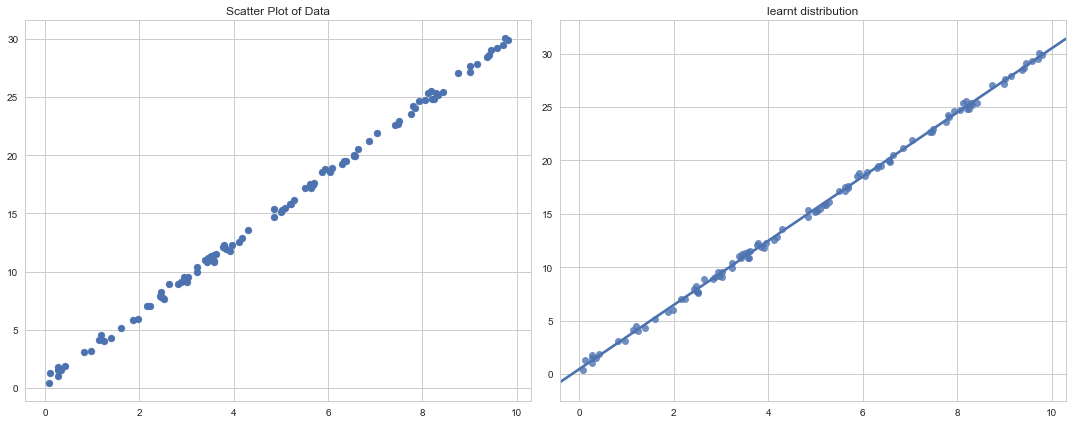

In [3]:
from sklearn.linear_model import LinearRegression

# generate sample data
X = 10 * np.random.rand(100)
y = 3 * X + np.random.rand(100)

#train and fit model
X = X.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)

#plot original data
plt.subplot(121)
plt.scatter(X,y)
plt.title('Scatter Plot of Data')

# plot learnt distrubtion
plt.subplot(122)
sns.regplot(X, y);
plt.title('learnt distribution')
plt.tight_layout()

print('Coefficient: {:.4f} and Intercept: {:.4f}'.format(float(model.coef_), model.intercept_))

***

## 多項式回帰: 線型モデルの基底関数の拡張

[link](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

MLの典型例として、非線形関数を変数に取った線形モデルがある。このアプローチは線形モデルの高速な推論が期待でき、かつ大量データが処理可能だ。

例）単純な線形回帰を多項式にまで拡張したものを考えてみよう。通常の線形回帰モデルでは、下記のような2次元のデータが用いられる

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

もし直線でなく、放物線で近似したい場合、2次多項式で特徴量を作ってみよう：

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

驚くべきことに、このモデルであっても「線型モデル」なのだ。説明変数を下記のように5変数と考えてみよう

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

これらに、改めてラベルを張り替えてみる：

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

このように、変数を線型モデルの変数として捉え直すことで、非線型効果を取り込んだ線型モデルとみなすことができる。

### Fitting via Linear Model

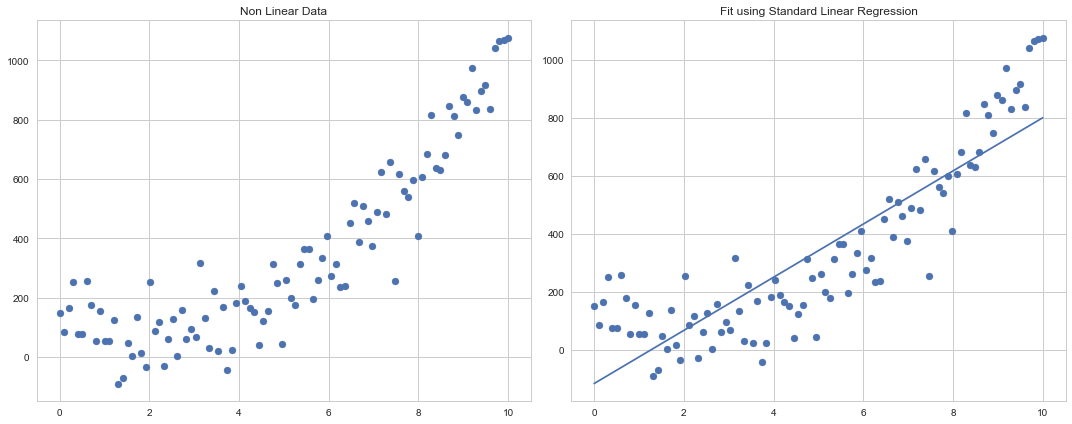

In [4]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + rng + 100

#non linear data
plt.subplot(121)
plt.scatter(X, y);
plt.title('Non Linear Data')

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.subplot(122)
plt.scatter(X, y);
plt.plot(X, model_pred);
plt.title('Fit using Standard Linear Regression')
plt.tight_layout()

### 多項式を変数にとったフィッティング

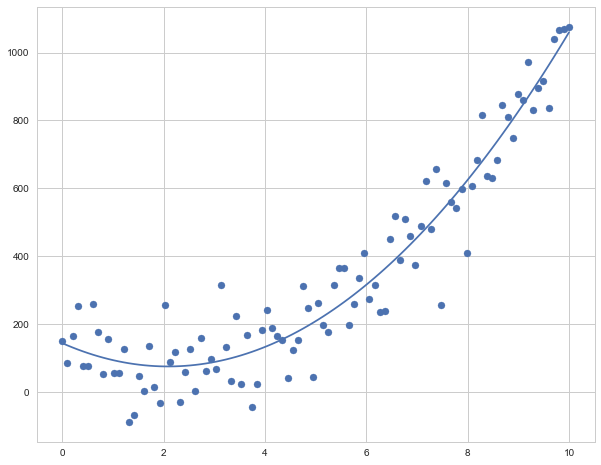

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))


lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);

# ロバスト回帰

 > Outlier Demo: [http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)

## RANdom SAmple Consensus (RANSAC) アルゴリズム

簡単なアルゴリズムを使うことで、Huber損失のように損失関数をコントロールできる

 > link to RANSAC = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

アルゴリズムは以下の通り（詳細は、上記リンクをご参照）

1. `min_samples`の数だけ元データからランダムにデータをサンプリング

2. 1.のモデルを元に、回帰問題を解く。

3. 誤差を参照しながらinlinerとoutlier(外れ値)を判別。（サンプルデータに外れ値が含まれると、誤差が大きくなる、というアイデア）

4. inlierのデータのみ(外れ値が除かれた状態)から、最後に回帰問題を解く。

### 例: Portfolio Return Betas

この例では、portfolioのbetaを2通りの方法を使って比較:
- 伝統的な方法
- RANSACを用いたロバスト回帰

 > Fama & French 3 Factor Data
 > この例のデータはKenneth Frenchのwebsiteからダウンロード可能。 The Fama & French 1993年に`3 factor model`を導入した。 Fama, E. F.; French, K. R. (1993). "Common risk factors in the returns on stocks and bonds". Journal of Financial Economicsの論文は次のリンクにてアクセスをお願いします <a href="https://doi.org/10.1016%2F0304-405X%2893%2990023-5">doi:10.1016/0304-405X(93)90023-5</a>. 


Data from Fama/French 3 Factors  TXT files was downloaded and saved in the .\data\ folder of this project.
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#Benchmarks 

* Mkt = Market Average Returns
* B2E = Book to Equity 
* E2P = Equity to Price (inverse P/E)
* C2P = Cashflow to Price
* Yld = Dividend Yield

より詳細なデータ定義については、Kenneth's pageをご参照:

http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/variable_definitions.html

In [6]:
filename = '../data/Australia.dat'

df = pd.read_csv(filename,delim_whitespace=True,skiprows=(0,1), header=(0))
df.columns = ['Date','Mkt','HighB2M', 'LowB2M','HighE2P', 'LowE2P','HighC2P', 'LowC2P','HighYld','LowYld', 'ZeroYld']
df = df.set_index('Date')
df.head()

,Mkt,HighB2M,LowB2M,HighE2P,LowE2P,HighC2P,LowC2P,HighYld,LowYld,ZeroYld
Date,,,,,,,,,,
197501,19.17,21.66,13.80,16.62,17.59,17.05,15.38,17.34,17.85,19.74
197502,0.52,2.78,-0.71,6.56,-1.86,2.93,-1.87,6.94,-1.46,3.47
197503,-2.04,-0.46,-1.79,2.75,-2.67,-0.33,-2.21,2.22,-2.91,-12.14
197504,-0.28,-1.00,-0.42,2.82,-0.97,-2.27,-1.35,2.64,-0.57,-14.34
197505,9.72,3.65,11.52,10.48,10.30,6.46,9.19,9.51,12.40,1.82


In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

dependent_var = 'HighYld'
independent_var = 'Mkt'

regress_df = df.loc[:,[dependent_var, independent_var]]
regress_df - clean_dataset(regress_df)
regress_df.head()

,HighYld,Mkt
Date,,
197501,17.34,19.17
197502,6.94,0.52
197503,2.22,-2.04
197504,2.64,-0.28
197505,9.51,9.72


In [8]:
X = regress_df[independent_var].values.reshape(-1,1)
y = regress_df[dependent_var].astype(np.float64)

In [9]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac = RANSACRegressor()#loss='squared_loss')
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [10]:
#setup line to show RANSAC fit
line_X = np.arange(np.min(X),np.max(X), 1).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

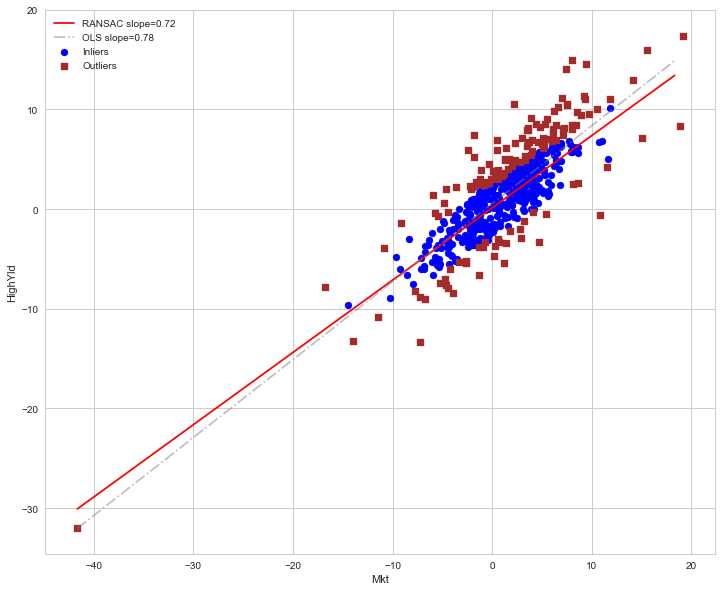

Note how OLS matches single outlier in Lower Left exactly, while RANSAC treats red points as outliers


In [11]:
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red', label='RANSAC slope=%0.2g'%(ransac.estimator_.coef_))
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.legend(loc='upper left')

# OLS
lr = LinearRegression()
lr.fit(X, y)
line_y_ols = lr.predict(line_X)
plt.gca().plot(line_X, line_y_ols, color='grey', linestyle='-.', alpha=0.5, label='OLS slope=%0.2g'%(lr.coef_))

plt.legend(loc='upper left')
plt.show()

print("Note how OLS matches single outlier in Lower Left exactly, while RANSAC treats red points as outliers")

***

<img align="left" src="http://www.element61.be/sites/default/files/ms-azure-ml-logo.png" height="40%" width="40%"/>
# 4: Time-series forecasts incorporating trend, reversion & seasonality (SARIMAX)</li><br></br>


***

# 4: 時系列予測

## 例. 一変数の場合
<h1>$$y_t = M + \phi y_{t-1} + \epsilon$$</h1>

ここで各変数の意味は:
- <b>M</b>: 切片
- $\phi$ : 傾き 
- $\epsilon$ : 誤差項 

</br>
Forecasting techniques using:
- **AR:** *Autoregressive* (自己回帰モデルで、添字に時刻が付与) $y_{t-1}, y_{t-2}, \ldots, y_{t-n}$
- **MA:** *Moving average* (移動平均モデル)
- **ARMA:** AR + MA = ARMA 
- **ARIMA:** ARMA + I (I:和分、1階階差を自分自身に足し込むイメージで、株価などのfinance dataに対して用いられる考え方)

## Enter: S+ARIMA+X (SARIMAX)

*Seasonal Auto Regressive Integrated Moving Average with eXogenous regressors*

- S: Seasonality: 季節性
- X: eXogeneous: 他の外部変数も組み込む(Ex. 天気予報、他の特徴量など)

### The Data

 > - S&P Energy
 > - Weather
 > - Energy Consumption

In [12]:
homedir = os.path.expanduser('~')    

# load main time series 
DATA_FILEPATH = '../data/SnPEnergy.csv'#os.path.join(homedir, './data/SnPEnergy.csv')
dateparse = lambda dates: [pd.datetime.strptime(d, '%d/%m/%Y') for d in dates]
energy_index_df = pd.read_csv(DATA_FILEPATH, sep='\t', parse_dates=['Effective date '], \
                              index_col=['Effective date '],date_parser=dateparse)

#set index and filter to Close price
energy_index_df = energy_index_df.sort_index(ascending=True)
energy_index_df['Close'] = energy_index_df['S&P/ASX 200 Energy (Sector)'] #set series     
energy_index_df.index.name = 'Date'
energy_index_df = energy_index_df[['Close']]

#energy_index_df.head()

In [13]:
# load external variables (Weather | Household Consumption)
DATA_FILEPATH = '../data/historicweather.csv' #os.path.join(homedir, 'data/JPM/historicweather.csv')
weather_df = pd.read_csv(DATA_FILEPATH , sep=',')                

#print(weather_df.head(5))
weather_df['Date'] = weather_df.Day.map(str) + '/' +  weather_df.Month.map(str) + '/' + weather_df.Year.map(str)
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%d/%m/%Y')
#set date index
weather_df.reset_index(inplace=True)
weather_df = weather_df.set_index(pd.DatetimeIndex(weather_df['Date']))
weather_df = weather_df.sort_index(ascending=True)
#filter to single field
weather_df['Temperature'] = weather_df['Maximum temperature (Degree C)']
weather_df = weather_df[['Temperature']]

weather_df = weather_df.dropna()
#weather_df.head()

In [14]:
DATA_FILEPATH = '../data/electricityconsumptionbenchmarkssurveydataaergovhack.csv' #os.path.join(homedir, 'data/JPM/electricityconsumptionbenchmarkssurveydataaergovhack.csv')
Consumption_df = pd.read_csv(DATA_FILEPATH)
df_aggregate = Consumption_df.groupby(['OUTPUT_DATE']).sum()

consumption_date_format = '%d/%m/%Y'
df_aggregate.reset_index(inplace=True)
df_aggregate['Date'] = pd.to_datetime(df_aggregate['OUTPUT_DATE'], format=consumption_date_format)
df_aggregate = df_aggregate.set_index(pd.DatetimeIndex(df_aggregate['Date']))
df_aggregate = df_aggregate.drop(['respondent', 'OUTPUT_DATE', 'Date'], axis=1)
df_aggregate = df_aggregate.sort_index(ascending=True)

df_aggregate = pd.DataFrame(df_aggregate.sum(axis=1))
df_aggregate.reset_index(inplace=True)
df_aggregate = df_aggregate.set_index(pd.DatetimeIndex(df_aggregate['Date']))
df_aggregate = df_aggregate.drop(['Date'], axis=1)
df_aggregate.columns = ['Watts']

#df_aggregate.head()

In [15]:
#filter the time series to length of consumption series
series_start_date ='04-03-2012'
series_end_date = '04-03-2014'
focus_period = list(energy_index_df[series_start_date:series_end_date].index)


energy_index_df = energy_index_df.loc[(energy_index_df.index.isin(focus_period)),:]
weather_df = weather_df.loc[(weather_df.index.isin(focus_period)),:]
df_aggregate = df_aggregate.loc[(df_aggregate.index.isin(focus_period)),:]

#combine external variables
df_aggregate['Temperature'] = weather_df['Temperature']

exog= df_aggregate
endog = energy_index_df

#remove any dates missed to ensure both series are equal
endog = endog.drop(endog[~endog.index.isin(exog.index)].index)

In [17]:
from datetime import *
from pandas.tseries.offsets import CustomBusinessDay

full_calendar = pd.date_range(series_start_date, series_end_date, freq='D')
full_calendar = pd.DataFrame(full_calendar, columns=['Date'])
full_calendar.index = full_calendar['Date']

holidays = full_calendar[~full_calendar.index.isin(exog.index)].index
bday_asx = CustomBusinessDay(holidays=holidays)

endog.index.freq = pd.tseries.frequencies.to_offset(bday_asx) #set TS frequency to asx trading days
exog.index.freq = pd.tseries.frequencies.to_offset(bday_asx) #set TS frequency to asx trading days

In [18]:
#copy series
X_LSTM = endog.copy()

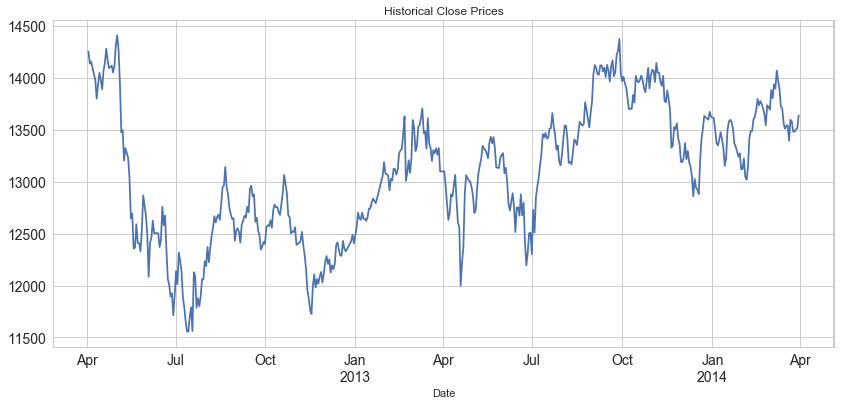

In [19]:
endog.Close.plot(figsize=(14,6), title= 'Historical Close Prices', fontsize=14);

In [20]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

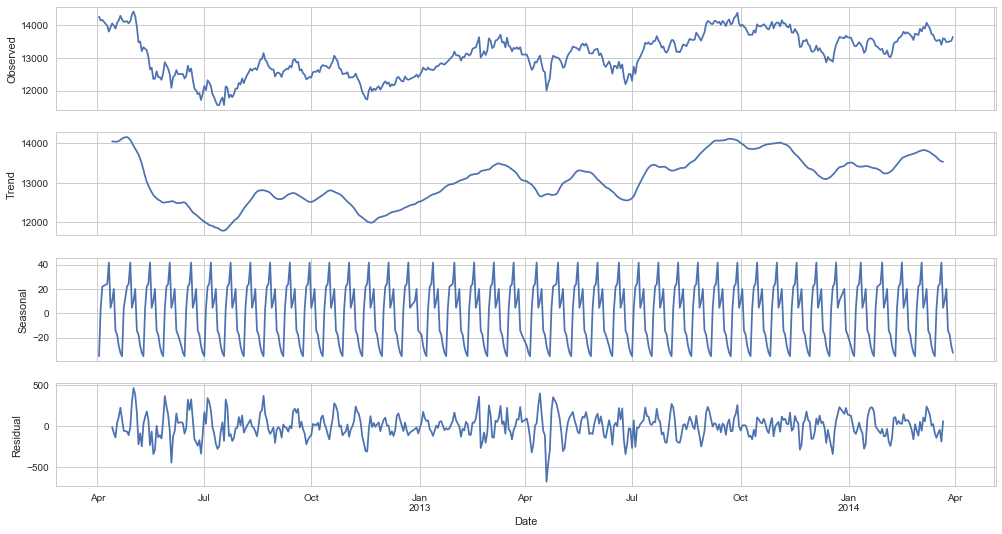

In [21]:
decomposition = seasonal_decompose(endog.Close, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8);

***

### Stationarise the data

時系列モデルは、平均や分散のような統計量が通時で一定である時に定常と呼ばれ、これは、直感的には将来に亘り高い確率で似た振る舞いを行うことを暗に仮定していることを意味する。

定常性は、とても強い制約だが、我々は実務上は定常性を仮定することが多い。具体的には、下記を仮定することを意味する：
 - 平均が一定
 - 分散が一定
 - 自己共分散が時間に依存しない

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # original code and kudos to Sean Abu
    # https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

### 定常性を確認 -> 平均、分散が一定、、といえる？

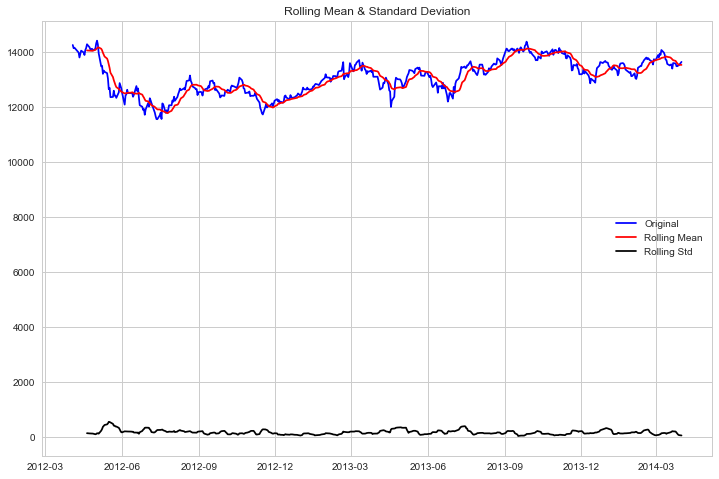

Results of Dickey-Fuller Test:
Test Statistic                  -2.745013
p-value                          0.066568
#Lags Used                       0.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64


In [23]:
test_stationarity(endog.Close)

#### その他のアプローチ

- CPIによるデフレ
- 対数変換
- 一階差分
- 季節差分
- 季節調整

[When to use](http://people.duke.edu/~rnau/whatuse.htm)

In [24]:
def apply_differencing(ts, series, method):
    print('Stationarise data using: {}'.format(series + '_'+ method))

    if method is 'log' :    
        ts[series+'_log']= ts[series].apply(lambda x: np.log(x))          

    elif method is 'first_difference' :
        ts[series+'_first_difference'] = ts[series] - ts[series].shift(1)      

    elif method is 'log_first_difference' :
        ts[series +'_log'] = ts[series].apply(lambda x: np.log(x))  
        ts[series+'_log_first_difference'] = ts[series+'_log'] - ts[series].shift(1)      

    elif method is 'seasonal_difference' :
        ts[series+'_seasonal_difference'] = ts[series] - ts[series].shift(12)      

    elif method is 'log_seasonal_difference' :
        ts[series+'_log']= ts[series].apply(lambda x: np.log(x))  
        ts[series+'_log_seasonal_difference'] = ts[series+'_log'] - ts[series+'_log'].shift(12)      

    elif method is 'seasonal_first_difference' :
        ts[series+'_first_difference'] = ts[series] - ts[series].shift(1)  
        ts[series+'_seasonal_first_difference'] = \
            ts[series+'_first_difference'] - ts[series+'_first_difference'].shift(12)      

    elif method is 'log_seasonal_first_difference' :
        ts[series+'_log'] = ts[series].apply(lambda x: np.log(x))  
        ts[series+'_log_first_difference'] = ts[series+'_log'] - ts[series+'_log'].shift(1)  
        ts[series+'_log_seasonal_first_difference'] = \
            ts[series+'_log_first_difference'] - ts[series+'_log_first_difference'].shift(12)
    
    return series + '_'+ method


Stationarise data using: Close_log_seasonal_difference


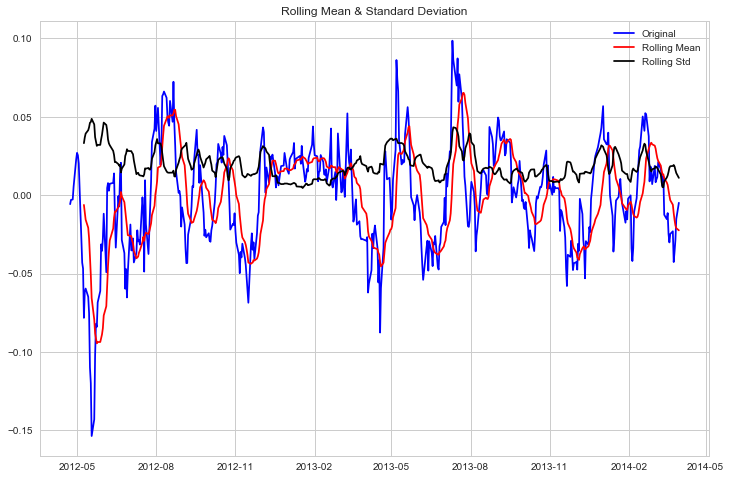

Results of Dickey-Fuller Test:
Test Statistic                  -4.818305
p-value                          0.000050
#Lags Used                      12.000000
Number of Observations Used    479.000000
Critical Value (1%)             -3.444076
Critical Value (5%)             -2.867593
Critical Value (10%)            -2.569994
dtype: float64


In [25]:
STATIONARIZE_USING = apply_differencing(endog, 'Close', 'log_seasonal_difference' )
test_stationarity(endog[STATIONARIZE_USING].dropna(inplace=False))

##### ACF & PACF (Trend and mean reversion) 

 > *自己相関*(Auto Correlation)とは、時刻をズラした自己系列の相関のことで、ACF(Autocorrelation function)は、下記のような時間をズラし幅を変数とした関数のこと

 > PACF (**partial autocorrelation function**)は、本質的な自己相関のことで、ラグ`h`を取った場合、ある時点$x_t$と$x_{t+h}$の間の$x_{t+1},x_{t+2},....,x_{t+h−1}$の影響を無視(≒調整)した自己相関のこと

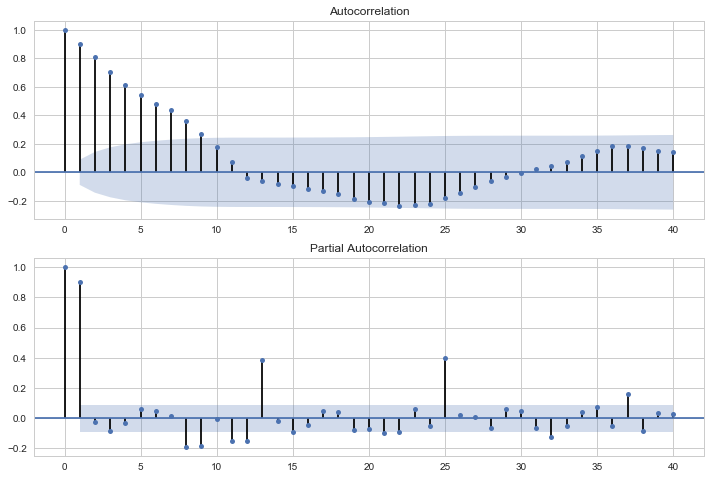

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(endog[STATIONARIZE_USING].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(endog[STATIONARIZE_USING].iloc[13:], lags=40, ax=ax2)

**パラメータの定義**
 > *seasonal_order:* The (P,D,Q,s) は、AR, MAに加えて、季節などの周期性のパラメータを指す

    - P, Q: AR, MAモデルのパラメータを指す
    - D : 和分パラメータを指す 
    - s: 周期性を表す(Ex. 4半期ごと、12ヶ月ごとなど)    

#### グリッドサーチを行い、最適なパラメータを探索

In [27]:
import itertools

def grid_search_SARIMA(train_endog, train_exog, trend, enforce_stationarity, enforce_invertibility, seasonal=0):
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], seasonal) for x in list(itertools.product(p,
    d, q))]
    AIC = float('inf')
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            #trend = 'c' if (order[1]==0) else 'n'
            try:
                mod = sm.tsa.statespace.SARIMAX(train_endog,
                                                exog =train_exog,
                                                order=param,
                                                trend=trend,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=enforce_stationarity,
                                                enforce_invertibility=enforce_invertibility)

                results = mod.fit(maxiter=200, method='powell')

                print('ARIMA{}x{}{} - AIC:{}'.format(param, param_seasonal, seasonal, results.aic))
                if results.aic < AIC:
                    AIC = results.aic
                    best_params = param
                    best_params_sesonal = param_seasonal                                        
                
            except Exception as e:
                print(e)
                continue                   
                
    return best_params, best_params_sesonal

In [28]:
forecast_period =  474 # 30 trading days before end of series
STATIONARIZE_USING = 'Close'

X_SARIMAX = endog[STATIONARIZE_USING]

In [29]:
model_order, model_seasonal_order = grid_search_SARIMA(X_SARIMAX.iloc[0:forecast_period], None, 'n', True, True, 12)

Optimization terminated successfully.
         Current function value: 10.896158
         Iterations: 1
         Function evaluations: 23
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10331.557755374008
Optimization terminated successfully.
         Current function value: 10.265060
         Iterations: 3
         Function evaluations: 100
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9735.276769514296
Optimization terminated successfully.
         Current function value: 7.338783
         Iterations: 1
         Function evaluations: 11
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6959.165851730235
Optimization terminated successfully.
         Current function value: 7.335987
         Iterations: 2
         Function evaluations: 56
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6958.516040941819
Optimization terminated successfully.
         Current function value: 7.615751
         Iterations: 2
         Function evaluations: 67
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7223.731708335652
Non-stationary starting autoregressi

Optimization terminated successfully.
         Current function value: 6.591432
         Iterations: 3
         Function evaluations: 141
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:6256.677510050865
Optimization terminated successfully.
         Current function value: 6.463509
         Iterations: 7
         Function evaluations: 425
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:6137.406637316208
Optimization terminated successfully.
         Current function value: 6.364805
         Iterations: 1
         Function evaluations: 22
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:6037.834971016087
Optimization terminated successfully.
         Current function value: 6.364450
         Iterations: 1
         Function evaluations: 32
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6039.498274015361
Optimization terminated successfully.
         Current function value: 6.529662
         Iterations: 1
         Function evaluations: 21
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:6194.119378797188
Optimization terminated successfully.


In [30]:
# best parameters
print('SARIMAX: order (p,d,q)={}, seasonal_order  (P,D,Q,s)={}'.format(model_order,model_seasonal_order ))

SARIMAX: order (p,d,q)=(0, 1, 0), seasonal_order  (P,D,Q,s)=(0, 1, 1, 12)


### Predict

In [31]:
from sklearn.metrics import mean_squared_error
    
def fit_and_forecast(endog_ts,exog_ts=None,forecast_idx=0):
    
    sarimax_fit = None
    start_params = []
    exog_history, exog_train, exog_test = None, None, None
    
    train, test = endog_ts.iloc[0:forecast_idx], endog_ts.iloc[forecast_idx:]    
        
    if exog_ts is not None:        
        exog_train, exog_test = exog_ts.iloc[0:forecast_idx], exog_ts.iloc[forecast_idx:]        
        exog_history = exog_train.values.tolist() 
        
    endog_history = [x for x in train] #train    
    sarimax_predictions = [np.nan for _ in range(0,len(train))]

    # walk-forward validation
    for t in range(len(test)):               
        # fit model    
        sarimax_model = sm.tsa.statespace.SARIMAX(endog=endog_history, exog=exog_history, trend='n', order=model_order, \
                                                    seasonal_order=model_seasonal_order,
                                                    enforce_stationarity=True,
                                                    enforce_invertibility=True)    
                
        # one step forecast    
        if exog_test is not None:                        
            sarimax_fit = sarimax_model.fit()         
            exog_test_item = np.atleast_2d(exog_test.iloc[t].values.tolist())                        
            yhat_sarimax = sarimax_fit.forecast(exog=exog_test_item)[0]            
        else:
            sarimax_fit = sarimax_model.fit()
            yhat_sarimax = sarimax_fit.forecast()[0]        
    
        # store forecast and ob    
        sarimax_predictions.append(yhat_sarimax)        
        endog_history.append(test[t])
        if  exog_ts is not None: exog_history.append(exog_test.iloc[t])
    
    return  test, sarimax_predictions, sarimax_fit

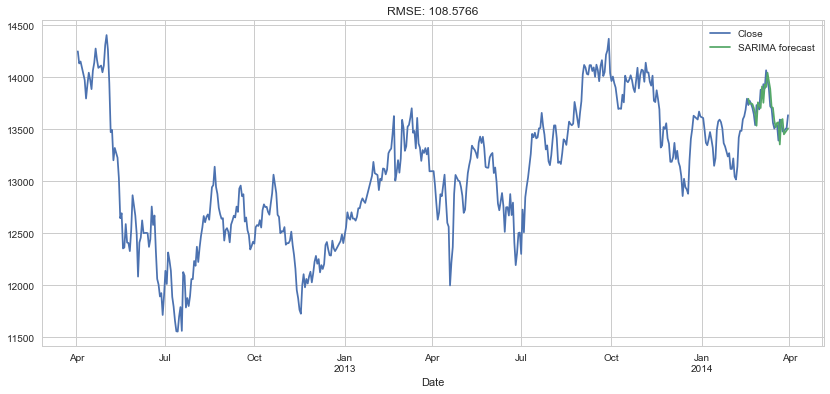

In [32]:
#print(len(sarimax_predictions))
test, sarima_predictions, sarimax_fit = fit_and_forecast(X_SARIMAX, None, forecast_period)
endog['SARIMA forecast'] = sarima_predictions

# plot forecasts against actual outcomes
rmse = np.sqrt(mean_squared_error(test,sarima_predictions[-len(test):]))
rmse_title = 'RMSE: %.4f'% rmse
endog[['Close', 'SARIMA forecast' ]].plot(figsize=(14, 6), title=rmse_title);

##### Train without external variables

In [33]:
print(X_SARIMAX.index.freq)
print(X_SARIMAX.shape)
print(exog.shape)
#exog.values.tolist()

<CustomBusinessDay>
(504,)
(504, 2)


##### With external variables

c:\users\kyiwasak\appdata\local\continuum\anaconda2\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\kyiwasak\appdata\local\continuum\anaconda2\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\kyiwasak\appdata\local\continuum\anaconda2\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


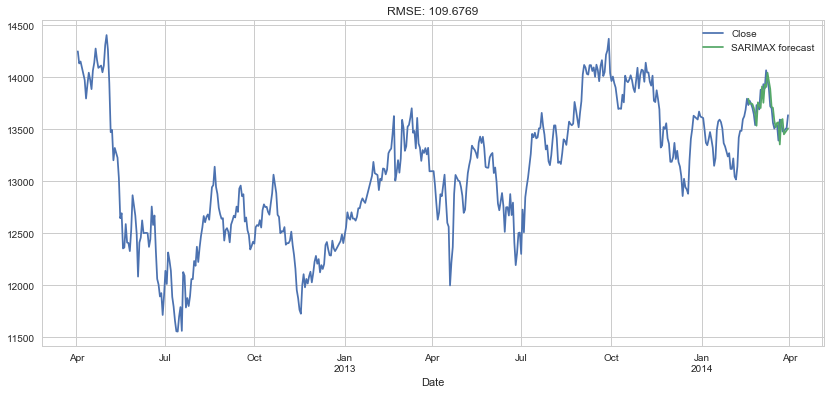

In [34]:
test, sarimax_predictions,sarimax_fit = fit_and_forecast(X_SARIMAX, exog, forecast_period)
endog['SARIMAX forecast'] = sarima_predictions

# plot forecasts against actual outcomes
rmse = np.sqrt(mean_squared_error(test,sarimax_predictions[-len(test):]))
rmse_title = 'RMSE: %.4f'% rmse
endog[['Close', 'SARIMAX forecast' ]].plot(figsize=(14, 6), title=rmse_title);

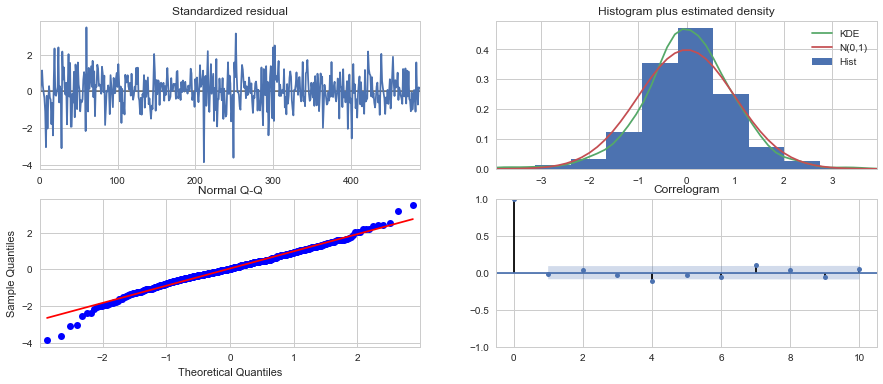

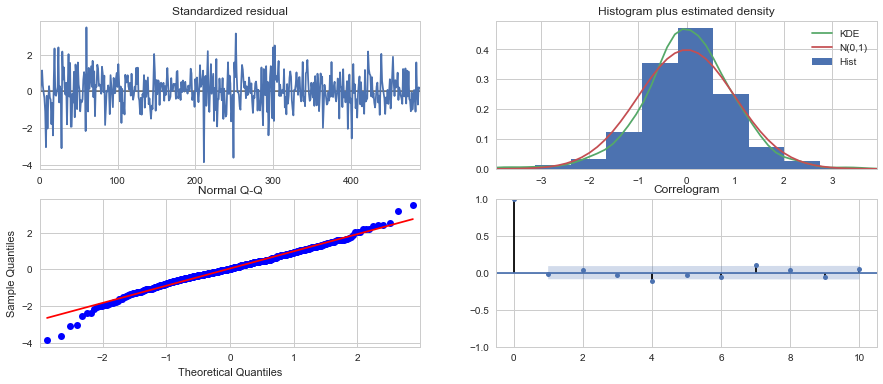

In [35]:
#plot the model diagnostics
sarimax_fit.plot_diagnostics(figsize=(15,6))

- 左上: 予実差の時系列推移
- 右上: 予実差集計(ヒストグラム)
- 左下: 正規QQプロット→直線に並ぶほど、正規分布に近いことを表す
- 右下: 自己相関

In [36]:
print(sarimax_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  503
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -3145.077
Date:                            Thu, 16 Aug 2018   AIC                           6298.154
Time:                                    23:41:25   BIC                           6314.932
Sample:                                         0   HQIC                          6304.743
                                            - 503                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.062e-07      0.000      0.007      0.995      -0.000       0.000
x2             1.0227      1.945   

***

## Deep Learning (LSTM)によるアプローチ


時系列予測において、古典的な線形モデルで多変数を適用することには困難な点があった。
一方、LSTM(Long Short-Term Memory)などのようなニューラルネットワークの手法を用いることで、このような状況の打開策となることが期待できる。

<img src="https://i.stack.imgur.com/TuHv1.png" width="30%" height="30%" />

 > **Long Short-Term Memory (LSTM)** は要素間のフィードバックループの構造を内在したニューラルネットワークで、この機構では「記憶」の構造を模しており、過去のシグナルを記憶するような仕掛けが内在している。LSTMは時系列分析に適しており、それは異なるデータパターンやレジームを効果的に保持すると思われているからである。


<table ><tr>
    <td><img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-rolled.png" height="50%" width="50%" /></td>
    <td><h1>&nbsp;>&nbsp;</h1></td>
    <td><img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" height="50%" width="50%"/></td>
    </tr></table>

In [37]:
#X_LSTM.head()
exog.head()

,Watts,Temperature
Date,,
2012-04-03,210404,28.6
2012-04-04,220402,27.3
2012-04-05,248018,28.0
2012-04-10,305024,17.4
2012-04-11,306424,18.3


In [38]:
#merge datsets into one
combined_df = pd.merge(left=X_LSTM, right=exog, left_index=True, right_index=True)
combined_df.head()

,Close,Watts,Temperature
Date,,,
2012-04-03,14250.17,210404,28.6
2012-04-04,14133.93,220402,27.3
2012-04-05,14152.55,248018,28.0
2012-04-10,13975.55,305024,17.4
2012-04-11,13796.50,306424,18.3


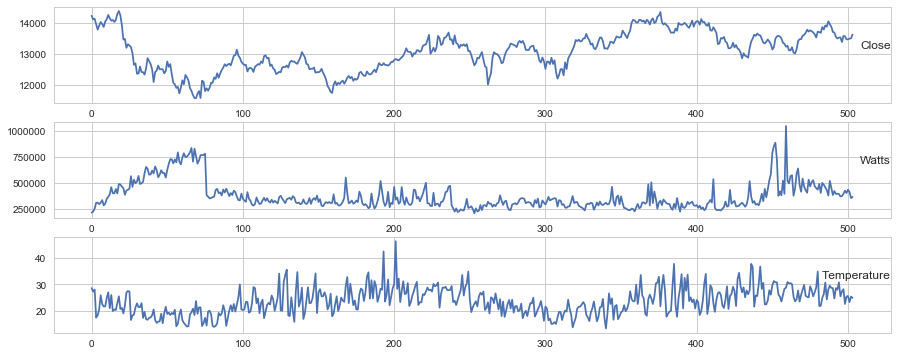

In [39]:
# load dataset
values = combined_df.values
#print(values)

# specify columns to plot
groups = [0, 1, 2]
i = 1
# plot each column
plt.figure(figsize=(15,6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(combined_df.columns[group], y=0.5, loc='right')
    i += 1
plt.show();

In [40]:
from pandas import DataFrame
from pandas import concat

#credit to machine learning mastery
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


lstm_dataset = combined_df.values
# ensure all data is float
lstm_dataset = lstm_dataset.astype('float32')

#frame as supervised dataset (single lag)
reframed = series_to_supervised(lstm_dataset, 1, 1)

#reorder with y(t) as last column
reframed = reframed[reframed.columns[[0,1,2,4,5,3]]]
column_names = reframed.columns

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

# frame as supervised learning
reframed = pd.DataFrame(reframed, columns=column_names)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var2(t)   var3(t)   var1(t)
0   0.945084   0.008309   0.462236  0.020172  0.422961  0.904325
1   0.904325   0.020172   0.422961  0.052938  0.444109  0.910854
2   0.910854   0.052938   0.444109  0.120575  0.123867  0.848789
3   0.848789   0.120575   0.123867  0.122236  0.151057  0.786005
4   0.786005   0.122236   0.151057  0.104638  0.220544  0.832560


In [42]:
# split into train and test sets
values = reframed.values
train = values[:forecast_period, :]
test = values[forecast_period:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(474, 1, 5) (474,) (29, 1, 5) (29,)


<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" height="50%" width="50%"/>
    

 > Deep Learning libraryとしてKerasを採用

 > - モデルのプロトタイプが容易に作れること
 > - CNN, RNNやそれらの組み合わせもサポート
 > - CPU, GPUの切り替えも容易


In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# design network
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mae', optimizer='adam')
# fit network
history = lstm_model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=0, shuffle=False)

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


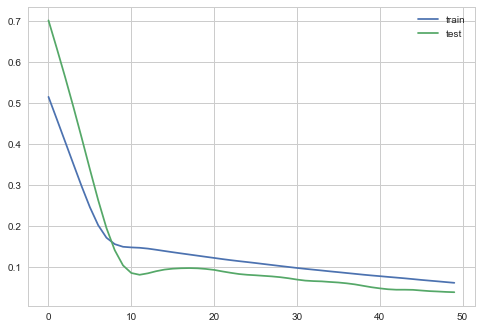

In [44]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [45]:
test_X.shape

(29, 1, 5)

In [46]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = lstm_model.predict(test_X)

#to reverse MinMax reshape based on original shape
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 0:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:,0:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
rmse_title_lstm = 'Test RMSE: %.3f' % rmse

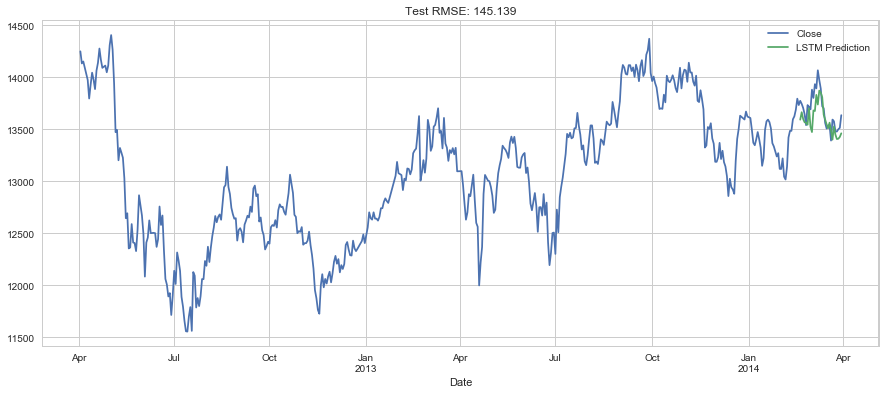

In [47]:
#inv_y
#inv_yhat
lstm_predictions = [np.nan for _ in range(0,len(train_X)+1)]
X_LSTM['LSTM Prediction'] = lstm_predictions + list(inv_yhat)
X_LSTM.plot( figsize=(15,6), title=rmse_title_lstm);

## web scraping 技術のご紹介

利用pythonのライブラリ一覧

|Source|Python Package| Package/Data URL|
| :--- | :---- | :------- |
|Quandl|Quandl|https://www.quandl.com/tools/python |
|Bloomberg|BLPAPI|https://www.bloomberglabs.com/api/libraries/ |
|Webscraping| Beautiful Soup |PyPi|
|Selenium |PyPi||
|Twitter|twitter|PyPi|
|LinkedIn|python-linkedin| PyPi|

Big DataやAI戦略の論文、サンプルコード：
 - Example One: Getting Financial Data from Yahoo/Google using Pandas DataReader
 - Example Two: Scraping Population Data from Wikipedia using RVest
 - Example Three: Get all S&P 500 companies from Wikipedia
 - Example Four: Getting all the references from a Wikipedia page
 - Example Five: Scraping Population Data from Wiki using R/XML
 - **Example Six: Using Glassdoor API to pull out company reviews**
 - Example Seven: Using Quandl library to pull out financial data
 - Example Eight: Using Selenium to scrape data from NASDAQ website
 - Example Nine: Using ‘twitteR’ to get data from Twitter 
 - Example Ten: Using ‘BeautifulSoup’ to get ETF expense ratios from Wisdom Tree through Python
 

In [48]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

def get_historical_data(name):
    data = []
    url = "https://finance.yahoo.com/quote/" + name + "/history/"
    rows = bs(urlopen(url).read()).findAll('table')[0].tbody.findAll('tr')

    for each_row in rows:
        divs = each_row.findAll('td')
        if divs[1].span.text  != 'Dividend': #Ignore this row in the table
            #I'm only interested in 'Open' price; For other values, play with divs[1 - 5]
            data.append({'Date': divs[0].span.text, \
                            'Volume': float(divs[6].span.text.replace(',','')),
                            'Open': float(divs[1].span.text.replace(',','')),
                            'Close': float(divs[4].span.text.replace(',',''))                            
                        })

    return data

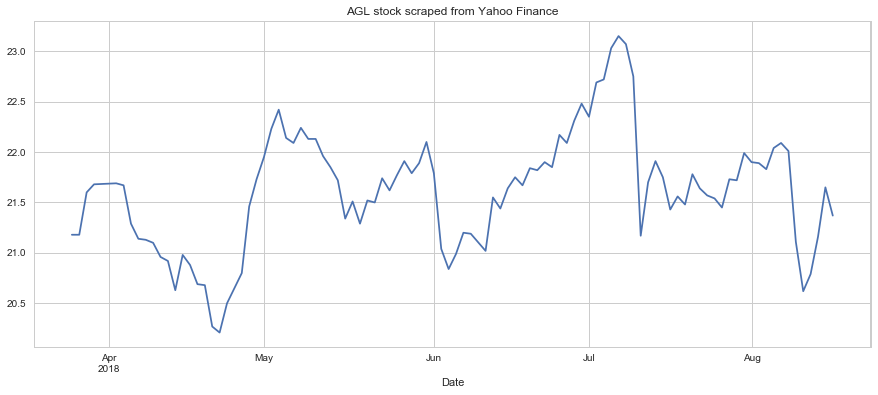

In [49]:
#Yahoo financeから、AGL(Australian Gas Light, ltd.)社の株価推移をweb scraping
date_format = '%b %d, %Y'
yahoo_finance_df = pd.DataFrame(get_historical_data('AGL.AX'))   

yahoo_finance_df.reset_index(inplace=True)
yahoo_finance_df['Date'] = pd.to_datetime(yahoo_finance_df['Date'], format=date_format)
yahoo_finance_df = yahoo_finance_df.set_index(pd.DatetimeIndex(yahoo_finance_df['Date']))
yahoo_finance_df.index.freq = pd.tseries.frequencies.to_offset('B') #set TS frequency to busines days
yahoo_finance_df = yahoo_finance_df.drop(['index', 'Date'], axis=1)
yahoo_finance_df = yahoo_finance_df.sort_index(ascending=True)
yahoo_finance_df['Close'].plot(figsize=(15,6), title='AGL stock scraped from Yahoo Finance');

# 5: 相関分析と特徴量選択

In [50]:
pd.options.display.float_format = '{:,.2f}'.format

focus_columns = df.columns
instruments = df[focus_columns]

In [51]:
#display correlation matrix
instruments.corr()

,Mkt,HighB2M,LowB2M,HighE2P,LowE2P,HighC2P,LowC2P,HighYld,LowYld,ZeroYld
Mkt,1.00,0.85,0.94,0.85,0.93,0.83,0.91,0.84,0.93,0.68
HighB2M,0.85,1.00,0.72,0.84,0.74,0.83,0.72,0.85,0.74,0.56
LowB2M,0.94,0.72,1.00,0.73,0.91,0.74,0.90,0.71,0.93,0.67
HighE2P,0.85,0.84,0.73,1.00,0.68,0.83,0.66,0.88,0.70,0.51
LowE2P,0.93,0.74,0.91,0.68,1.00,0.71,0.95,0.67,0.95,0.66
HighC2P,0.83,0.83,0.74,0.83,0.71,1.00,0.68,0.79,0.71,0.57
LowC2P,0.91,0.72,0.90,0.66,0.95,0.68,1.00,0.66,0.94,0.65
HighYld,0.84,0.85,0.71,0.88,0.67,0.79,0.66,1.00,0.65,0.48
LowYld,0.93,0.74,0.93,0.70,0.95,0.71,0.94,0.65,1.00,0.65
ZeroYld,0.68,0.56,0.67,0.51,0.66,0.57,0.65,0.48,0.65,1.00


***

## 相関行列の可視化

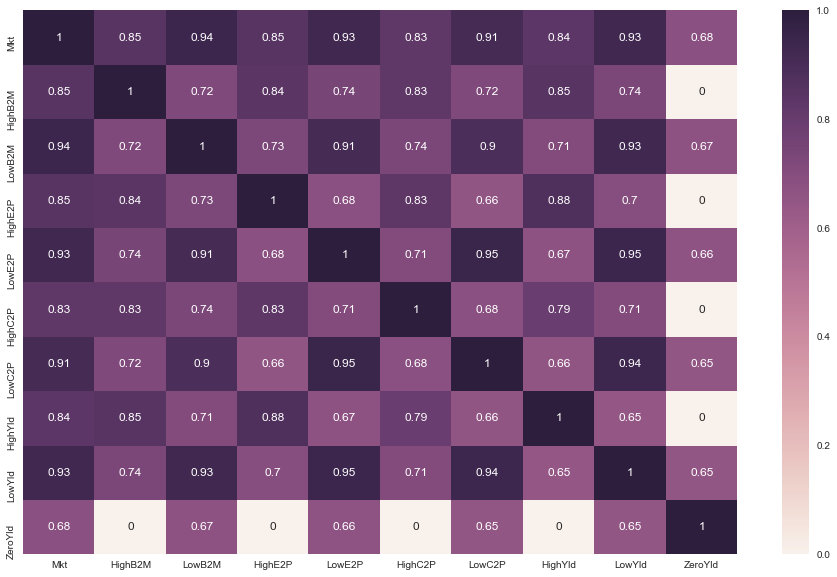

In [52]:
#visualise correlation matrix only highlighting high correlations > 60%
corr_matrix = instruments.corr() 
corr_matrix[np.abs(corr_matrix) < 0.6] = 0

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

***

## Statsmodelsを使って、相関性を確認

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.
X_constant = sm.add_constant(X)

In [54]:
stats_model = sm.OLS(y, X_constant)
stats_lr = stats_model.fit()

In [55]:
stats_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HighYld   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1207.
Date:                Thu, 16 Aug 2018   Prob (F-statistic):          5.93e-137
Time:                        23:41:37   Log-Likelihood:                -1208.1
No. Observations:                 516   AIC:                             2420.
Df Residuals:                     514   BIC:                             2429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5461      0.114      4.797      0.000       0.322       0.770
x1             0.7818      0.023     34.736      0.000       0.738       0.826
==============================================================================
Omnibus:                        9.794   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               16.540
Skew:                           0.025   Prob(JB):                     0.000256
Kurtosis:                       3.876   Cond. No.                         5.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

上記の結果では、選ばれた変数は1つ(`Df Model = 1`).

**世の中には、多くの統計的な検定があるが、多くは統計解析のために用いられる**

 > データサイエンスにおいては、これらが毎度必要ということはなく、主目的は予測、つまりモデルを生成して実データを使った予測を行うことだ。統計的に込み入った話とは多くの場合関連がない。

[Appendix : Statsmodels](#Appendix)

***

## 固有ベクトルを用いて、共線性を検知

In [56]:
## 相関行列の固有値、固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

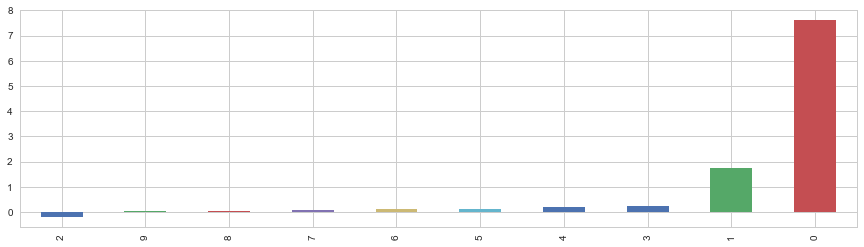

In [57]:
## 固有値の大きさを可視化
ax = pd.Series(eigenvalues).sort_values().plot.bar(figsize=(15,4))
plt.show()

はじめの8つの固有値は、その他の値と比較し0にかなり近く、これは共線性が存在することを意味する（通称：マルチコ）

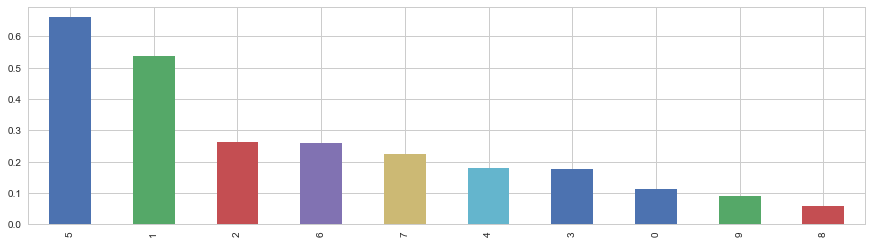

In [58]:
## 4番目の固有ベクトルを抽出→絶対値→ソート
focus_index = np.abs(pd.Series(eigenvectors[:,4])).sort_values(ascending=False)
focus_index.plot.bar(figsize=(15,4))
plt.show()

 > 列5, 1, 2については、他変数に比べて値が大きい(どこで閾値を設定するか、はありますが、、)

In [59]:
print('Columns causing most multicolinearity: {}'.format( \
    [focus_columns[i] for i in range(len(focus_index[:3].index)) ]))

Columns causing most multicolinearity: ['Mkt', 'HighB2M', 'LowB2M']


***

## データの前処理

多くの場合、変数の標準化などが必要となる

* **データの標準化** - データ系列から一律に平均値を差し引き、データ系列の平均を0に揃える。これによりバイアスを除く。

* **Min-Max、もしくはデータのスケーリング ** - 各変数の最大値が1、最小値が0となるようにスケール変換を行う。これにより標準偏差が極端に小さなものの頑健性(robustness)や、疎なデータ(0の値が多いデータ)で0をそのまま確保することを狙う。

* ** 2値化 ** - ある閾値より大きな値は1、そうでなければ0としてしまう手法。これにより確率を推定するモデルと捉えることが可能となる。

仮定:

* ML実行時の明示的・暗示的な仮定：特徴量(もしくは誤差など)は正規分布に従う
* 多くの方法論は線形性を仮定する
* 多くのMLはデータが標準正規分布(平均0、標準偏差1の正規分布)に従う

[scikit-learn:](http://scikit-learn.org/stable/modules/preprocessing.html) 現実問題、変数の分布の形を無視したり、単に上記の平均化(平均を0にするようなデータ系列の変換)を行い、さらに、ある定数で除算することで標準偏差を1にする、といった操作を行う。

例えば、多くの目的関数を求めるアルゴリズムでは、**全ての特徴量の平均が0で、分散が同程度であることを仮定**している。もし、ある変数の分散が他の全ての変数より極端に大きい場合、目的変数はその分散の大きな変数で説明されることになってしまいかねない。

### 前処理無しでの誤差の推移

In [60]:
alpha = 0.0001
w_ = np.zeros(1 + X.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X, w_[1:]) + w_[0]
    errors = (y - y_pred)
    
    w_[1:] += alpha * X.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

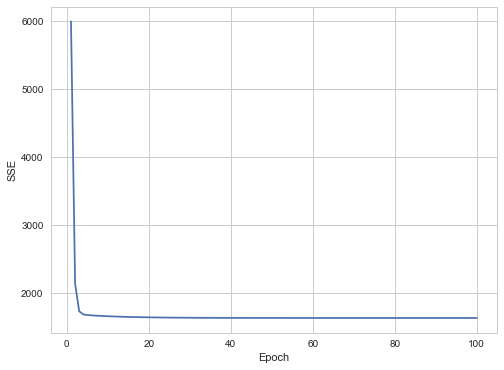

In [61]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

### 前処理を行った状態での誤差の推移

In [62]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [63]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100

for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0] += alpha * errors.sum()
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

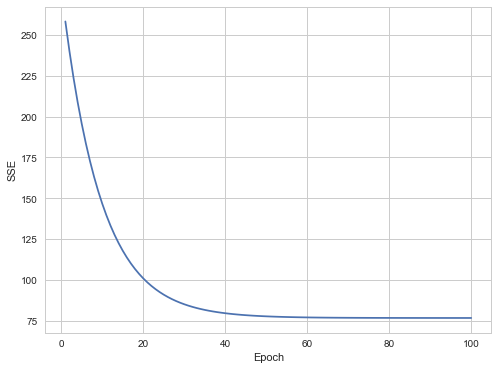

In [64]:
plt.figure(figsize=(8,6))
plt.plot(range(1, n_ + 1), cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

# 9: 可視化

[seaborn library](https://seaborn.pydata.org/examples/index.html)

Seabornは、matplotlibという可視化用の標準的なPythonの可視化用ライブラリで、統計的なグラフなどを平易に美しく描くことが可能

## MSの可視化ツール

<img src="http://www.cloud9insight.com/wp-content/uploads/2017/05/Power-BI.png" width="100%" height="50%" />

# Appendix

## Model Statistical Outputs:

**Dep. Variable**: The dependent variable or target variable

**Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

**Method**: The method used to fit the data to the model. Least squares

**No. Observations**: The number of observations

**DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters

**DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.

**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

> From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

  > The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

  > The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used.
$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

> $p$ = The total number of explanatory variables not including the constant term

> $n$ = The sample size

**F-statistic**: A measure that tells you if you model is different from a simple average.

**Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better. 

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters.

## Parameters Estimates and the Associated Statistical Tests

**coef**: The estimated coefficient. Note that this is just a point estimate.

**std err**: The standard error of the estimate of the coefficient. Another term for standard deviation

**t**: The t-statistic score. 

**P > |t|**: The p-value. A measure of the probability that the coefficient is different from zero.

**[95.0% Conf. Interval]**: The 95% confidence interval of the coefficient. Shown here as [0.025, 0.975], the lower and upper bound.

## Residual Tests

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: p-value of Omnibus test.

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results

[Back to section](#Detecting-Collinearity-with-Eigenvectors)